# Исследование объявлений о продаже квартир

В наличии данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого потребуется провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Цели исследования

- Определить параметры, влияющие на цену объектов недвижимости, и степень их влияния.
- Установить принципы определения рыночной стоимости объектов недвижимости в зависимости от их параметров. 
- Определить критерии, по которым можно выявить объекты с аномальной стоимостью по отношению к рыночной.

## Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении.

### Импорты

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Настройки

In [2]:
# не ограничивать максимальное количество выводимых столбцов
pd.set_option('display.max_columns', None)

In [3]:
# задаём более крупный размер шрифта на графиках
plt.rcParams['font.size'] = 12

## Предварительное изучение данных

### Получение данных и изучение общей информации

In [4]:
# получение таблицы из CSV файла
# разделитель столбцов - знак табуляции
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://<LINK_REMOVED>/datasets/real_estate_data.csv', sep='\t')

Посмотрим на полученную таблицу.

In [5]:
# первые 5 строк таблицы
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

Посмотрим на общую информацию о данных.

In [6]:
# основная информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также посмотрим на статистические характеристики столбцов с числовыми значениями.

In [7]:
# числовое описание данных
# округляем до 2 знаков после точки
# транспонируем таблицу для удобства
data.describe().round(2).T

count        mean          std      min         25%  \
total_images         23699.0        9.86         5.68      0.0        6.00   
last_price           23699.0  6541548.77  10887013.27  12190.0  3400000.00   
total_area           23699.0       60.35        35.65     12.0       40.00   
rooms                23699.0        2.07         1.08      0.0        1.00   
ceiling_height       14504.0        2.77         1.26      1.0        2.52   
floors_total         23613.0       10.67         6.60      1.0        5.00   
living_area          21796.0       34.46        22.03      2.0       18.60   
floor                23699.0        5.89         4.89      1.0        2.00   
kitchen_area         21421.0       10.57         5.91      1.3        7.00   
balcony              12180.0        1.15         1.07      0.0        0.00   
airports_nearest     18157.0    28793.67     12630.88      0.0    18585.00   
cityCenters_nearest  18180.0    14191.28      8608.39    181.0     9238.00   
parks_around3000     18181.0        0.61         0.80      0.0        0.00   
parks_nearest         8079.0      490.80       342.32      1.0      288.00   
ponds_around3000     18181.0        0.77         0.94      0.0        0.00   
ponds_nearest         9110.0      517.98       277.72     13.0      294.00   
days_exposition      20518.0      180.89       219.73      1.0       45.00   

                            50%        75%          max  
total_images               9.00       14.0         50.0  
last_price           4650000.00  6800000.0  763000000.0  
total_area                52.00       69.9        900.0  
rooms                      2.00        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total               9.00       16.0         60.0  
living_area               30.00       42.3        409.7  
floor                      4.00        8.0         33.0  
kitchen_area               9.10       12.0        112.0  
balcony                    1.00        2.0          5.0  
airports_nearest       26726.00    37273.0      84869.0  
cityCenters_nearest    13098.50    16293.0      65968.0  
parks_around3000           0.00        1.0          3.0  
parks_nearest            455.00      612.0       3190.0  
ponds_around3000           1.00        1.0          3.0  
ponds_nearest            502.00      729.0       1344.0  
days_exposition           95.00      232.0       1580.0

Построим гистограммы для всех числовых столбцов таблицы на одном графике.

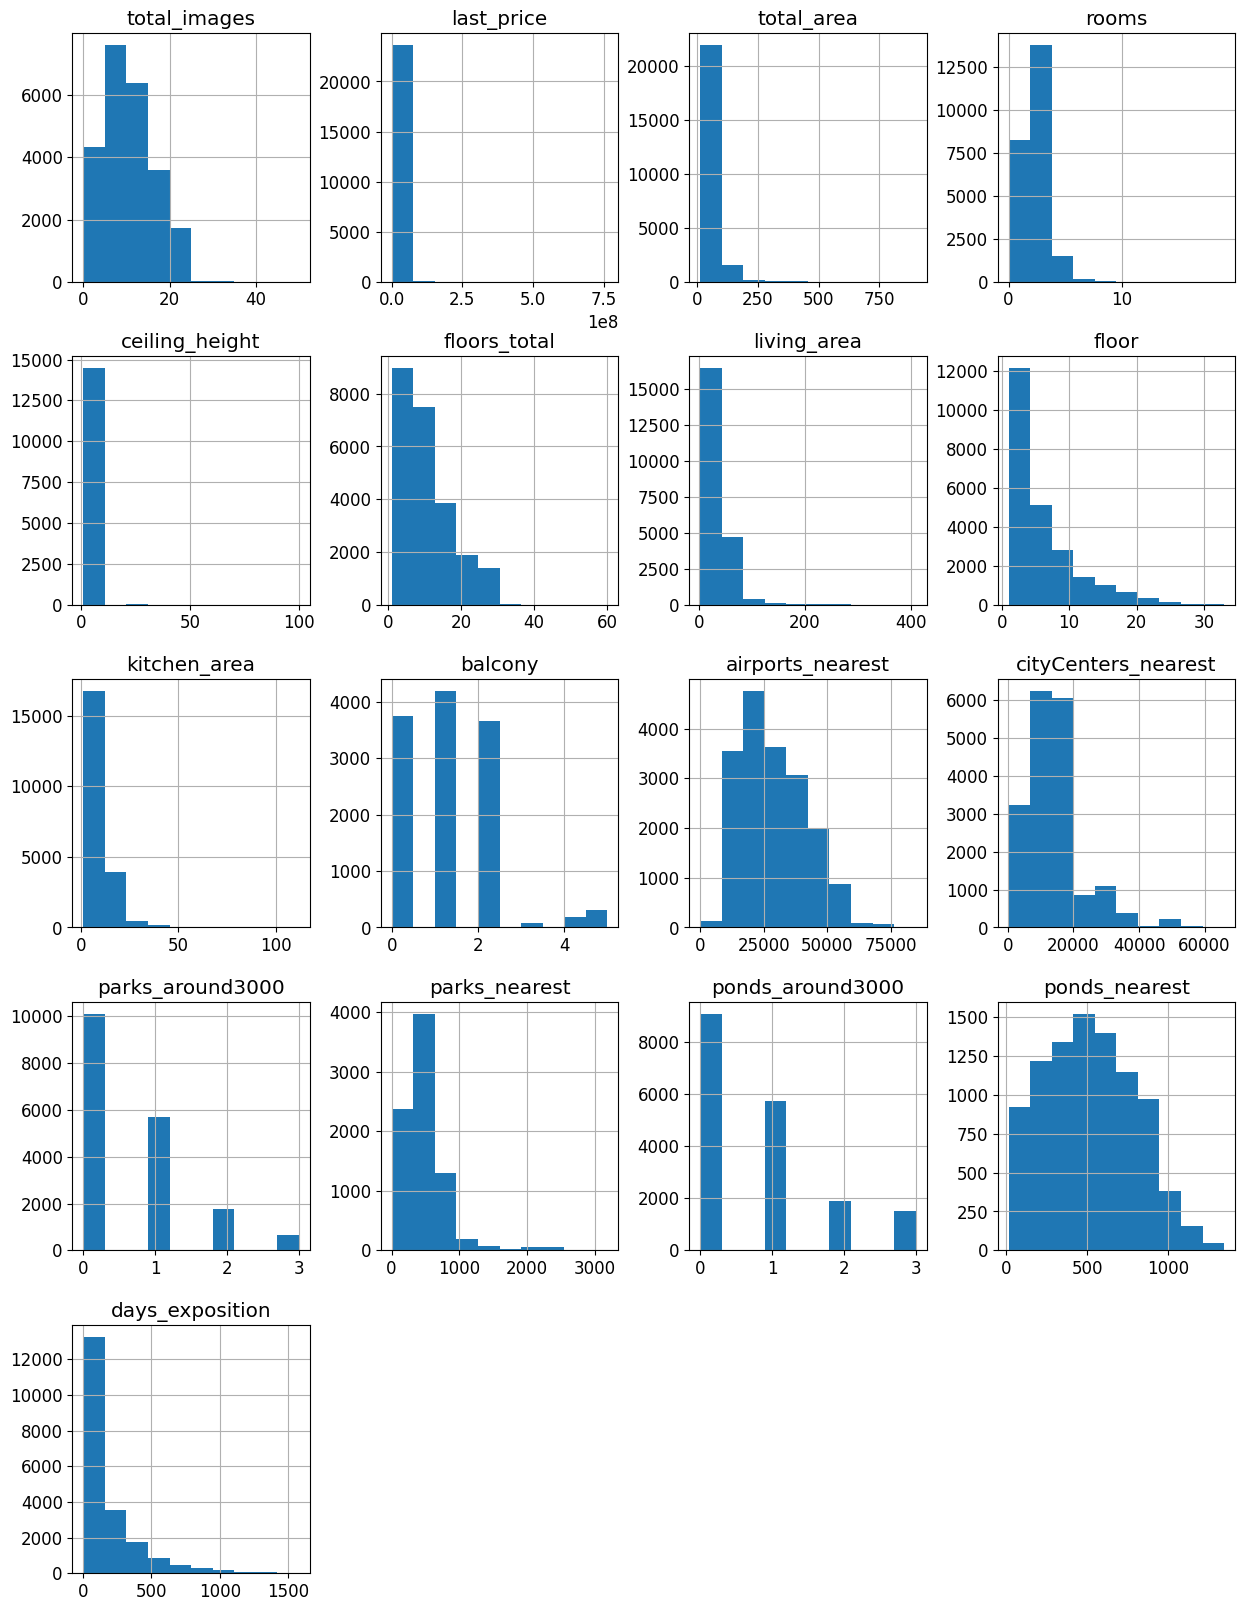

In [8]:
# строим гистограммы для всех числовых столбцов
data.hist(figsize=(15, 20))
plt.show()

Из гистограмм видно, что распределение значений в столбцах в целом имеет ожидаемый характер. Однако в столбцах `last_price`, `total_area`, `rooms`, `ceiling_height`, `floors_total`, `living_area` и `kitchen_area` присутствуют значения, сильно превышающие большинство. Среди них могут быть выбросы - ошибочные значения. Поэтому эти столбцы нужно будет проверить. В столбце `ceiling_height` аномальные значения высоты потолка больше 10 м похожи на ошибки.

### Выводы

Всего в таблице 23699 записей.

Предварительное изучение данных показало, что в данных имеются проблемы: пропуски, аномалии, несоответствие типов данных их характеру, нестандартное именование одного из столбцов таблицы: 
- Наличие пропущенных значений в 14 столбцах из 22. 
- В некоторых столбцах тип данных не соответствует характеру значений в них: `float64` вместо `int64` для столбцов, значения в которых по описанию данных выражены количеством объектов, целым числом дней или метров, а таже `object` вместо `bool` для столбца `is_apartment`.
- Имя столбца `cityCenters_nearest` не соответствует общепринятому стилю именования "snake_case".
- В столбце `last_price` есть как аномально малые (минимальное значение 12190), так и аномально большие значения (максимальное значение 763 000 000). Такие экстремальные значения требуют внимания, надо будет рассмотреть соответствующие записи подробнее.
- В столбце `total_area` очень большой максимум (900 кв.м), тоже надо проверить, действительно ли это не ошибка.
- В столбце `rooms` встречается аномальное значение 0. Это можно считать пропущенным значением, но надо дополнительно разобраться, не помечают ли так квартиры-студии.
- В столбце `ceiling_height` минимальное значение 1 м, а максимальное - 100 м. Оба эти экстремальных значения очень похожи на ошибки в данных.
- В столбце `floors_total` максимальное значение числа этажей в доме  - 60. В принципе, это может быть небоскрёб. Кстати, для всех объектов нужно будет проверить, что указанный в столбце `floor` этаж не превышает числа этажей в доме.
- В столбцах `living_area` и `kitchen_area` подозрительно маленькие минимальные значения (2 кв. м и 1,3 кв. м). Для кухни есть возможное объяснение, что это квартира-студия.
- В столбце `airports_nearest` аномальное минимальное значение 0 м.

Чтобы разобраться с обнаруженными проблемами, необходима предобработка данных.

## Предобработка данных

### Переименование столбцов

Приведём название столбца `cityCenters_nearest` в соответствие с общепринятым стилем именования "snake_case".

In [9]:
# переименовываем столбец 'cityCenters_nearest' в 'city_centers_nearest'
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

### Обработка пропусков

Посчитаем количество пропущенных значений в каждом столбце таблицы.

In [10]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
def null_value_barh(df):
    """
    Строит диаграмму, показывающую долю пропущенных значений
    в каждом столбце таблицы (в процентах).
    """
    try:
        (
            (df.isna().mean() * 100)
            .to_frame()
            .rename(columns={0: "space"})
            .query("space > 0")
            .sort_values(by="space", ascending=True)
            .plot(
                kind="barh",
                figsize=(15, 6),
                rot=0,
                legend=False,
                grid=True,
                xlim=(0, 100),
            )
            .set_title("Доля пропусков (%)\n")
        )
    except:
        print("пропусков не осталось или произошла ошибка в первой части функции ")

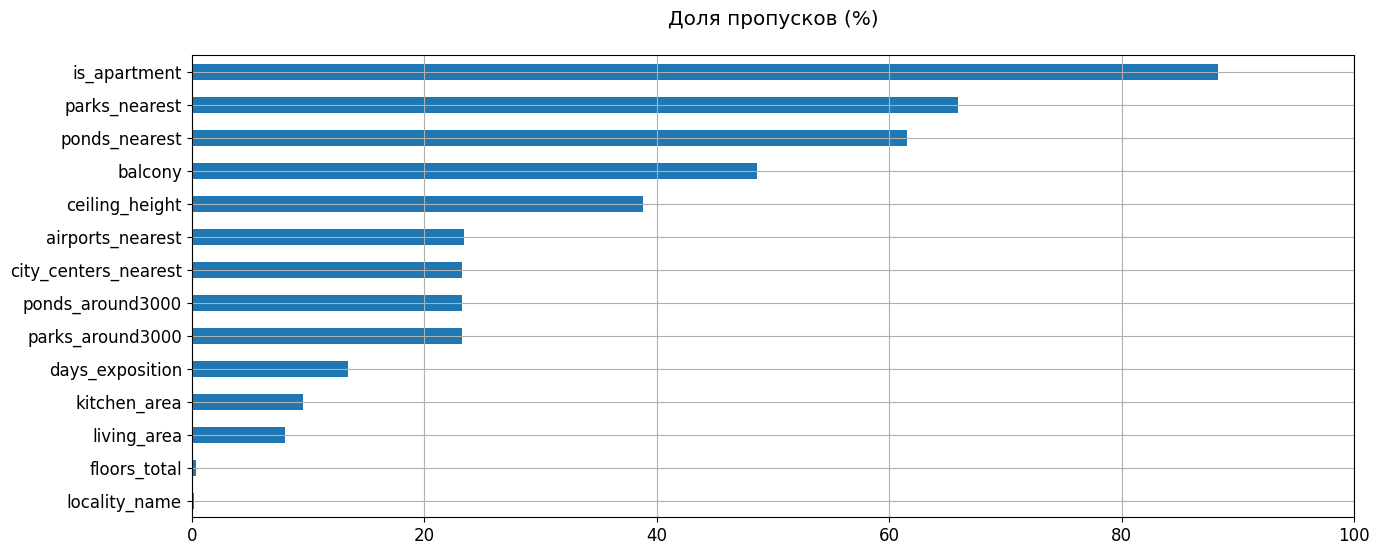

In [12]:
# доля пропусков в каждом столбце таблицы
null_value_barh(data)

Попытаемся разобраться в причинах появления пропусков и по возможности заполнить их подходящими значениями.

**Высота потолков** (столбец `ceiling_height`)

Можно предположить, что если продавец не указал в объявлении высоту потолков в квартире, то она является типичной. В таком случае можно заполнить пропуски типичным значением для выборки - медианой. Но для этого надо сначала разобраться с аномальными значениями, чтобы избавиться от влияния выбросов.

**Число этажей в доме** (столбец `floors_total`)

Можно предположить, что полное число этажей в доме не указано, если дом одноэтажный. Проверим эту гипотезу, для этого посмотрим, какие значения этажа указаны в таких строках.

In [13]:
# список уникальных значений в столбце 'floor'
# для строк, в которых пропуск в столбце 'floors_total'
data.query('floors_total.isna()')['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24])

Гипотеза не подтвердилась, пропуски есть и при значениях этажа > 1. Придётся оставить пропуски.

**Апартаменты** (столбец `is_apartment`)

Является ли объект недвижимости апартаментами, а не квартирой - существенный признак, определяющий правовой статус объекта и его эксплуатационные характеристики, например, размер коммунальных платежей. Поэтому с высокой вероятностью объекты, у которых продавец не указал этот признак, апартаментами **не являются**. 

Поэтому можно заполнить пропущенные значения в столбце `is_apartment` значением `False`. Но сначала посмотрим на распределение значений в этом столбце.

In [14]:
# уникальные значения в столбце 'is_apartment' и их частота
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Для части объектов указано, что они не являются апартаментами, но в абсолютном большинстве записей пропуски. Заполним их значением `False`.

In [15]:
# Заполняем пропуски в столбце 'is_apartment' значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

**Площадь кухни** (столбец `kitchen_area`)

Можно предположить, что площадь кухни не указана отдельно для квартир-студий и квартир со свободной планировкой. Для проверки этой гипотезы посмотрим, присутствуют ли в таблице объекты, у которых пропущено значение площади кухни, и которые при этом не являются студиями и квартирами со свободной планировкой. 

In [16]:
# количество строк, в которых пропуск в столбце 'kitchen_area'
# и значения False с столбцах 'studio' и 'open_plan'
len(data
 .query('kitchen_area.isna() and studio == False and open_plan == False')
)

2062

Таких объектов оказалось много, поэтому гипотеза не подтверждается. Придётся оставить пропуски.

**Число балконов** (столбец `balcony`)

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0.

In [17]:
# Заполняем пропуски в столбце 'balcony' значением 0
data['balcony'] = data['balcony'].fillna(0)

**Название населённого пункта** (столбец `locality_name`)

Можно предположить, что название населённого пункта не указано для объектов, расположенных вблизи центра Санкт-Петербурга. Для проверки этой гипотезу построим гистограмму распределения расстояния до центра города для таких объектов.

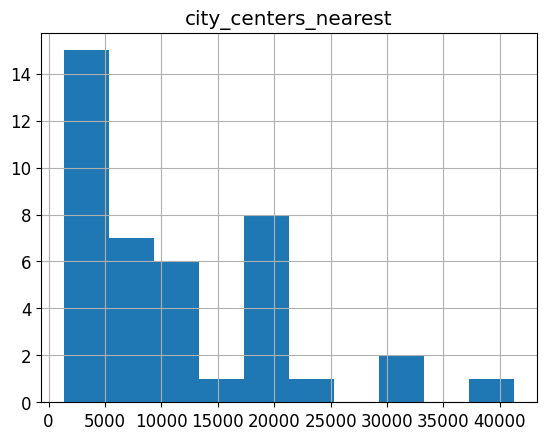

In [18]:
# выбираем строки, в которых пропущено название н.п.
# и строим гистограмму
(data
 .query('locality_name.isna()')
 .hist('city_centers_nearest', bins=10)
)
plt.show()

Среди объектов с неизвестным названием населённого пункта встречаются удалённые от центра Санкт-Петербурга на расстояние, превышающее размер города, поэтому гипотеза не подтверждается. Придётся оставить пропуски.

Проверим также, для какого числа объявлений, где не указан населённый пункт, известно положение объекта на карте, например, есть информация о расстоянии до центра Санкт-Петербурга.

In [19]:
# количество строк, в которых пропуск в столбце 'locality_name', 
# но нет пропуска в столбце 'city_сenters_nearest'
len(data.query('locality_name.isna() and city_centers_nearest.notna()'))

41

Расположение известно для большинства (41 из 49) таких объектов. Для них, скорее всего, продавец по какой-то причине просто не указал название населённого пункта.

**Число парков и водоёмов в радиусе 3 км** (столбцы `parks_around3000` и `ponds_around3000`)

Количество обнаруженных пропусков в этих столбцах одинаково. Проверим, находятся ли они в одних и тех же строках.

In [20]:
# проверяем, что множество строк, в которых пропуск в столбце 'parks_around3000', 
# и множество строк, в которых пропуск в столбце 'ponds_around3000', совпадают
(data.query('parks_around3000.isna()').index == data.query('ponds_around3000.isna()').index).all()

True

Действительно, пропуски в столбцах `parks_around3000` и `ponds_around3000` находятся в дних и тех же строках. Известно, что данные в этих столбцах были заполнены автоматически на основе картографической информации. Поэтому можно предположить, что в этих объявлениях продавец указал адрес с ошибкой, из-за чего не удалось определить местоположение объекта на карте. 

Зафиксируем количество оставшихся пропусков в данных.

In [21]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

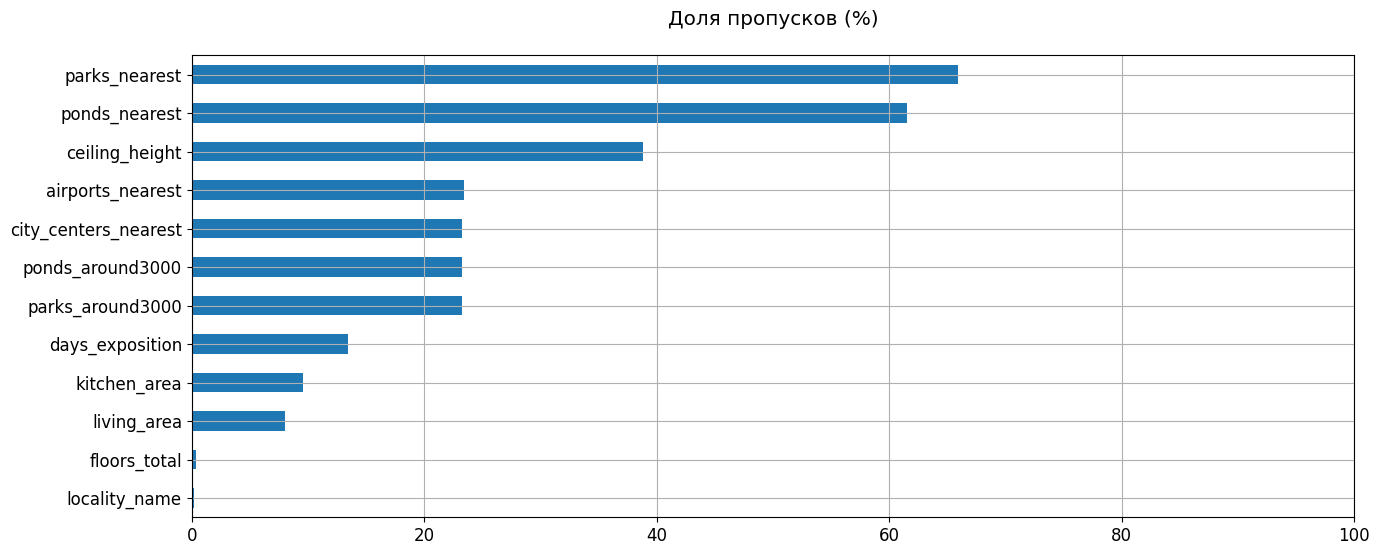

In [22]:
# доля пропусков в каждом столбце таблицы
null_value_barh(data)

**Выводы:**

1. Среди параметров, вносимых вручную пользователем, пропуски имеются в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`:
   - Возможная причина пропусков числа балконов и статуса "апартаменты" - продавец не посчитал нужным указывать значение для отсутствующего признака. 
   - Пропуски высоты потолков, вероятно, связаны с тем, что это значение типичное, и поэтому продавец не указал значение несущественного, по его мнению, признака. 
   - Пропуски значений жилой площади и площади кухни можно объяснить тем, что в объявлении среди фотографий присутствует также план квартиры с указание площадей комнат. 
   - Большинство пропусков в названии населённого пункта вызваны тем, что продавец не заполнил это поле. 


2. Также пропуски имеются в столбцах, заполненных автоматически на основе данных, полученных из геосервисов. Пропуски в них можно объяснить тем, что продавец в объявлении указал адрес объекта с ошибкой, из-за чего не удалось определить местоположение объекта на карте. Другая возможная причина этих пропусков - неполнота данных геосервисов, из-за которой для определённых локаций отсутствует соответствующая информация.


3. Проведена предварительная обработка пропущенных значений:
   - Пропущенные значения числа балконов в столбце `balcony` заполнены значением `0`.
   - Пропущенные значения признака "апартаменты" в столбце `is_apartment` заполнены значением `False`.
   - Пропущенные значения высоты потолков в столбце `ceiling_height` можно заполнить характерным значением для выборки. Но для этого надо сначала разобраться с аномальными значениями, чтобы избавиться от влияния выбросов. Поэтому пока пропуски сохранены.

### Изменение типов данных

После устранения пропусков в столбце `is_apartment` все значения в этом столбце стали логического типа `bool`. Выведем ещё раз информацию о типах данных в столбцах таблицы.

In [23]:
# типы данных в столбцах таблицы
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Изменение типов данных в числовых столбцах**

В столбцах, содержащих числовые значения, которые по характеру данных должны выражаться целым числом, можно заменить тип данных на целочисленный. Однако если в столбце имеются пропуски - значения `NaN`, которые относятся к типу `float64`, то тип данных в столбце изменить не получится.

Поэтому рассмотрим только столбцы типа `float64`, не содержащие пропусков.

In [24]:
# выбираем столбцы типа float64, в которых нет пропусков
(data
 .select_dtypes(include = ['float64'])
 .dtypes
 .where(data.isna().sum() == 0)
 .dropna()
)

last_price    float64
total_area    float64
balcony       float64
dtype: object

Число балконов в квартире явно целое, поэтому тип значений в столбце `balcony` заменим на целочисленный.

In [25]:
data['balcony'] = data['balcony'].astype(int)

Для столбцов `last_price` и `total_area` нужно проверить, содержат ли значения в них дробную часть.

In [26]:
# содержат ли дробную часть значения в столбце 'last_price'?
data['last_price'].mod(1).any()

False

In [27]:
# содержат ли дробную часть значения в столбце 'total_area'?
data['total_area'].mod(1).any()

True

Значения цены в столбце `last_price` не содержат дробной части, поэтому их можно тоже преобразовать в целые числа.

In [28]:
data['last_price'] = data['last_price'].astype(int)

**Изменение типа данных даты**


Столбец `first_day_exposition` содержит дату публикации объявления. Посмотрим на формат значений в этом столбце.

In [29]:
# типы данных в столбце 'first_day_exposition'
data['first_day_exposition'].apply(type).unique().tolist()

[str]

В столбце даты представлены строками. Преобразуем их в тип даты-времени. Для этого нужно узнать формат представления значений и убедиться, что он одинаков во всех строках.

In [30]:
# значение в строке 0 в столбце 'first_day_exposition'
data.loc[0,'first_day_exposition']

'2019-03-07T00:00:00'

In [31]:
# проверяем, что длина всех строк одинакова
data['first_day_exposition'].apply(len).nunique() == 1

True

In [32]:
# преобразуем даты в столбце 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')

Проверим результат:

In [33]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В столбце осталась только дата, как и должно быть, потому что время во всех строках 00:00:00. Выведем ещё раз типы данных в тех столбцах таблицы, где они были изменены.

In [34]:
# типы данных в столбцах таблицы
data[['balcony', 'last_price', 'first_day_exposition']].dtypes

balcony                          int64
last_price                       int64
first_day_exposition    datetime64[ns]
dtype: object

**Выводы:**

- Тип данных значений числа балконов (столбец `balcony`) и цены объекта (столбец `last_price`) изменён на целочисленный. Изменение типа в этом случае нужно, чтобы сократить объём памяти для хранения данных.
- Тип данных даты в столбце `first_day_exposition` изменён на  `datetime64`. Изменение типа в этом случае нужно, чтобы производить операции с датами и просто извлекать компоненты даты.

### Обработка дубликатов

В столбце `locality_name` с названием населённого пункта (далее - н.п.) могут быть неявные дубликаты, т.к. одному и тому же н.п. могут соответствовать разные варианты названия. Для поиска неявных дубликатов нужно изучить список уникальных значений в столбце.

In [35]:
# уникальные значения с столбце 'locality_name'
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [36]:
print('Уникальных названий населённых пунктов:', data['locality_name'].nunique())

Уникальных названий населённых пунктов: 364


В результате изучения списка установлено:
- В столбце `locality_name` названия населённых пунктов встречаются как с названием типа н.п. ("посёлок Мурино"), так и без него (просто "Мурино"). 
- Типы н.п. тоже могут быть дубликатами, например "поселок городского типа" и "городской посёлок" - это одно и то же. 
- Встречается написание как с буквой "ё", так и с "е" вместо неё.

Поэтому для устранения неявных дубликатов названий н.п. создадим в таблице новый столбец `locality_name_short`, в который запишем краткое название н.п. без указания его типа, предварительно заменив "ё" на "е".

In [37]:
# в новый столбец 'locality_name_short' записываем краткие названия, в которых
# заменяем 'ё' на 'е', а также
# заменяем наименования типов н.п. на пустую строку (т.е. удаляем)
data['locality_name_short'] = (data['locality_name']
 .str.replace('ё', 'е')          
 .replace(['городской поселок ', 
           'коттеджный поселок ',
           'поселок городского типа ',
           'поселок при железнодорожной станции ',
           'поселок станции ',
           'поселок ',
           'садоводческое некоммерческое товарищество ',
           'садовое товарищество ',
           'деревня ',
           'село '
          ], '', regex=True)
)

Проверим получившийся список кратких названий н.п.

In [38]:
# уникальные значения с столбце 'locality_name_short'
data['locality_name_short'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [39]:
print('Уникальных названий населённых пунктов:', data['locality_name_short'].nunique())

Уникальных названий населённых пунктов: 305


Всего уникальных названий н.п. после устранения неявных дубликатов осталось 305. В столбце также имеются пропуски, поэтому с списке уникальных значений также присутствует `nan`.

**Удаление явных дубликатов**

Проверим, нет ли в таблице повторяющихся строк.

In [40]:
# количество строк-дубликатов
data.duplicated().sum()

0

Явные дубликаты не обнаружены.

Проведём также проверку на дубликаты по подмножеству ключевых параметров объявления.

In [41]:
# ключевые параметры объектов
key_params = ['total_area', 
              'floor', 
              'floors_total', 
              'city_centers_nearest', 
              'locality_name',
              'rooms',
              'balcony',
              'first_day_exposition',
             ]
# количество строк-дубликатов
data.duplicated(subset=key_params).sum()

3

При поиске по совпадению подмножества параметров обнаружены потенциальные дубликаты. Посмотрим, какие это объекты.

In [42]:
# строки-дубликаты по подмножеству параметров
(data
 [data.duplicated(subset=key_params, keep=False)]
 .sort_values(key_params + ['first_day_exposition'])
 .head(10)
)

total_images  last_price  total_area first_day_exposition  rooms  \
11117             6     6812033        60.4           2018-07-24      2   
14886             6     7433186        60.4           2018-07-24      2   
1809              6     5400000        68.8           2018-11-16      2   
18579             1     5400043        68.8           2018-11-16      2   
12376             3    18206548       139.5           2018-07-04      4   
23516             3    22529250       139.5           2018-07-04      4   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
11117            3.00           4.0          NaN      2         False   False   
14886            3.00           4.0          NaN      2         False   False   
1809             2.75          22.0        35.55     16         False   False   
18579            2.75          22.0        35.55     16         False   False   
12376            3.30          16.0        82.55      9         False   False   
23516            3.30          16.0        82.55      9         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
11117      False         10.44        5  Санкт-Петербург           44870.0   
14886      False         10.94        5  Санкт-Петербург           44870.0   
1809       False         13.67        0   посёлок Мурино               NaN   
18579      False         13.67        0   посёлок Мурино               NaN   
12376      False         13.84        0  Санкт-Петербург           37434.0   
23516      False         13.84        0  Санкт-Петербург           37434.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
11117               20802.0               0.0            NaN   
14886               20802.0               0.0            NaN   
1809                    NaN               NaN            NaN   
18579                   NaN               NaN            NaN   
12376                8460.0               1.0          441.0   
23516                8460.0               1.0          441.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  
11117               1.0          792.0            219.0     Санкт-Петербург  
14886               1.0          792.0              NaN     Санкт-Петербург  
1809                NaN            NaN             24.0              Мурино  
18579               NaN            NaN             20.0              Мурино  
12376               2.0          427.0              NaN     Санкт-Петербург  
23516               2.0          427.0            266.0     Санкт-Петербург

Скорее всего, это действительно одни и те же квартиры. Но некоторые из параметров, в частости цена, при этом отличаются. Это может быть результат уточнения информации, а также добавления изображений к объявлению (столбец `total_images`).

Пожалуй, не стоит исключать такие дубликаты. В данном исследовании нас интересует связь цены и параметров объектов, а каждое объявление даёт такое сочетание, даже если это фактически одна и та же квартира.

**Выводы:**

- Устранены неявные дубликаты названий населённых пунктов в столбце `locality_name` путём удаления из названия наименования типа н.п. и замены буквы 'ё' на 'е'.
- Явные дубликаты (повторяющиеся строки) в таблице не обнаружены.

### Добавление новых столбцов

Добавим в таблицу новые столбцы:
- `price_per_sqm` - цена одного квадратного метра,
- `publication_weekday` - номер дня недели публикации объявления (0 - понедельник, 1 - вторник и т.д.),
- `publication_month` - месяц публикации объявления,
- `publication_year` - год публикации объявления,
- `floor_type` - тип этажа квартиры,
- `city_centers_nearest_km` - расстояние до центра города в километрах.

Для категоризации объектов по типу этажа создадим функцию `get_floor_type()`, которую будем применять с строкам таблицы.

In [43]:
def get_floor_type(row):
    """
    Принимает строку таблицы, содержащей столбцы 
    'floor' (этаж) и 'floors_total' (число этажей в доме).
    Возвращает тип этажа: первый, последний или другой.
    """
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        
        # если этаж неизвестен
        if pd.isna(floor):
            return None
        # если этаж первый
        elif floor == 1:
            return 'первый'
        # если неизвестно число этажей в доме, то непонятно:
        # может быть либо последний, либо другой
        elif pd.isna(floors_total):
            return None
        # если этаж равен числу этажей в доме, то он последний
        elif floor == floors_total:
            return 'последний' 
        
        # добавлена доп. проверка значения этажа
        elif 1 < floor < floors_total:
            return 'другой'
        else:
            return None
    
    # в случае ошибки
    except:
        return None

In [44]:
# добавляем в таблицу новые столбцы:

# цена одного квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

# номер дня недели публикации объявления
data['publication_weekday'] = data['first_day_exposition'].dt.weekday

# месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры,
data['floor_type'] = data.apply(get_floor_type, axis=1)

# расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

Посмотрим на результат.

In [45]:
# первые 5 строк таблицы
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1             NaN          11.0         18.6      1         False   False   
2             NaN           5.0         34.3      4         False   False   
3             NaN          14.0          NaN      9         False   False   
4            3.03          14.0         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
1      False          11.0        2   посёлок Шушары           12817.0   
2      False           8.3        0  Санкт-Петербург           21741.0   
3      False           NaN        0  Санкт-Петербург           28098.0   
4      False          41.0        0  Санкт-Петербург           31856.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   
3                6800.0               2.0           84.0               3.0   
4                8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition locality_name_short  price_per_sqm  \
0          755.0              NaN     Санкт-Петербург      120370.37   
1            NaN             81.0              Шушары       82920.79   
2          574.0            558.0     Санкт-Петербург       92785.71   
3          234.0            424.0     Санкт-Петербург      408176.10   
4           48.0            121.0     Санкт-Петербург      100000.00   

   publication_weekday  publication_month  publication_year floor_type  \
0                    3                  3              2019     другой   
1                    1                 12              2018     первый   
2                    3                  8              2015     другой   
3                    4                  7              2015     другой   
4                    1                  6              2018     другой   

   city_centers_nearest_km  
0                     16.0  
1                     19.0  
2                     14.0  
3                      7.0  
4                      8.0

### Выводы

В результате предобработки данные подготовлены для анализа:
- Проведена обработка пропущенных значений:
  - Пропущенные значения числа балконов в столбце `balcony` заполнены значением `0`.
  - Пропущенные значения признака "апартаменты" в столбце `is_apartment` заполнены значением `False`.
  - Пропущенные значения высоты потолков в столбце `ceiling_height` можно заполнить характерным значением для выборки, но перед этим разобраться с аномальными значениями, чтобы избавиться от влияния выбросов.
- Тип данных в столбцах приведён в соответствие с характером содержащейся в них информации:
    - Изменены типы данных в столбцах `balcony` и `last_price`, содержащих целочисленные значения числа балконов и цены. Изменение типа в этом случае нужно, чтобы сократить объём памяти для хранения данных. Также изменён тип данных в столбце `first_day_exposition`, содержащем дату публикации объявления. Изменение типа в этом случае нужно, чтобы производить операции с датами и просто извлекать компоненты даты.
- Проведена обработка дубликатов:
    - Устранены неявные дубликаты названий населённых пунктов в столбце `locality_name`.
    - Явные дубликаты не были обнаружены.
- В таблицу добавлены новые столбцы для категоризации объектов по следующим параметрам: 
    - цена одного квадратного метра (столбец `price_per_sqm`),
    - номер дня недели публикации объявления (столбец `publication_weekday`),
    - месяц публикации объявления (столбец `publication_month`),
    - год публикации объявления (столбец `publication_year`),
    - тип этажа квартиры (столбец `floor_type`),
    - расстояние до центра города в километрах (столбец `city_centers_nearest_km`).

## Исследовательский анализ данных

### Исследование параметров квартир

Изучим параметры объектов на предмет аномалий - редких, выбивающихся и неправдоподобных значений. Для этого построим гистограммы распределения количества объектов по значениям параметров.

Для построения гистограмм с заданными параметрами графика создадим функцию `my_hist()`.

In [46]:
def my_hist(data, column, kind='hist', title='', xlabel='', bins=10, range=None):
    """
    Строит гистограмму.
    """
    # строим гистограмму с помощью plot.hist()
    if kind == 'hist':
        ax = data.plot.hist(y=column, bins=bins, range=range, figsize=(15, 5), 
                            grid=True, legend = False,
                           )
        if range is not None:
            ax.set_xlim(range)
    
    # строим гистограмму с помощью value_counts() и plot.bar()
    if kind == 'bar':  
        ax = (data[column]
                 .value_counts()
                 .sort_index()
                 .plot.bar(figsize=(15, 5), grid=True, rot=0)
             )
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Количество объявлений')
    ax.set_title(title)
    return ax

Для построения диаграмм размаха с заданными параметрами графика создадим функцию `my_boxplot()`.

In [47]:
def my_boxplot(data, column, label):
    """
    Строит диаграмму размаха.
    """
    ax = data.boxplot(column, figsize=(15, 3), vert=False)
 
    ax.set_xlabel(label)
    ax.set_title('Диаграмма размаха для столбца ' + "'" + column + "'");

Для получения числовых характеристик распределения значений в столбце создадим функцию `column_stat()`.

In [48]:
def column_stat(data, columns):
    """
    Возвращает статистику по столбцам: 
    кол-во объектов, кол-во пропусков, минимум, среднее, медиана, максимум.
    """
    stat = (data[columns]
            .agg(['count', lambda x: x.isna().sum(), 'min', 'mean', 'median', 'max'])
            .round(2)
           )
    # если объект Series, то преобразуем его в DataFrame
    if isinstance(stat, pd.Series):
        stat = stat.to_frame()
    # транспонируем
    stat = stat.T
    # название столбца с количеством пропусков
    stat.rename(columns={'<lambda>': 'nan_count'}, inplace=True)
    # количество - всегда целое число
    stat[['count','nan_count']] = stat[['count','nan_count']].astype(int, errors='ignore')
    # название индекса
    stat.index.name = 'column'
    
    return stat

Для подсчёта количества и доли редких значений и выбросов создадим функцию `outliers_stat()`.

In [49]:
def outliers_stat(cond):
    """
    Выводит количество и долю (в %) значений в столбце, 
    удовлетворяющих условию в аргументе.
    """
    print('Количество:', cond.sum())
    print(f'Доля: {cond.mean():.2%}')

#### Общая площадь квартиры

На гистограмме, построенной на этапе предварительного изучения данных, было заметно, что в столбце `total_area` присутствуют значения, сильно превышающие большинство.

Выведем характеристики распределения значений в этом столбце.

In [50]:
# характеристики распределения значений в столбце
column_stat(data, 'total_area')

count  nan_count   min   mean  median    max
column                                                  
total_area  23699          0  12.0  60.35    52.0  900.0

В столбце **нет пропусков**, но минимальное и максимальное значение кажутся **аномальными**.

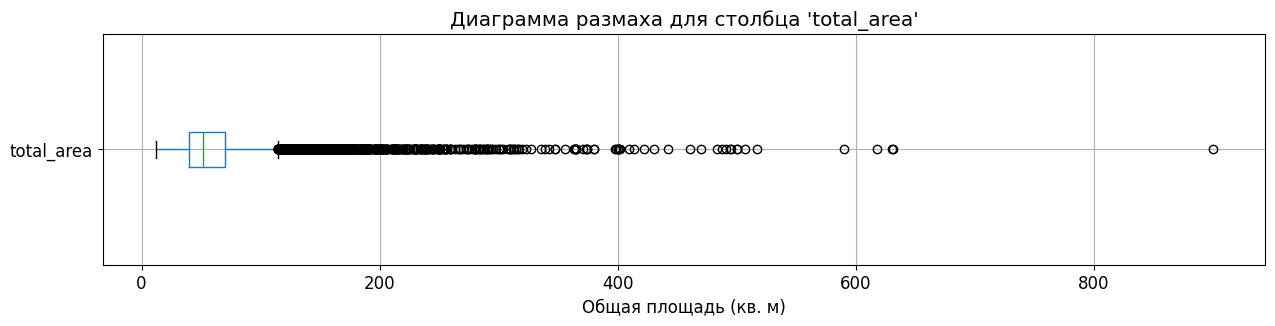

In [51]:
# строим диаграмму размаха
my_boxplot(data, 'total_area', 'Общая площадь (кв. м)')

На диаграмме размаха выбросов так много, что они сливаются в линию. Однако значений больше 250 кв.м уже не так много. 

In [52]:
# считаем количество и долю объектов с общей площадью > 250 кв.м
outliers_stat(data['total_area'] > 250)

Количество: 112
Доля: 0.47%


Таких квартир оказалось очень мало.

Для исследования редких и выбивающихся значений в столбце построим гистограммы.

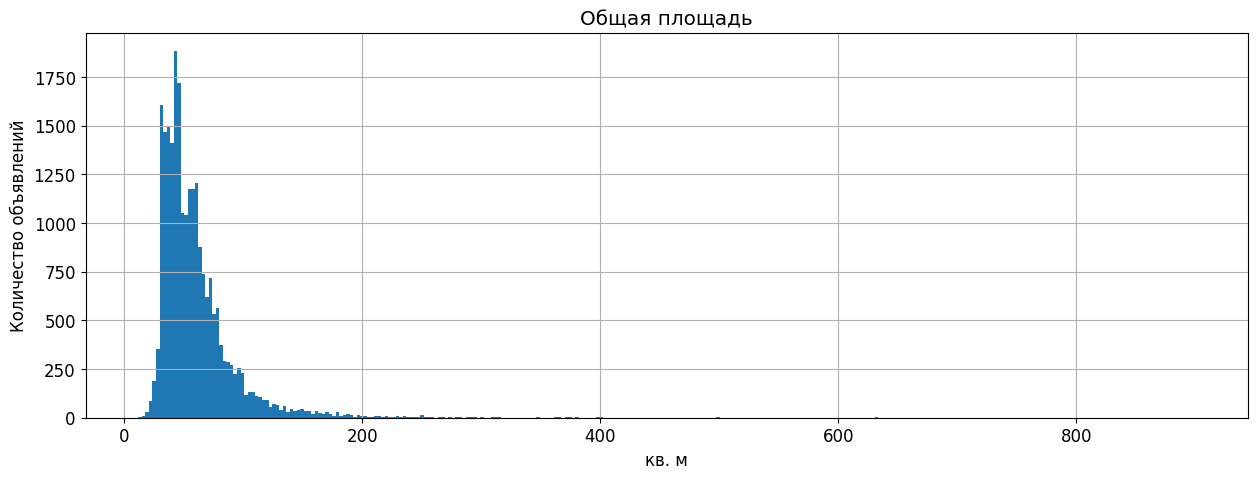

In [53]:
# строим гистограмму
my_hist(data, 'total_area', title= 'Общая площадь', xlabel='кв. м', bins=300);

Распределение имеет очень длинный хвост, что затрудняет анализ. Поэтому построим гистограмму в ограниченном диапазоне.

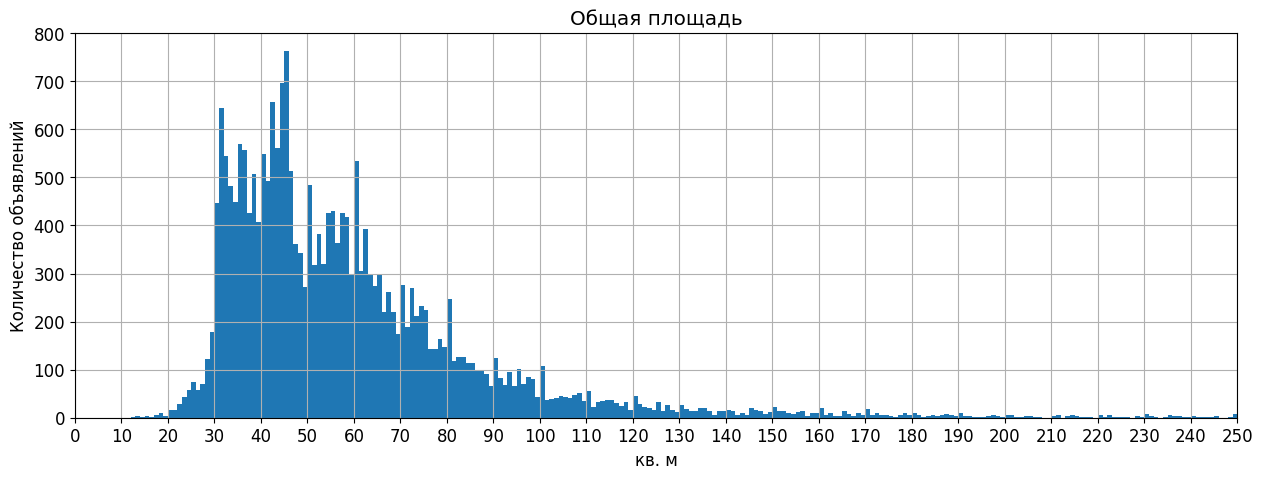

In [54]:
# строим гистограмму
ax = my_hist(data, 'total_area', title= 'Общая площадь', xlabel='кв. м', bins=240, range=(10, 250))
ax.set_xticks(range(0, 260, 10));

Распределение общей площади имеет несимметричный вид с длинным "хвостом" из значений, превышающих основную массу. Большинство значений находится в диапазоне от 20 до 100 кв.м. Отдельные резкие пики на распределении, вероятно, соответствуют распространённым типовым планировкам.

По гистограмме видно, что объектов с общей площадью менее 20 кв. м и более 200 кв. м в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

#### Жилая площадь

Выведем характеристики распределения значений в этом столбце.

In [55]:
# характеристики распределения значений в столбце
column_stat(data, 'living_area')

count  nan_count  min   mean  median    max
column                                                  
living_area  21796       1903  2.0  34.46    30.0  409.7

В столбце `living_area` аномально малое минимальное значение - 2 кв.м. Для их изучения построим фрагмент гистограммы в диапазоне до 10 кв.м.

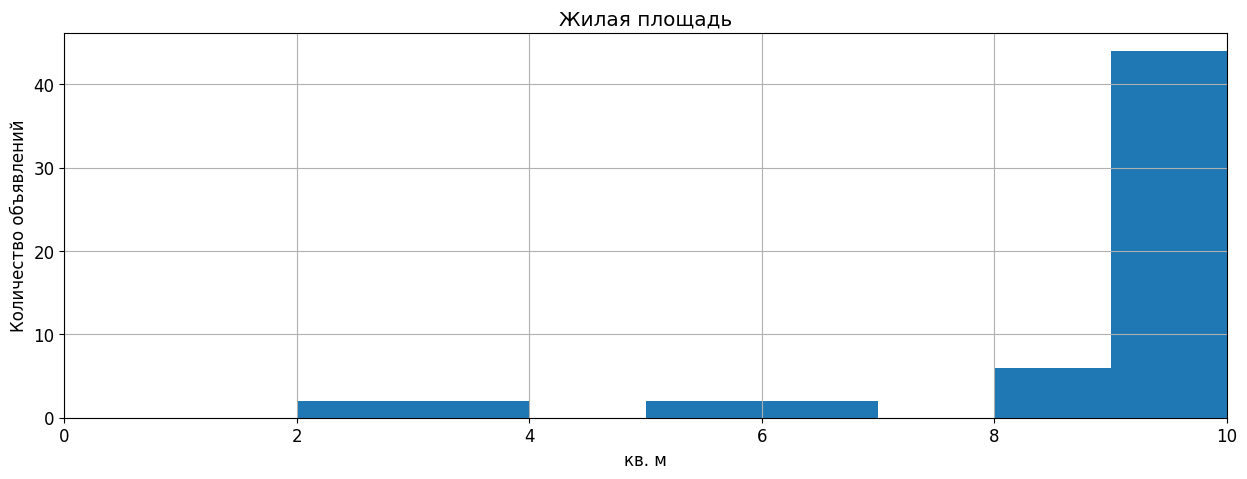

In [56]:
# строим гистограмму
my_hist(data, 'living_area', title='Жилая площадь', xlabel='кв. м', bins=10, range=(0, 10));

Квартиры с жилой площадью менее 7 кв.м кажутся подозрительными. Посмотрим на них.

In [57]:
# считаем количество и долю объектов с жилой площадью < 7 кв.м
outliers_stat(data['living_area'] < 7)

Количество: 8
Доля: 0.03%


In [58]:
# отбираем объекты с жилой площадью < 7 кв.м
(data
 .query('living_area < 7')
 .sort_values('living_area')
)

total_images  last_price  total_area first_day_exposition  rooms  \
13915            20     6350000        52.0           2018-02-06      2   
21758             0     2330000        23.0           2018-01-01      0   
3242              7     4440000        41.0           2017-07-02      1   
23574            14    64990000       139.0           2015-11-24      3   
17582            11     2680000        22.0           2018-08-11      0   
21943            15     6100000        77.6           2019-02-28      4   
16431            13     3799000        31.0           2018-04-12      1   
19251            19     4050000        33.0           2018-10-15      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
13915             3.0           6.0          2.0      2         False   False   
21758             NaN          24.0          2.0     22         False    True   
3242              NaN          17.0          3.0     17         False   False   
23574             3.0           8.0          3.0      8         False   False   
17582             NaN          25.0          5.0      8         False    True   
21943             2.5           9.0          5.4      1         False   False   
16431             2.6           5.0          6.0      1         False   False   
19251             2.5          22.0          6.5     21         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
13915      False           9.0        0  Санкт-Петербург           32453.0   
21758      False           NaN        0   посёлок Мурино               NaN   
3242       False          11.0        0  Санкт-Петербург           19272.0   
23574      False          16.0        1  Санкт-Петербург           33255.0   
17582      False           NaN        2  Санкт-Петербург           22735.0   
21943      False           9.8        0  Санкт-Петербург           29338.0   
16431      False          17.0        0  Санкт-Петербург           32177.0   
19251      False          18.0        0  Санкт-Петербург            9258.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
13915                6521.0               0.0            NaN   
21758                   NaN               NaN            NaN   
3242                13073.0               0.0            NaN   
23574                5975.0               1.0          630.0   
17582               11618.0               1.0          835.0   
21943               11270.0               1.0          584.0   
16431                4826.0               1.0          430.0   
19251               10592.0               1.0          458.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
13915               1.0         1012.0             91.0     Санкт-Петербург   
21758               NaN            NaN             66.0              Мурино   
3242                0.0            NaN            216.0     Санкт-Петербург   
23574               3.0          100.0            280.0     Санкт-Петербург   
17582               1.0          652.0             70.0     Санкт-Петербург   
21943               0.0            NaN             33.0     Санкт-Петербург   
16431               0.0            NaN            168.0     Санкт-Петербург   
19251               0.0            NaN             44.0     Санкт-Петербург   

       price_per_sqm  publication_weekday  publication_month  \
13915      122115.38                    1                  2   
21758      101304.35                    0                  1   
3242       108292.68                    6                  7   
23574      467553.96                    1                 11   
17582      121818.18                    5                  8   
21943       78608.25                    3                  2   
16431      122548.39                    3                  4   
19251      122727.27                    0                 10   

       publication_year floor_ty

В таблице присутствуют квартиры с разным числом комнат от 0 (студия) до 4 с общей площадью от 22 до 139 кв.м. Вероятно, продавец по ошибке ввёл вместо жилой площади площадь санузла. Другое возможное объяснение - перепутаны значения жилой площади и площади кухни. Таких квартир всего лишь 8, поэтому их можно исключить из данных.

In [59]:
# удаляем объекты с жилой площадью < 7 кв.м
data.drop(data.query('living_area < 7').index, inplace=True, errors='ignore')

Аналогично общей площади, на гистограмме распределения жилой площади, построенной на этапе предварительного изучения данных, было заметно присутствие значений, сильно превышающих большинство. Поэтому прежде чем построить более подробную гистограмму, построим диаграмму размаха. чтобы исследовать эти выбросы.

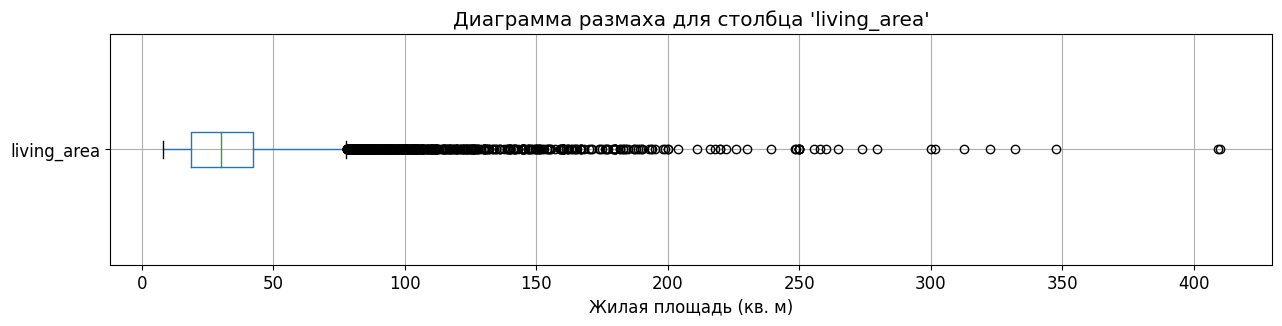

In [60]:
# строим диаграмму размаха
my_boxplot(data, 'living_area', 'Жилая площадь (кв. м)')

Подсчитаем количество объявлений о продаже квартир с жилой площадью более 150 кв.м.

In [61]:
# считаем количество и долю объектов с жилой площадью > 150 кв.м
outliers_stat(data['living_area'] > 150)

Количество: 119
Доля: 0.50%


Таких квартир оказалось очень мало. Построим гистограмму распределения значений в этом столбце без редких очень больших значений.

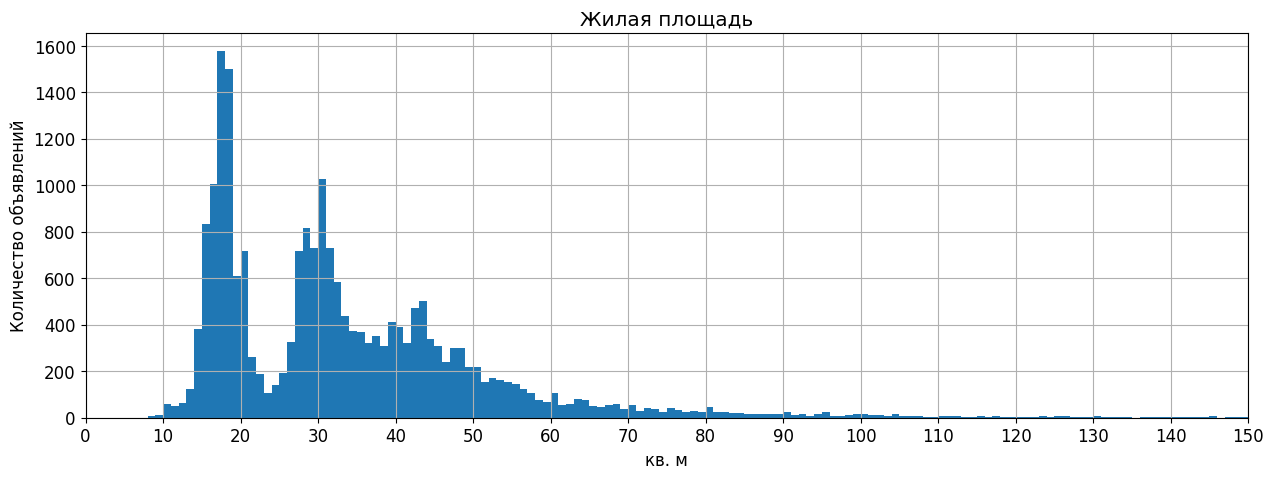

In [62]:
# строим гистограмму
ax = my_hist(data, 'living_area', title='Жилая площадь', xlabel='кв. м', bins=150, range=(0, 150))
ax.set_xticks(range(0, 160, 10));

Распределение жилой площади имеет несколько узких пиков, которые, вероятно, соответствуют количеству комнат в квартире: 1, 2, 3. Далее следует длинный "хвост" из значений, превышающих основную массу.

По гистограмме видно, что объектов с жилой площадью менее 10 кв. м и более 80 кв. м в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

Также нужно убедиться, что жилая площадь не превышает общей.

In [63]:
# проверяем, есть ли квартиры, у которых указана жилая площадь больше общей
(data['living_area'] > data['total_area']).any()

False

Таких не оказалось, как и должно быть.

#### Площадь кухни

Выведем характеристики распределения значений в этом столбце.

In [64]:
# характеристики распределения значений в столбце
column_stat(data, 'kitchen_area')

count  nan_count  min   mean  median    max
column                                                   
kitchen_area  21415       2276  1.3  10.57     9.1  112.0

Как было обнаружено на этапе предварительного изучения данных, в столбце `kitchen_area` аномально малое минимальное значение - 1,3 кв.м. Для их изучения построим фрагмент гистограммы в диапазоне до 5 кв.м.

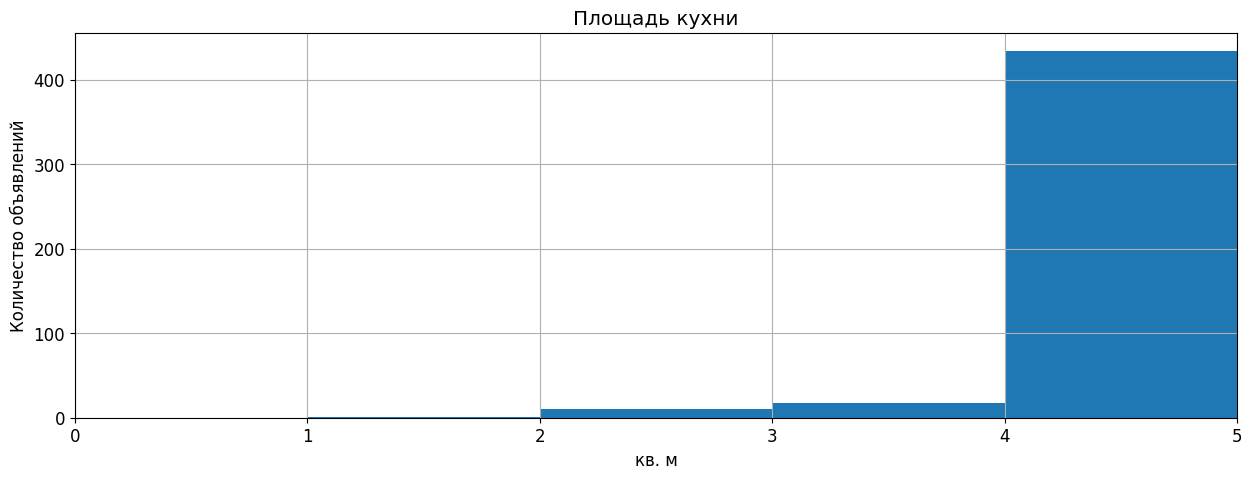

In [65]:
# строим гистограмму
my_hist(data, 'kitchen_area', title='Площадь кухни', xlabel='кв. м', bins=5, range=(0, 5));

In [66]:
# считаем количество и долю объектов с площадью кухни < 4 кв.м
outliers_stat(data['kitchen_area'] < 4)

Количество: 29
Доля: 0.12%


В отличие от жилой площади, распределение площади кухни спадает более плавно в области малых значений. Поэтому сложно определить, являются ли малые значения ошибочными (например, вместо площади кухни продавец указал площадь санузла), или это так называемая европланировка, то есть кухня совмещена с комнатой и указана площадь кухонной зоны. Однако таких объектов очень мало, поэтому их можно удалить далее при фильтрации выборки от редких значений.

На гистограмме распределения площади кухни, построенной на этапе предварительного изучения данных, было заметно присутствие значений, сильно превышающих большинство. Поэтому прежде чем построить более подробную гистограмму, построим диаграмму размаха, чтобы исследовать эти выбросы.

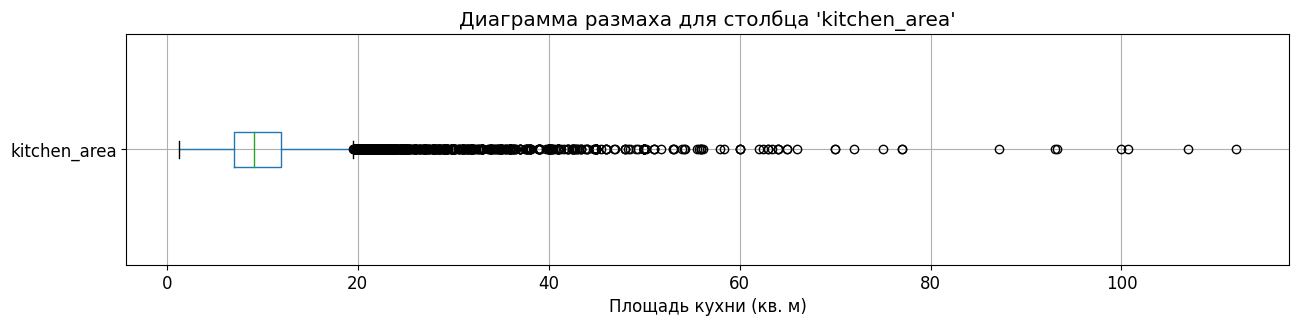

In [67]:
# строим диаграмму размаха
my_boxplot(data, 'kitchen_area', 'Площадь кухни (кв. м)')

Подсчитаем количество объявлений о продаже квартир с  площадью кухни более 40 кв.м.

In [68]:
# считаем количество и долю объектов с площадью кухни > 40 кв.м
outliers_stat(data['kitchen_area'] > 40)

Количество: 131
Доля: 0.55%


Таких квартир очень мало. Построим гистограмму распределения значений в этом столбце без редких очень больших значений.

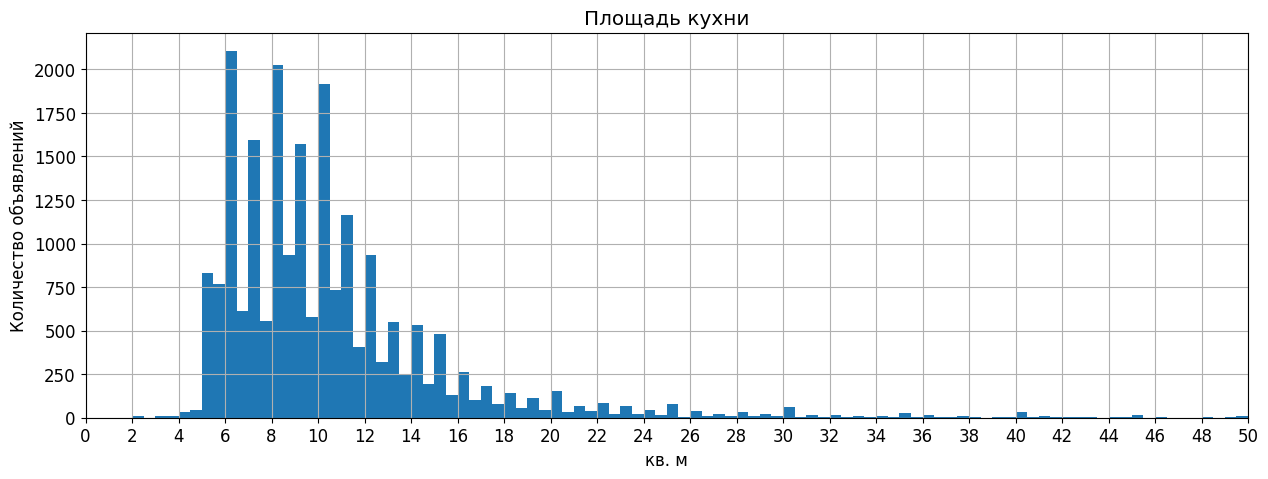

In [69]:
# строим гистограмму
ax = my_hist(data, 'kitchen_area', title='Площадь кухни', xlabel='кв. м', bins=100, range=(0, 50))
ax.set_xticks(range(0, 52, 2));

Распределение площади кухни также имеет резкие пики на вершине, вероятно, соответствующие типовым планировкам, и далее длинный "хвост" из значений, превышающих основную массу. Большинство значений сосредоточено в диапазоне от 5 до 16 кв.м.

По гистограмме видно, что объектов с площадью кухни менее 5 кв. м и более 30 кв. м в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

Также нужно убедиться, что площадь кухни не превышает общей.

In [70]:
# проверяем, есть ли квартиры, у которых указана жилая площадь больше общей
(data['kitchen_area'] > data['total_area']).any()

False

Таких не оказалось, как и должно быть.

#### Цена объекта

Выведем характеристики распределения значений в этом столбце.

In [71]:
# характеристики распределения значений в столбце
column_stat(data, 'last_price')

count  nan_count      min        mean     median          max
column                                                                   
last_price  23691          0  12190.0  6539758.78  4650000.0  763000000.0

На этапе предварительного изучения данных в столбце `last_price` были обнаружены как аномально малые (минимальное значение 12190), так и аномально большие значения (максимальное значение 763 000 000).

Для исследования редких и выбивающихся значений в столбце построим гистограммы.

Для изучения аномально малых значений построим фрагмент гистограммы в диапазоне цен до 1 000 000.

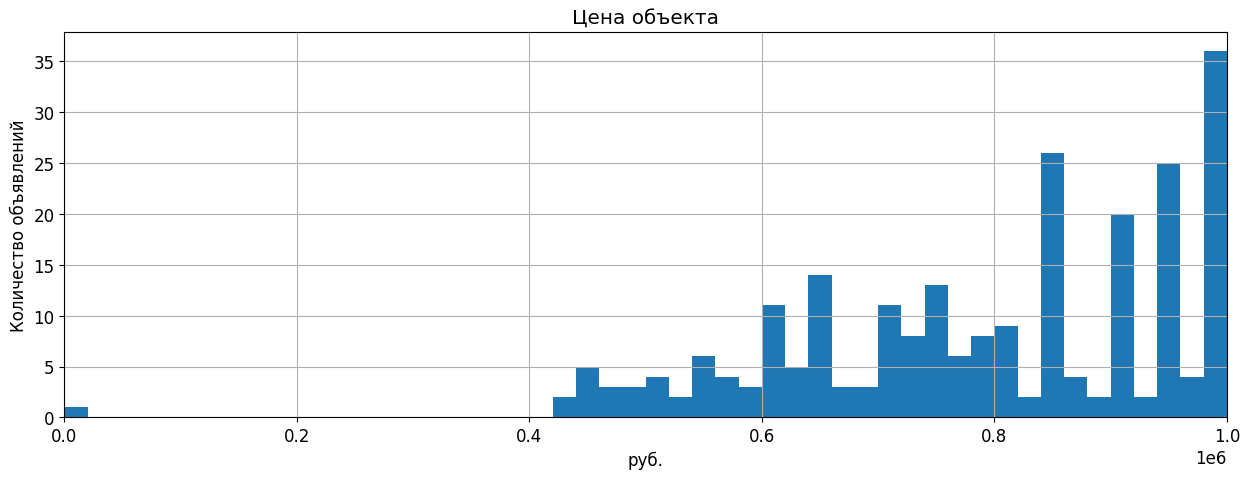

In [72]:
# строим гистограмму
my_hist(data, 'last_price', title='Цена объекта', xlabel='руб.', bins=50, range=(0, 1_000_000));

Посмотрим на объекты с ценой менее 400 000.

In [73]:
# отбираем объекты с ценой < 400 000
data.query('last_price < 400_000')

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8793            2.75          25.0         32.0     25         False   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793      False          40.5        0  Санкт-Петербург           36421.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793                9176.0               1.0          805.0               0.0   

      ponds_nearest  days_exposition locality_name_short  price_per_sqm  \
8793            NaN              8.0     Санкт-Петербург         111.83   

      publication_weekday  publication_month  publication_year floor_type  \
8793                    2                  3              2019  последний   

      city_centers_nearest_km  
8793                      9.0

Обнаружен один объект с аномально низкой ценой. Эта аномалия может быть объяснена тем, что продавец указал цену в тысячах. Поэтому исправим значение, домножив его на 1000. Заодно надо домножить на 1000 и цену за один кв.м.

In [74]:
# выбираем объект с низкой ценой по условию и 
# умножаем на 1000 значения в столбцах 'last_price' и 'price_per_sqm'
data.loc[data['last_price'] < 100_000, ['last_price', 'price_per_sqm']] *= 1000

Прежде чем построить гистограмму, построим диаграмму размаха, чтобы исследовать выбросы с аномально большими значениями.

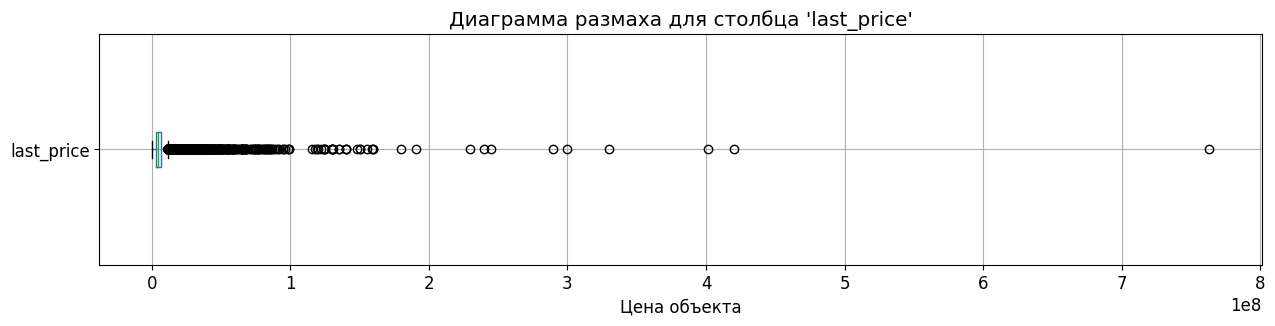

In [75]:
# строим диаграмму размаха
my_boxplot(data, 'last_price', 'Цена объекта')

Посмотрим на самые дорогие квартиры.

In [76]:
(data
 .sort_values('last_price', ascending=False)
 .head(10)
)

total_images  last_price  total_area first_day_exposition  rooms  \
12971            19   763000000       400.0           2017-09-30      7   
19540             8   420000000       900.0           2017-12-06     12   
14706            15   401300000       401.0           2016-02-20      5   
1436             19   330000000       190.0           2018-04-04      3   
15651            20   300000000       618.0           2017-12-18      7   
22831            18   289238400       187.5           2019-03-19      2   
16461            17   245000000       285.7           2017-04-10      6   
13749             7   240000000       410.0           2017-04-01      6   
5893              3   230000000       500.0           2017-05-31      6   
8900             13   190870000       268.0           2016-03-25      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
12971             NaN          10.0        250.0     10         False   False   
19540            2.80          25.0        409.7     25         False   False   
14706             NaN           9.0        204.0      9         False   False   
1436             3.50           7.0         95.0      5         False   False   
15651            3.40           7.0        258.0      5         False   False   
22831            3.37           6.0         63.7      6         False   False   
16461            3.35           7.0        182.8      4         False   False   
13749            3.40           7.0        218.0      7         False   False   
5893              NaN           7.0          NaN      7         False   False   
8900              NaN           8.0        132.0      7         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
12971      False           NaN        2  Санкт-Петербург           25108.0   
19540      False         112.0        0  Санкт-Петербург           30706.0   
14706      False          24.0        3  Санкт-Петербург           21912.0   
1436       False          40.0        0  Санкт-Петербург           23011.0   
15651      False          70.0        0  Санкт-Петербург           32440.0   
22831      False          30.2        0  Санкт-Петербург           22494.0   
16461      False          29.8        0  Санкт-Петербург           33143.0   
13749      False          40.0        0  Санкт-Петербург           32440.0   
5893       False          40.0        0  Санкт-Петербург           32440.0   
8900       False          40.0        0  Санкт-Петербург           32440.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
12971                3956.0               1.0          530.0   
19540                7877.0               0.0            NaN   
14706                2389.0               1.0          545.0   
1436                 1197.0               3.0          519.0   
15651                5297.0               0.0            NaN   
22831                1073.0               3.0          386.0   
16461                6235.0               3.0          400.0   
13749                5297.0               0.0            NaN   
5893                 5297.0               0.0            NaN   
8900                 5297.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
12971               3.0          756.0             33.0     Санкт-Петербург   
19540               2.0          318.0            106.0     Санкт-Петербург   
14706               1.0          478.0            393.0     Санкт-Петербург   
1436                3.0          285.0            233.0     Санкт-Петербург   
15651               2.0          198.0            111.0     Санкт-Петербург   
22831               3.0          188.0              NaN     Санкт-Петербург   
16461               3.0          140.0            249.0     Санкт-Петербург   
13749               2.0          198.0            199.0     Санкт-Петербург   
5893          

Объект с наибольшей ценой аномалией не является, т.к. имеет сравнимые характеристики и цену за 1 кв.м, по порядку величины не сильно отличающуюся от значений для других дорогих квартир.

Подсчитаем количество объявлений о продаже квартир с ценой более 40 000 000.

In [77]:
# считаем количество и долю объектов с ценой более 40 000 000
outliers_stat(data['last_price'] > 40_000_000)

Количество: 181
Доля: 0.76%


Таких квартир очень мало. Построим гистограмму распределения значений в этом столбце без редких очень больших значений.

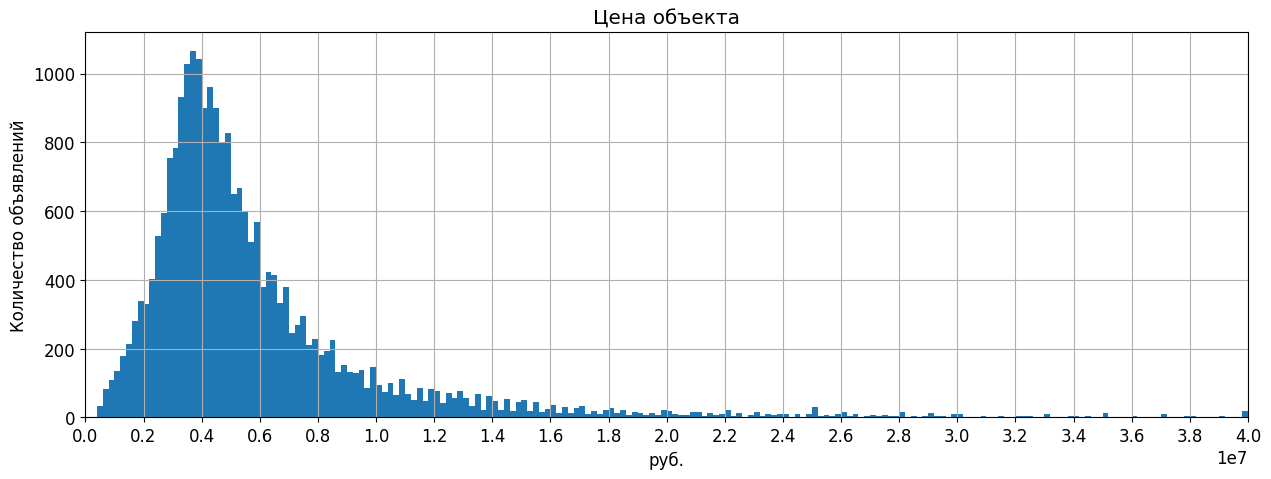

In [78]:
# строим гистограмму
ax = my_hist(data, 'last_price', title='Цена объекта', xlabel='руб.', 
             bins=200, range=(0, 40_000_000))
ax.set_xticks(range(0, 42_000_000, 2_000_000));

Распределение цен похоже на нормальное с отрезанным левым краем (т.к. цена > 0) и имеет довольно гладкий вид с одним выраженным максимумом около 4 000 000, а далее длинный "хвост" из значений, превышающих основную массу. Большинство значений сосредоточено в диапазоне от 1 000 000 до 10 000 000.

По гистограмме видно, что объектов с ценой более 20 000 000 в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

#### Количество комнат

Выведем характеристики распределения значений в этом столбце.

In [79]:
# характеристики распределения значений в столбце
column_stat(data, 'rooms')

count  nan_count  min  mean  median   max
column                                           
rooms   23691          0  0.0  2.07     2.0  19.0

На этапе предварительного изучения данных в столбце `rooms` было обнаружено аномальное значение `0`. Это может быть пропущенным значением, но надо дополнительно разобраться, не помечают ли так квартиры-студии. Также это могут быть квартиры со свободной планировкой, в которых нет внутренних стен. Проверим гипотезу, что все квартиры с аномальным числом комнат `0` являются студиями или имеют свободную планировку, т.е. фактически являются однокомнатными.

In [80]:
# проверяем, что все квартиры с числом комнат 0 являются студиями или со свободной планировкой
(
    data.query("rooms == 0 and (studio == True or open_plan == True)").index
    == data.query("rooms == 0").index
).all()

True

Гипотеза подтвердилась. Поэтому можно заменить значение `0` на `1` в таких строках.

In [81]:
# заменяем 0 на 1 в столбце 'rooms'
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)

Для определения редких значений посчитаем частоту каждого значения.

In [82]:
# уникальные значения в столбце 'rooms' и их количество
data['rooms'].value_counts().sort_index()

1     8239
2     7939
3     5813
4     1179
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [83]:
# считаем количество и долю объектов с количеством комнат более 9
outliers_stat(data['rooms'] > 9)

Количество: 11
Доля: 0.05%


Квартир с количеством комнат более 9 очень мало, поэтому при построении гистограммы исключим их.

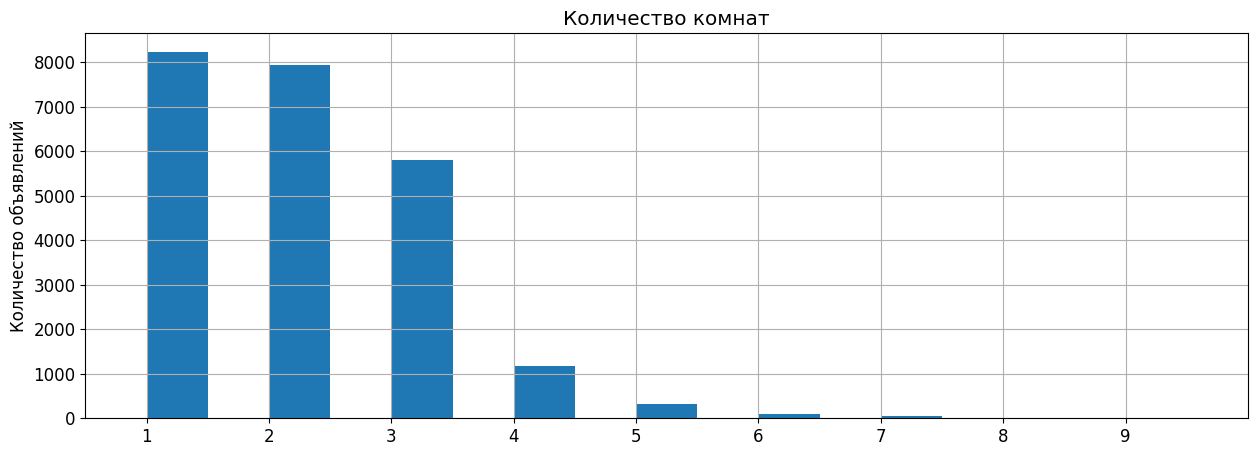

In [84]:
# строим гистограмму
ax = my_hist(data, 'rooms', title='Количество комнат', bins=20, range=(0, 10))
ax.set_xlim(0.5, 10)
ax.set_xticks(range(1, 10, 1));

Распределение похоже на пуассоновское. В выборке преобладают квартиры с количеством комнат от 1 до 3, причём количество квартир убывает с увеличением числа комнат.

По гистограмме видно, что объектов с количеством комнат более 5 в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

#### Высота потолков

Выведем характеристики распределения значений в этом столбце.

In [85]:
# характеристики распределения значений в столбце
column_stat(data, 'ceiling_height')

count  nan_count  min  mean  median    max
column                                                    
ceiling_height  14499       9192  1.0  2.77    2.65  100.0

На этапе предварительного изучения данных в столбце `ceiling_height` были обнаружено наличие аномально малых и аномально больших значений. 

Посмотрим на квартиры с аномально малой высотой потолков менее 2 м.

In [86]:
# объекты с высотой потолка < 2 м
data.query('ceiling_height < 2')

total_images  last_price  total_area first_day_exposition  rooms  \
5712              5     1500000        42.8           2017-08-14      2   
16934             5     4100000        40.0           2017-10-17      1   
22590            16     6000000        55.0           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
5712             1.20           2.0         27.5      1         False   False   
16934            1.75          37.0         17.4      5         False   False   
22590            1.00          12.0         32.4      7         False   False   

       open_plan  kitchen_area  balcony          locality_name  \
5712       False          5.20        0  городской посёлок Мга   
16934      False          8.34        0        Санкт-Петербург   
22590      False         10.00        0        Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
5712                NaN                   NaN               NaN   
16934           18732.0               20444.0               0.0   
22590           33053.0               14217.0               2.0   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
5712             NaN               NaN            NaN            248.0   
16934            NaN               3.0           80.0             71.0   
22590          293.0               2.0          289.0             13.0   

      locality_name_short  price_per_sqm  publication_weekday  \
5712                  Мга       35046.73                    0   
16934     Санкт-Петербург      102500.00                    1   
22590     Санкт-Петербург      109090.91                    2   

       publication_month  publication_year floor_type  city_centers_nearest_km  
5712                   8              2017     первый                      NaN  
16934                 10              2017     другой                     20.0  
22590                 10              2018     другой                     14.0

Такая маленькая высота потолка - это явно результат ошибки продавца при заполнении формы объявления. Например, это может быть опечатка: ввод "1" вместо "2". Однако полной уверенности в этом нет, поэтому эти 3 строки можно из данных исключить.

In [87]:
# удаляем объекты с высотой потолка < 2 м
data.drop(data.query('ceiling_height < 2').index, inplace=True)

Теперь посмотрим на квартиры с самыми высокими потолками.

In [88]:
# первые 5 объектов с наибольшей высотой потолков
data.sort_values('ceiling_height', ascending=False).head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
22869             0    15000000        25.0           2018-07-25      1   
3148             14     2900000        75.0           2018-11-12      3   
22336            19     9999000        92.4           2019-04-05      2   
21377            19     4900000        42.0           2017-04-18      1   
4876              7     3000000        25.0           2017-09-27      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
22869           100.0           5.0         14.0      5          True   False   
3148             32.0           3.0         53.0      2         False   False   
22336            32.0           6.0         55.5      5         False   False   
21377            27.5          24.0         37.7     19         False   False   
4876             27.0          25.0         17.0     17         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22869      False          11.0        5  Санкт-Петербург           34963.0   
3148       False           8.0        0           Волхов               NaN   
22336      False          16.5        4  Санкт-Петербург           18838.0   
21377      False          11.0        2  Санкт-Петербург           42742.0   
4876        True           NaN        2   посёлок Мурино               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
22869                8283.0               1.0          223.0   
3148                    NaN               NaN            NaN   
22336                3506.0               0.0            NaN   
21377                9760.0               0.0            NaN   
4876                    NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
22869               3.0           30.0             19.0     Санкт-Петербург   
3148                NaN            NaN              NaN              Волхов   
22336               3.0          511.0              NaN     Санкт-Петербург   
21377               0.0            NaN             61.0     Санкт-Петербург   
4876                NaN            NaN             28.0              Мурино   

       price_per_sqm  publication_weekday  publication_month  \
22869      600000.00                    2                  7   
3148        38666.67                    0                 11   
22336      108214.29                    4                  4   
21377      116666.67                    1                  4   
4876       120000.00                    2                  9   

       publication_year floor_type  city_centers_nearest_km  
22869              2018  последний                      8.0  
3148               2018     другой                      NaN  
22336              2019     другой                      4.0  
21377              2017     другой                     10.0  
4876               2017     другой                      NaN

Высота потолка 100 м - это явно ошибка. Как её исправить, непонятно. Поэтому этот объект из таблицы исключим. Для изучения остальных аномально больших значений построим диаграмму размаха.

In [89]:
# удаляем строку с аномальным значением высоты потолков более 90 м
data.drop(data.query('ceiling_height > 90').index, inplace=True, errors='ignore')

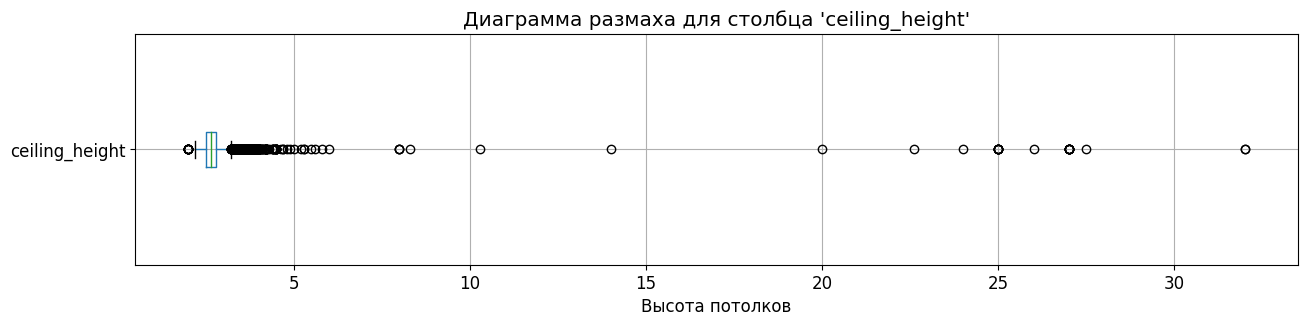

In [90]:
# строим диаграмму размаха
my_boxplot(data, 'ceiling_height', 'Высота потолков')

Значения в диапазоне от 20 до 32 м, скорее всего, возникли в результате ошибки при вводе - пропущен разделитель дробной части. То есть это на самом деле значения от 2,0 до 3,2 м. Исправим их, разделив на 10.

In [91]:
# считаем количество и долю объектов с высотой потолков от 20 до 32 м включительно
outliers_stat(data['ceiling_height'].between(20, 32))

Количество: 22
Доля: 0.09%


In [92]:
# делим на 10 высоту потолков, если она в диапазоне от 20 до 32 м включительно
data.loc[data['ceiling_height'].between(20, 32), 'ceiling_height'] /= 10

Для изучения оставшихся аномально больших значений построим фрагмент гистограммы в диапазоне от 5 до 20 м.

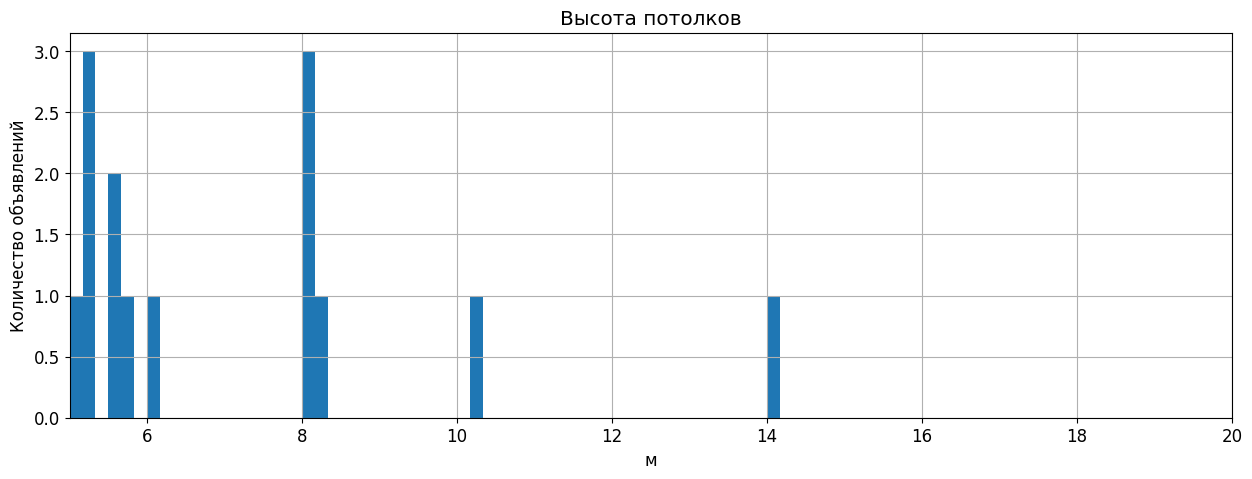

In [93]:
# строим гистограмму
my_hist(data, 'ceiling_height', title='Высота потолков', xlabel='м', bins=90, range=(5, 20));

Осталось ещё несколько объектов с аномально большими значениями. На первом этаже и в пентхаусах на крыше дома высота потолка может быть очень большой. Кроме того, существуют так называемые двухуровневые квартиры. Поэтому значения высоты потолков от 4 до 10 м вполне реальны. 

Но выделяется квартира с  высотой потолков 14 м. Эта аномалия - тоже вероятно следствие ошибки при вводе информации (возможно, "14" получилось вместо "2,4"), и её следует удалить.

In [94]:
# удаляем строку с аномальным значением высоты потолков 14 м
data.drop(data.query('12 < ceiling_height < 15').index, inplace=True, errors='ignore')

Доля квартир с очень высокими потолками должна быть мала. Подсчитаем количество объявлений о продаже квартир с высотой потолков более 4 м.

In [95]:
# считаем количество и долю объектов с высотой потолков более 4 м
outliers_stat(data['ceiling_height'] > 4)

Количество: 51
Доля: 0.22%


Квартир с низкими пололками менее 2,5 м тоже должно быть мало (это минимальная высота потолка в жилых помещениях по СНиП). Отступим от этого значения вниз на 0,1 м для учёта случаев, когда в квартире с высотой потолков 2,5 м ещё сделаны дополнительно натяжные потолки. Подсчитаем долю квартир с высотой потольков менее 2,4 м.

In [96]:
# считаем количество и долю объектов с высотой потолков < 2.4 м
outliers_stat(data['ceiling_height'] < 2.4)

Количество: 20
Доля: 0.08%


Действительно, таких квартир очень мало. Построим гистограмму распределения значений в этом столбце без редких очень больших и очень малых значений.

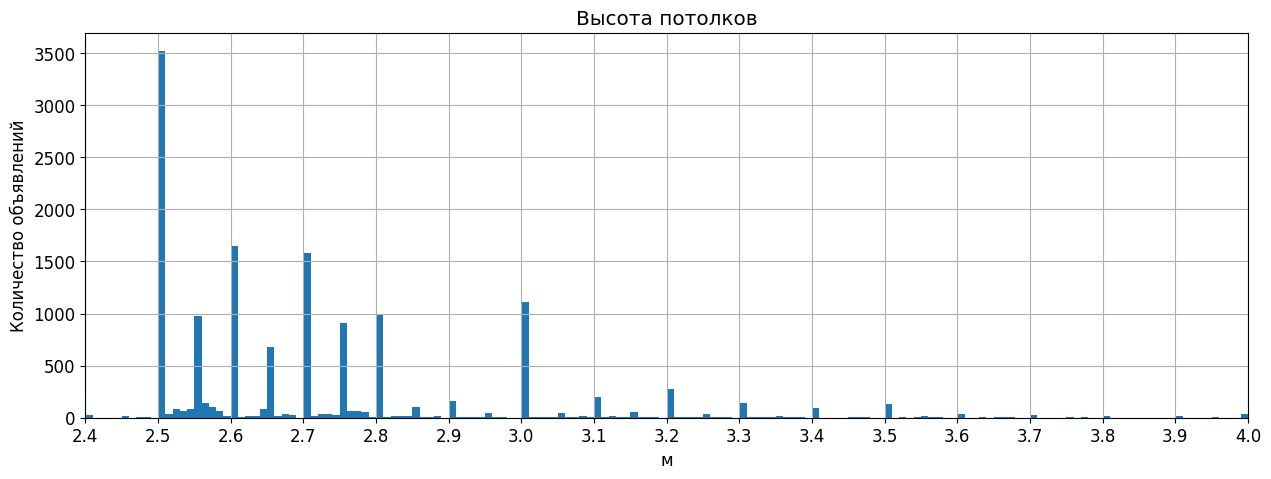

In [97]:
# строим гистограмму
ax = my_hist(data, 'ceiling_height', title='Высота потолков', xlabel='м', bins=160, range=(2.4, 4))
ax.set_xticks(np.arange(2.4, 4.1, 0.1));

Чаще всего встречается высота потолков 2,5 м, далее по мере роста значений количество объектов имеет тенденцию к уменьшению. Но на распределении присутствуют отдельные пики с шагом 5 и 10 см - видимо, стандартный ряд значений в архитектурных проектах. Основная масса значений сосредоточена в диапазоне от 2,5 до 2,8 м, но выделяется также пик у значения 3,0 м.

По гистограмме видно, что объектов с высотой потолков более 3,5 м в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

После удаления аномалий можно попытаться заполнить пропуски в столбце `ceiling_height` характерным значением - медианой.

In [98]:
data['ceiling_height'].median()

2.65

In [99]:
# считаем количество и долю объектов пропущенной высотой потолков
outliers_stat(data['ceiling_height'].isna())

Количество: 9192
Доля: 38.81%


Однако доля пропусков в столбце очень велика, из-за чего заполнение пропусков одним значением существенно исказит распределение. Поэтому лучше сохранить пропуски.

#### Тип этажа квартиры

Столбец `floor_type` содержит категориальные значения: "первый", "последний" или "другой". Также в столбце имеются пропуски - значения `None`. Пропуски возникли из-за того, что не для всех объектов известно общее число этажей в доме, поэтому невозможно определить, последний это этаж или нет.

Построим гистограмму распределения объектов по типу этажа.

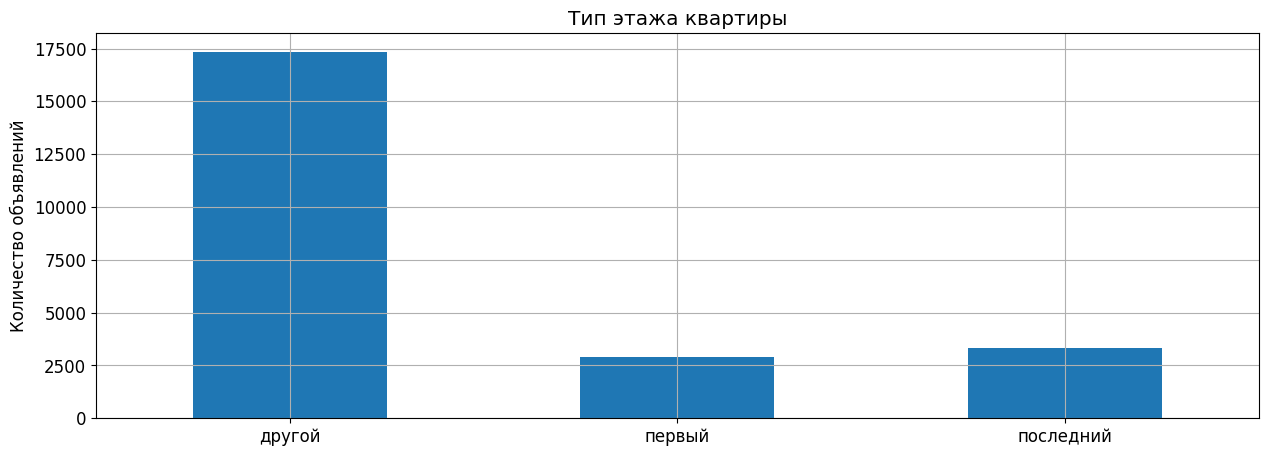

In [100]:
# строим гистограмму с помощью value_counts() и plot.bar()
my_hist(data, 'floor_type', kind='bar', title='Тип этажа квартиры');

Как и ожидалось, квартир на промежуточных этажах значительно больше. Число квартир на первом этаже невелико и даже меньше числа квартир на последнем этаже. Это означает, что в выборке в основном содержатся объявления о продаже квартир в многоэтажных домах.

#### Общее количество этажей в доме

Выведем характеристики распределения значений в этом столбце.

In [101]:
# характеристики распределения значений в столбце
column_stat(data, 'floors_total')

count  nan_count  min   mean  median   max
column                                                  
floors_total  23600         86  1.0  10.67     9.0  60.0

Из-за наличия пропущенных значений тип данных в столбце нельзя изменить на целочисленный. Но пропусков очень мало, поэтому их можно удалить и изменить тип данных в столбце.

In [102]:
# удаляем строки с пропусками в столбце 'floors_total'
data.dropna(subset=['floors_total'], inplace=True)
# изменяем тип данных в столбце 'floors_total' на int
data['floors_total'] = data['floors_total'].astype(int)

Для определения редких значений в столбце `floors_total` посчитаем частоту каждого значения.

In [103]:
# уникальные значения в столбце 'rooms' и их количество
data['floors_total'].value_counts().sort_index()

1       25
2      382
3      668
4     1200
5     5786
6      913
7      592
8      389
9     3760
10    1174
11     203
12    1361
13     229
14     552
15     365
16    1376
17     832
18     505
19     339
20     271
21     158
22     285
23     352
24     468
25    1074
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
52       1
60       1
Name: floors_total, dtype: int64

Значения 52 и 60 выбиваются из ряда, поэтому при построении гистограммы исключим их.

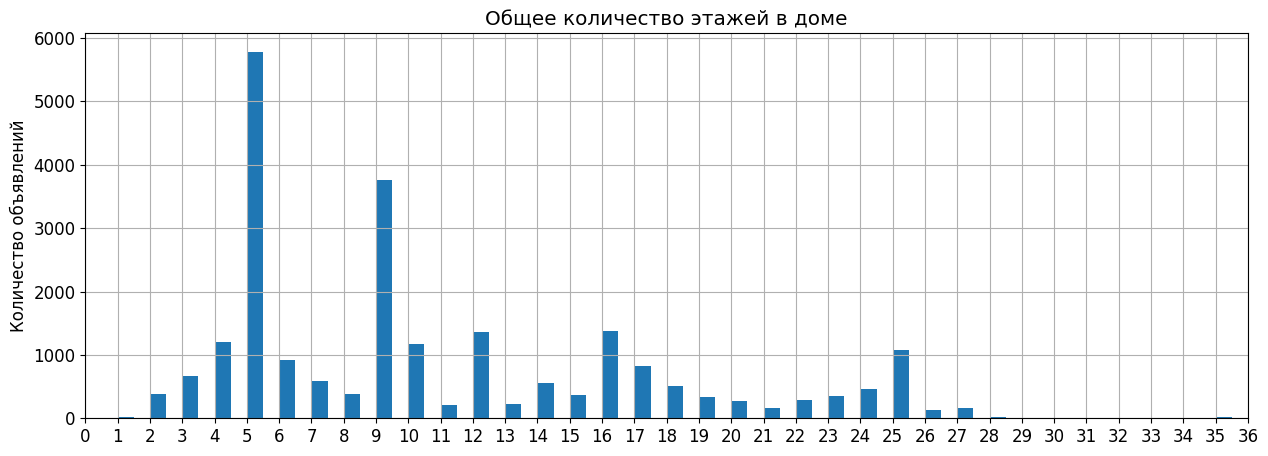

In [104]:
# строим гистограмму
ax = my_hist(data, 'floors_total', title='Общее количество этажей в доме', bins=70, range=(1, 36))
ax.set_xticks(range(0, 37, 1));

В распределении заметны пики на значениях 5 и 9 этажей. Это означает, что дома с такой этажностью наиболее часто встречаются в застройке Санкт-Петербурга. Также много (> 1000) домов с 4, 10, 12, 16 и 25 этажами. Объектов в 35-этажных домах оказалось неожиданно больше, чем в одноэтажных.

По гистограмме видно, что объектов домах с числом этажей менее 2 и более 27 очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

Также нужно убедиться, что этаж, на котором находится квартира, не превышает числа этажей в доме.

In [105]:
# проверяем, есть ли квартиры, у которых этаж больше числа этажей в доме
(data['floor'] > data['floors_total']).any()

False

Таких не оказалось, как и должно быть.

#### Расстояние до центра города в метрах

Выведем характеристики распределения значений в этом столбце.

In [106]:
# характеристики распределения значений в столбце
column_stat(data, 'city_centers_nearest')

count  nan_count    min      mean   median      max
column                                                                   
city_centers_nearest  18093       5507  181.0  14187.05  13094.0  65968.0

В столбце `city_centers_nearest` тоже имеются пропуски, и их доля достаточно велика.

In [107]:
# считаем количество и долю пропущенных значений в столбце 'city_centers_nearest'
outliers_stat(data['city_centers_nearest'].isna())

Количество: 5507
Доля: 23.33%


Для определения редких и выбивающихся значений построим диаграмму размаха.

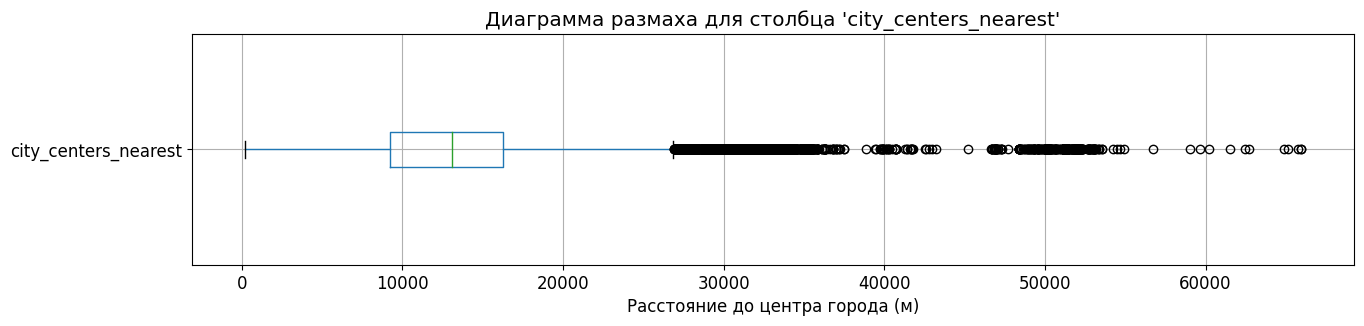

In [108]:
# строим диаграмму размаха
my_boxplot(data, 'city_centers_nearest', 'Расстояние до центра города (м)')

Диаграмма показывает наличие выбросов, но их довольно много и они сгруппированы. Поэтому построим гистограмму распределения значений в этом столбце во всём диапазоне значений, чтобы одна корзина соответствовала 500 м. 

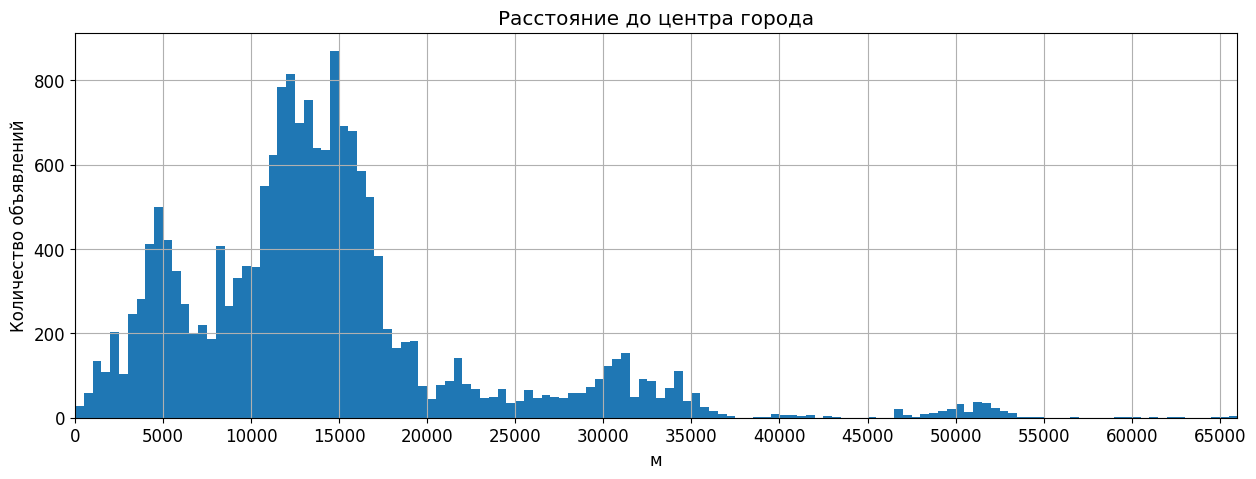

In [109]:
# строим гистограмму
ax = my_hist(data, 'city_centers_nearest', title='Расстояние до центра города', xlabel='м', 
             bins=132,  range=(0, 66000))
ax.set_xticks(range(0, 67000, 5000));

Распределение похоже на сумму нескольких составляющих - нормальных распределений с различными центрами. Можно предположить, что каждая из этих составляющих соответствует району города или пригородам, где сосредоточена жилая застройка. 

Большинство объектов находятся на расстоянии до 20 км от центра. Максимум вблизи 5 км от центра, вероятно, соответствует домам в центре города, а широкий максимум  от 8 до 18 км - основным жилым микрорайонам города. Максимум вблизи 30 км соответствует ближайшим пригородам, а около 50 км - дальним пригородам и городам-спутникам.

По гистограмме видно, что объектов на расстоянии более 55 км от центра города в выборке очень мало. 

Редкие объекты с аномально большими и малыми значениями параметров могут повлиять на результаты анализа данных. Поэтому их следует по завершении исследования параметров исключить из данных.

#### Расстояние до ближайшего парка

Выведем характеристики распределения значений в этом столбце.

In [110]:
# характеристики распределения значений в столбце
column_stat(data, 'parks_nearest')

count  nan_count  min    mean  median     max
column                                                      
parks_nearest   8038      15562  1.0  490.55   455.0  3190.0

В столбце `parks_nearest` тоже имеются пропуски, и их доля велика.

In [111]:
# считаем количество и долю пропущенных значений в столбце 'parks_nearest'
outliers_stat(data['parks_nearest'].isna())

Количество: 15562
Доля: 65.94%


Для определения редких и выбивающихся значений построим диаграмму размаха.

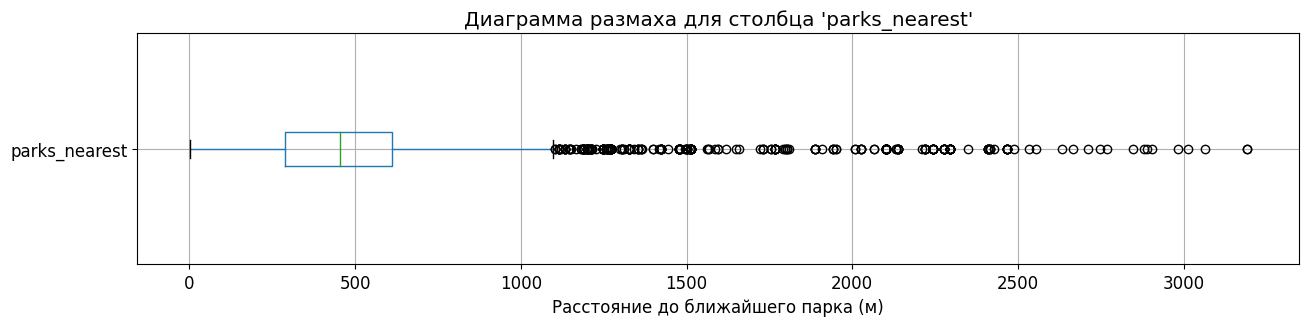

In [112]:
# строим диаграмму размаха
my_boxplot(data, 'parks_nearest', 'Расстояние до ближайшего парка (м)')

Диаграмма показывает наличие выбросов, но они отстоят не так далеко от основной массы значений. Поэтому построим гистограмму распределения значений в этом столбце во всём диапазоне значений, чтобы одна корзина соответствовала 50 м.

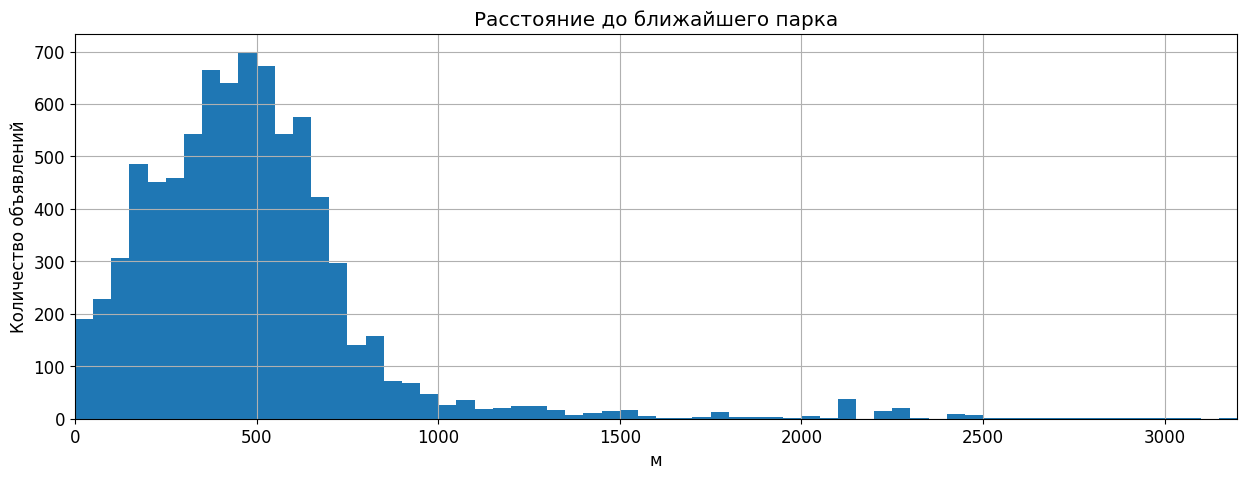

In [113]:
# строим гистограмму
my_hist(data, 'parks_nearest', title='Расстояние до ближайшего парка', xlabel='м', 
        bins=64, range=(0, 3200));

Распределение напоминает пуассоновское, имеет максимум около 400-500 м и длинный "хвост". Большинство значений сосредоточены в диапазоне менее 1 км. Однако учитывая, что данные о расстоянии до ближайшего парка есть только для 1/3 всех объектов, обобщать эти характеристики на всю выборку нельзя.

#### Прочие параметры

**Этаж**

In [114]:
# характеристики распределения значений в столбце
column_stat(data, 'floor')

count  nan_count  min  mean  median   max
column                                           
floor   23600          0  1.0  5.88     4.0  33.0

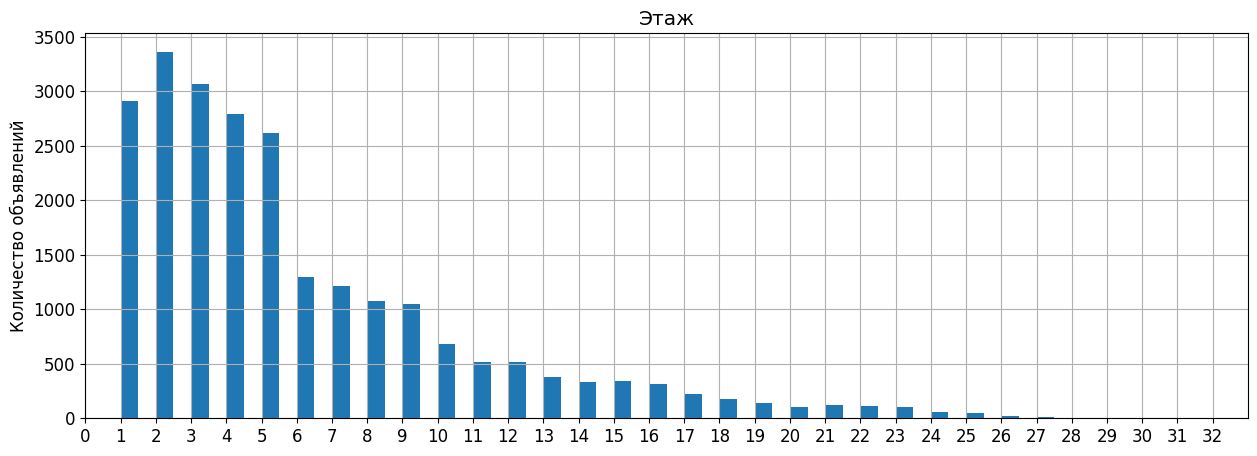

In [115]:
# строим гистограмму
ax = my_hist(data, 'floor', title='Этаж', bins=66, range=(0, 33))
ax.set_xticks(range(0, 33, 1));

Больше всего квартир на 1-5 этажах.

**Количество балконов**

In [116]:
# характеристики распределения значений в столбце
column_stat(data, 'balcony')

count  nan_count  min  mean  median  max
column                                           
balcony  23600          0  0.0  0.59     0.0  5.0

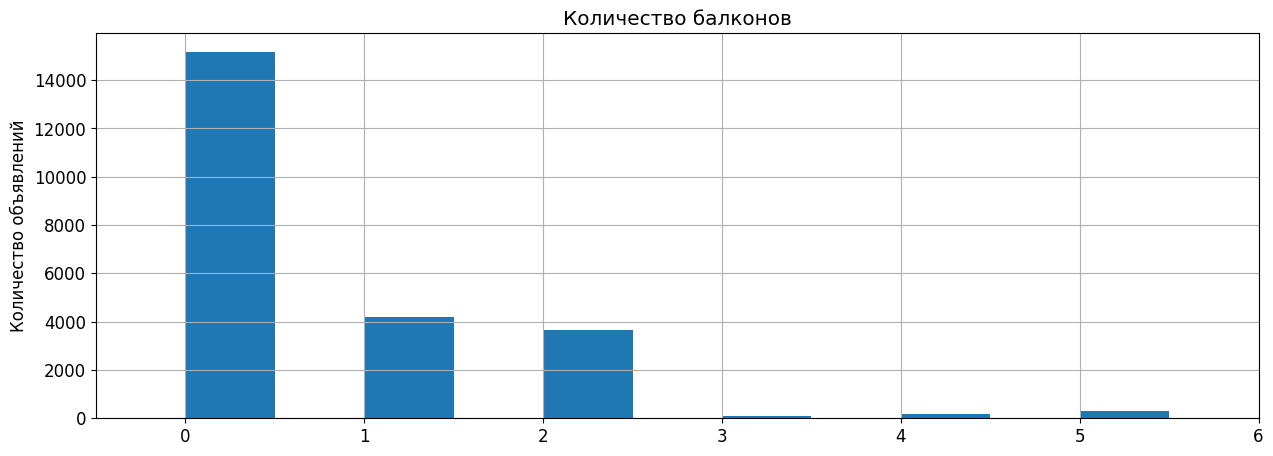

In [117]:
# строим гистограмму
ax = my_hist(data, 'balcony', title='Количество балконов', bins=12, range=(0, 6))
ax.set_xlim(-0.5, 6)
ax.set_xticks(range(7));

Квартиры больше чем с 2 балконами - большая редкость.

**Расстояние до ближайшего аэропорта**

In [118]:
# характеристики распределения значений в столбце
column_stat(data, 'airports_nearest')

count  nan_count  min      mean   median      max
column                                                             
airports_nearest  18070       5530  0.0  28790.03  26726.0  84869.0

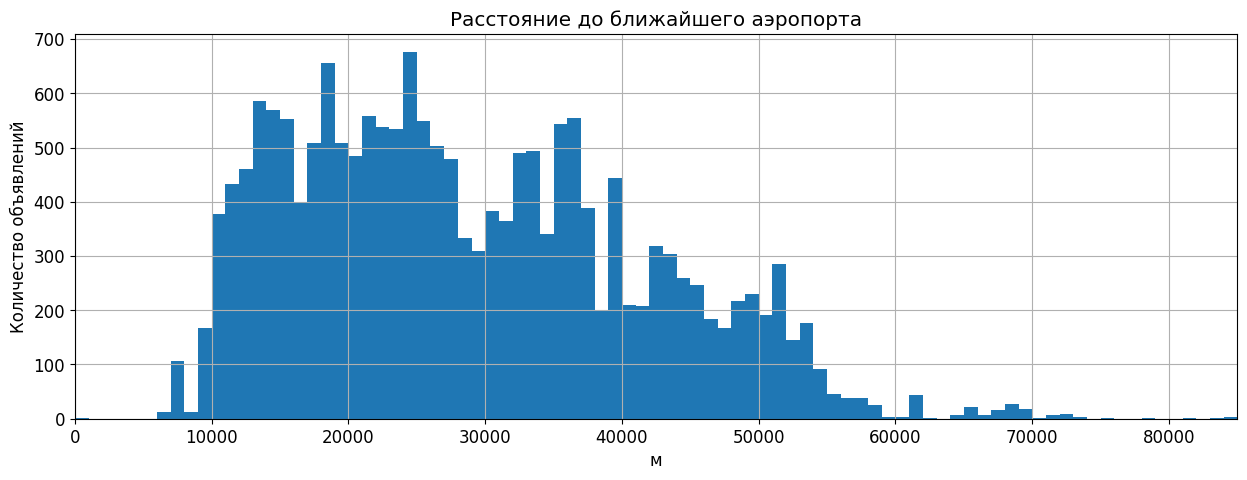

In [119]:
# строим гистограмму
my_hist(data, 'airports_nearest', title='Расстояние до ближайшего аэропорта', xlabel='м', 
             bins=85, range=(0, 85000));

In [120]:
# 5 объектов, ближайших к аэропорту
data.sort_values('airports_nearest').head()

total_images  last_price  total_area first_day_exposition  rooms  \
21085             0     7000000        34.7           2018-09-23      1   
12899             8     4199000        56.0           2017-12-21      2   
4017              7     2268000        35.0           2017-12-21      1   
7778              9     2750000        29.0           2017-02-19      1   
23150             3     6490000        62.5           2015-03-18      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
21085             2.7             9         19.8      3         False   False   
12899             NaN             9         27.0      5         False   False   
4017              NaN             9         14.0      6         False   False   
7778              2.5             4         15.0      1         False   False   
23150             NaN            24         33.5     15         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0        2  Санкт-Петербург               0.0   
12899      False          15.0        0  Санкт-Петербург            6450.0   
4017       False           8.0        0  Санкт-Петербург            6450.0   
7778       False           6.0        0  Санкт-Петербург            6914.0   
23150      False           9.0        4  Санкт-Петербург            6949.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
21085               22801.0               0.0            NaN   
12899               17461.0               0.0            NaN   
4017                17461.0               0.0            NaN   
7778                21486.0               1.0          215.0   
23150               13165.0               1.0          711.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
21085               0.0            NaN             60.0     Санкт-Петербург   
12899               1.0          444.0             24.0     Санкт-Петербург   
4017                1.0          444.0             25.0     Санкт-Петербург   
7778                0.0            NaN             43.0     Санкт-Петербург   
23150               0.0            NaN            917.0     Санкт-Петербург   

       price_per_sqm  publication_weekday  publication_month  \
21085      201729.11                    6                  9   
12899       74982.14                    3                 12   
4017        64800.00                    3                 12   
7778        94827.59                    6                  2   
23150      103840.00                    2                  3   

       publication_year floor_type  city_centers_nearest_km  
21085              2018     другой                     23.0  
12899              2017     другой                     17.0  
4017               2017     другой                     17.0  
7778               2017     первый                     21.0  
23150              2015     другой                     13.0

Обнаружен объект с аномальным расстоянием до ближайшего аэропорта 0 м. Это можно считать пропуском, поэтому заменим `0` на `NaN`.

In [121]:
# заменяем 0 на NaN
data['airports_nearest'] = data['airports_nearest'].replace(0, np.nan)

**Расстояние до ближайшего водоёма**

In [122]:
# характеристики распределения значений в столбце
column_stat(data, 'ponds_nearest')

count  nan_count   min    mean  median     max
column                                                       
ponds_nearest   9055      14545  13.0  518.31   503.0  1344.0

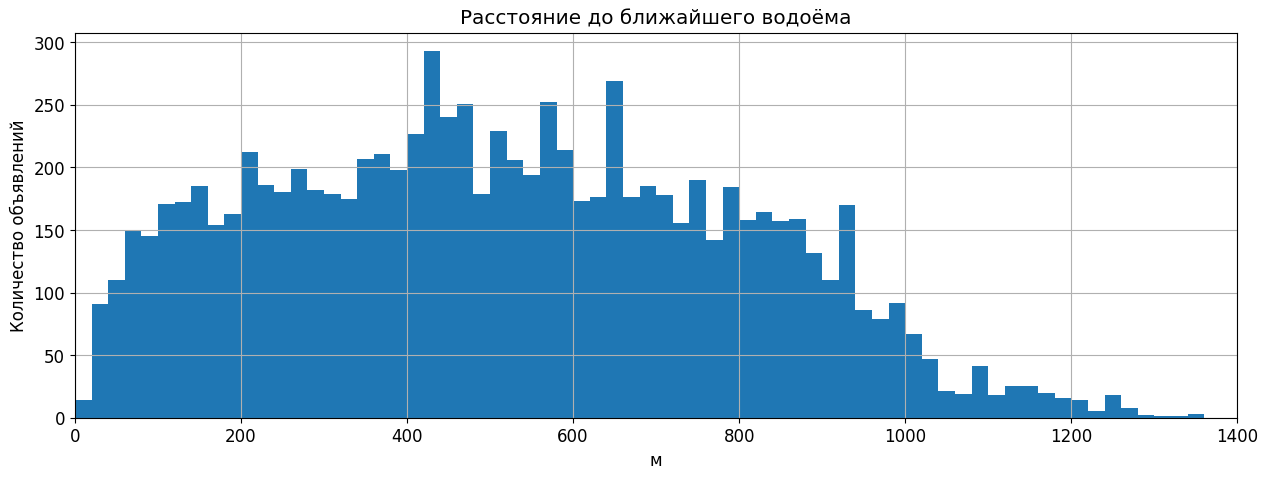

In [123]:
# строим гистограмму
my_hist(data, 'ponds_nearest', title='Расстояние до ближайшего водоёма', xlabel='м', 
        bins=70, range=(0, 1400));

В данных очень много пропусков в этом столбце, поэтому обобщать на всю выборку нельзя.

#### Удаление редких значений параметров

Отфильтруем выборку, удалив из неё объекты с редкими значениями ключевых параметров: общей площади, жилой площади, площади кухни, цены, количества комнат, высоты потолков, этажа, числа этажей в доме.

Для определения того, какие значения считать редкими, используем квантили распределения. 

По общему правилу, уровень потерь в выборке при фильтрации не должен превышать 10 %. Оптимальным при фильтрации считается суммарный уровень потерь около 5 %. 

In [124]:
# список ключевых параметров объекта недвижимости
columns = ['total_area',  'living_area', 'kitchen_area', 'last_price', 
          'rooms', 'ceiling_height', 'floor', 'floors_total']

In [125]:
# характеристики распределения значений в столбцах
column_stat(data, columns)

count  nan_count       min        mean      median  \
column                                                               
total_area      23600          0      12.0       60.35       52.00   
living_area     21730       1870       8.0       34.48       30.00   
kitchen_area    21371       2229       1.3       10.56        9.10   
last_price      23600          0  430000.0  6539295.55  4650000.00   
rooms           23600          0       1.0        2.08        2.00   
ceiling_height  14485       9115       2.0        2.73        2.65   
floor           23600          0       1.0        5.88        4.00   
floors_total    23600          0       1.0       10.67        9.00   

                        max  
column                       
total_area            900.0  
living_area           409.7  
kitchen_area          112.0  
last_price      763000000.0  
rooms                  19.0  
ceiling_height         10.3  
floor                  33.0  
floors_total           60.0

Для каждого из ключевых параметров отфильтруем по 0,5 % объектов с самыми малыми и самыми большими значениями данного параметра. Это условие соответствует тому, что в выборке остаются объекты со значениями, лежащими между 0,005 и 0,995 квантилями.

При фильтрации учтём наличие пропусков в некоторых столбцах: значения с пропусками остаются в отфильтрованной выборке.

In [126]:
# Значения параметров объектов недвижимости на разных квантилях
(data[columns]
    .quantile([0.005, 0.995]) # выбираем размах в 0,99 квантилей 
    .style.format("{:,.2f}")
)

Произведём фильтрацию данных с помощью функции `filter_by_quantile()`, которая формирует условие фильтрации и делает срез данных по этому условию.

In [127]:
def filter_by_quantile(data, columns, q_low, q_high):
    """
    Фильтрует выборку по значениям квантилей для указанных столбцов.
    """
    # пустой список условий
    queries = []
    # в цикле формируем условия фильтрации по каждому столбцу
    for column in columns:
        low = data[column].quantile(q_low).round(2)
        high = data[column].quantile(q_high).round(2)
        if data[column].isna().any():
            query = column + '.isna() or '
        else:
            query = ''
        query = '(' + query + str(low) + ' <= ' + column + ' <= ' + str(high) + ')'
        queries.append(query)
    # формируем общее условие фильтрации   
    full_query = ' and '.join(queries)
    print('Условие фильтрации:\n', full_query)
    
    # фильтруем данные
    filtered_data = data.query(full_query)
    
    # статистика потерь в результате фильтрации
    print('Количество потерь:', len(data) - len(filtered_data))
    print(f'Доля потерь: {(1 - len(filtered_data)/len(data)):.2%}\n')
    
    return filtered_data

Сначала оценим уровень потерь при фильтрации по каждому параметру в отдельности.

In [128]:
for column in columns:
    filter_by_quantile(data, [column], 0.005, 0.995);

Условие фильтрации:
 (23.6 <= total_area <= 248.7)
Количество потерь: 236
Доля потерь: 1.00%

Условие фильтрации:
 (living_area.isna() or 11.5 <= living_area <= 154.25)
Количество потерь: 215
Доля потерь: 0.91%

Условие фильтрации:
 (kitchen_area.isna() or 5.0 <= kitchen_area <= 42.4)
Количество потерь: 210
Доля потерь: 0.89%

Условие фильтрации:
 (800000.0 <= last_price <= 54005000.0)
Количество потерь: 232
Доля потерь: 0.98%

Условие фильтрации:
 (1.0 <= rooms <= 6.0)
Количество потерь: 90
Доля потерь: 0.38%

Условие фильтрации:
 (ceiling_height.isna() or 2.49 <= ceiling_height <= 4.0)
Количество потерь: 123
Доля потерь: 0.52%

Условие фильтрации:
 (1.0 <= floor <= 24.0)
Количество потерь: 86
Доля потерь: 0.36%

Условие фильтрации:
 (2.0 <= floors_total <= 27.0)
Количество потерь: 78
Доля потерь: 0.33%



Доля потерь при фильтрации по каждому отдельному параметру не превышает 1 %. Теперь отфильтруем данные по всем ключевым параметрам одновременно и оценим общий уровень потерь.

In [129]:
# фильтруем выборку по квантилям
data = filter_by_quantile(data, columns, 0.005, 0.995)

Условие фильтрации:
 (23.6 <= total_area <= 248.7) and (living_area.isna() or 11.5 <= living_area <= 154.25) and (kitchen_area.isna() or 5.0 <= kitchen_area <= 42.4) and (800000.0 <= last_price <= 54005000.0) and (1.0 <= rooms <= 6.0) and (ceiling_height.isna() or 2.49 <= ceiling_height <= 4.0) and (1.0 <= floor <= 24.0) and (2.0 <= floors_total <= 27.0)
Количество потерь: 979
Доля потерь: 4.15%



Общий уровень потерь составил чуть более 4 %, что близко к оптимальному.

Дальнейший анализ будем проводить по отфильтрованным данным.

В заключение выведем числовые характеристики распределения и построим гистограммы для отфильтрованных данных.

In [130]:
# характеристики распределения значений в столбцах
column_stat(data, columns)

count  nan_count        min        mean      median  \
column                                                                
total_area      22621          0      23.60       58.44       52.00   
living_area     20852       1769      11.50       33.47       30.00   
kitchen_area    20578       2043       5.00       10.25        9.00   
last_price      22621          0  800000.00  5916256.40  4650000.00   
rooms           22621          0       1.00        2.05        2.00   
ceiling_height  13896       8725       2.49        2.72        2.65   
floor           22621          0       1.00        5.82        4.00   
floors_total    22621          0       2.00       10.67        9.00   

                       max  
column                      
total_area           244.0  
living_area          154.0  
kitchen_area          42.4  
last_price      54000000.0  
rooms                  6.0  
ceiling_height         4.0  
floor                 24.0  
floors_total          27.0

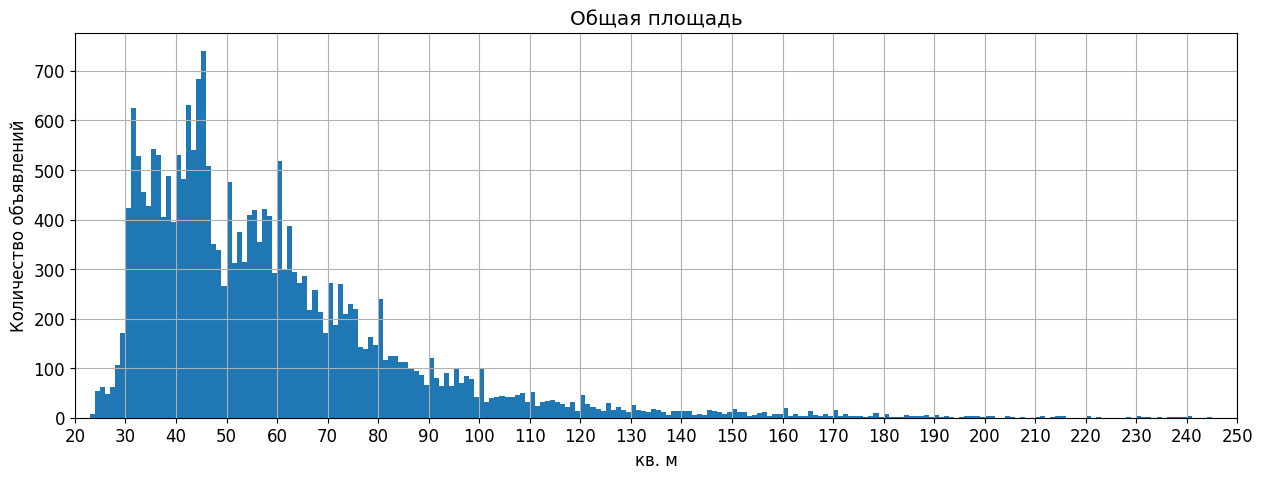

In [131]:
# строим гистограмму
ax = my_hist(data, 'total_area', title= 'Общая площадь', xlabel='кв. м', bins=230, range=(20, 250))
ax.set_xticks(range(20, 260, 10));

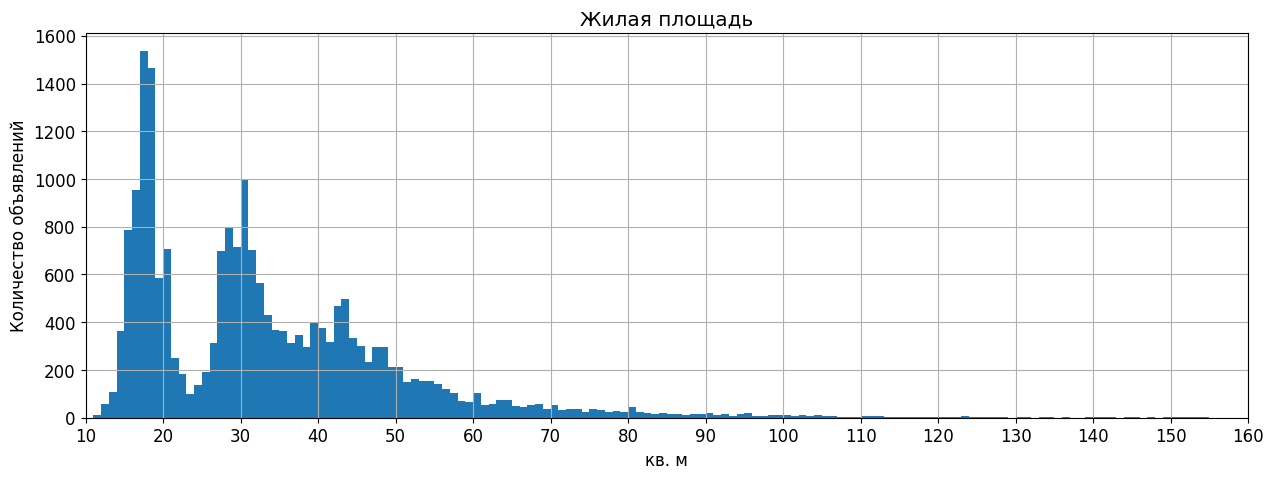

In [132]:
# строим гистограмму
ax = my_hist(data, 'living_area', title='Жилая площадь', xlabel='кв. м', bins=150, range=(10, 160))
ax.set_xticks(range(10, 170, 10));

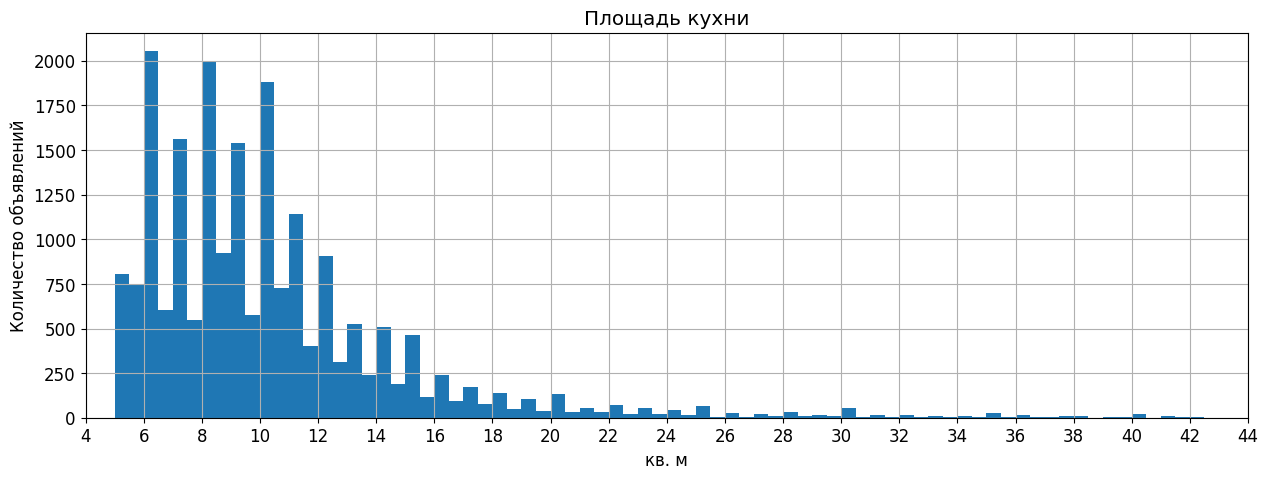

In [133]:
# строим гистограмму
ax = my_hist(data, 'kitchen_area', title='Площадь кухни', xlabel='кв. м', bins=80, range=(4, 44))
ax.set_xticks(range(4, 45, 2));

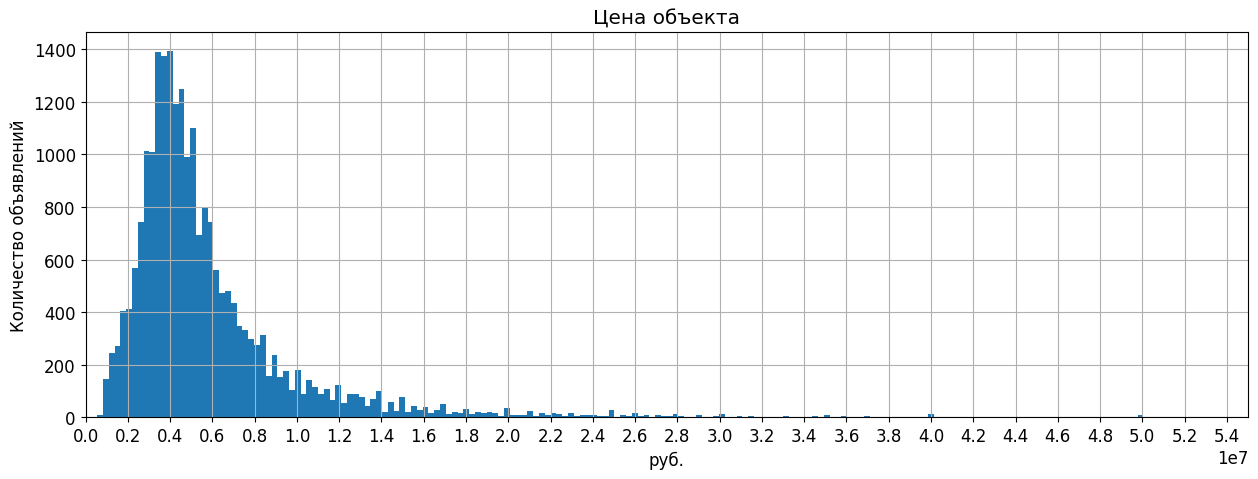

In [134]:
# строим гистограмму
ax = my_hist(data, 'last_price', title='Цена объекта', xlabel='руб.', 
             bins=200, range=(0, 55_000_000))
ax.set_xticks(range(0, 56_000_000, 2_000_000));

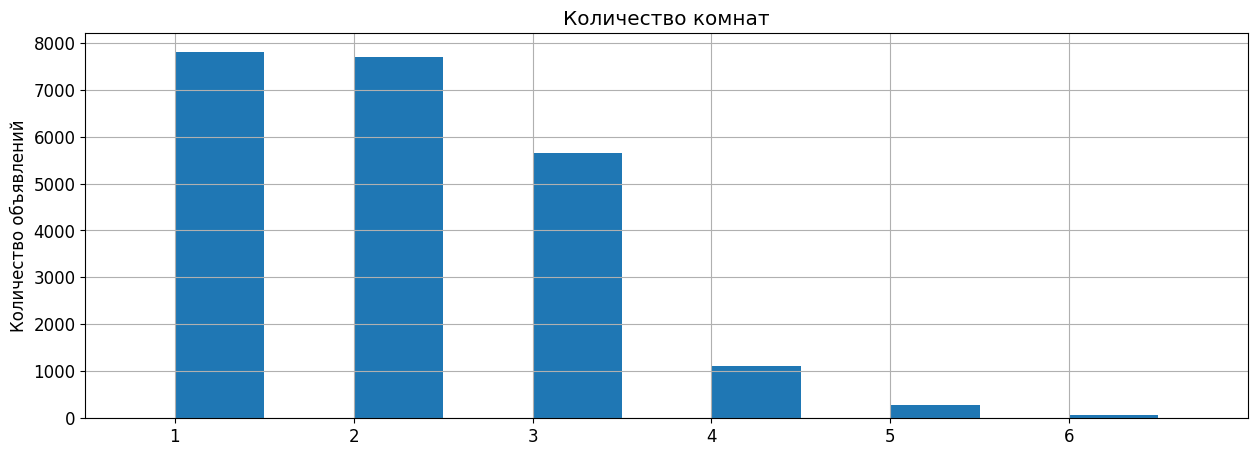

In [135]:
# строим гистограмму
ax = my_hist(data, 'rooms', title='Количество комнат', bins=14, range=(0, 7))
ax.set_xlim(0.5, 7)
ax.set_xticks(range(1, 7));

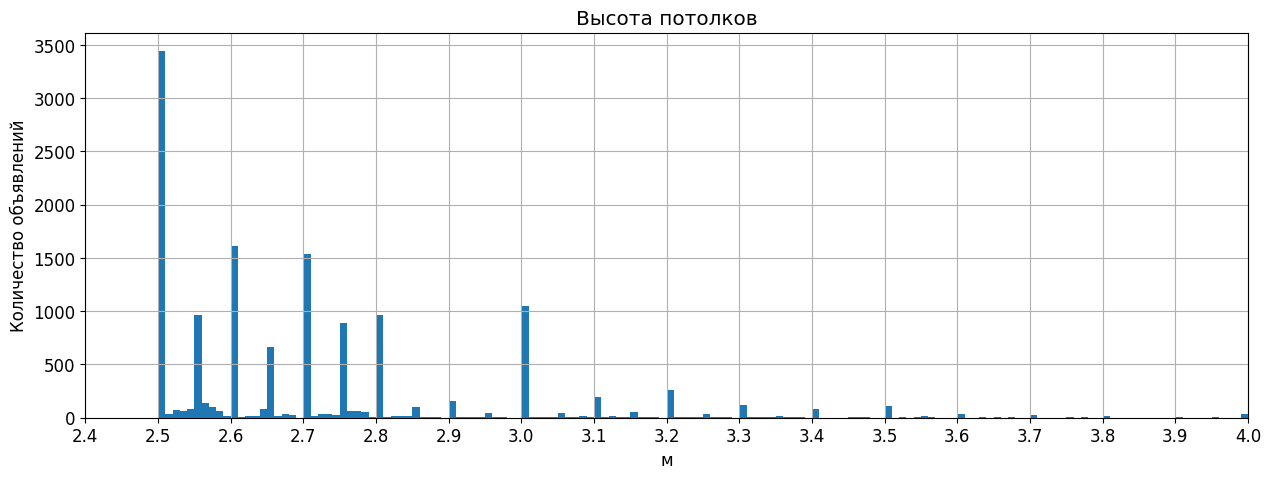

In [136]:
# строим гистограмму
ax = my_hist(data, 'ceiling_height', title='Высота потолков', xlabel='м', bins=160, range=(2.4, 4))
ax.set_xticks(np.arange(2.4, 4.1, 0.1));

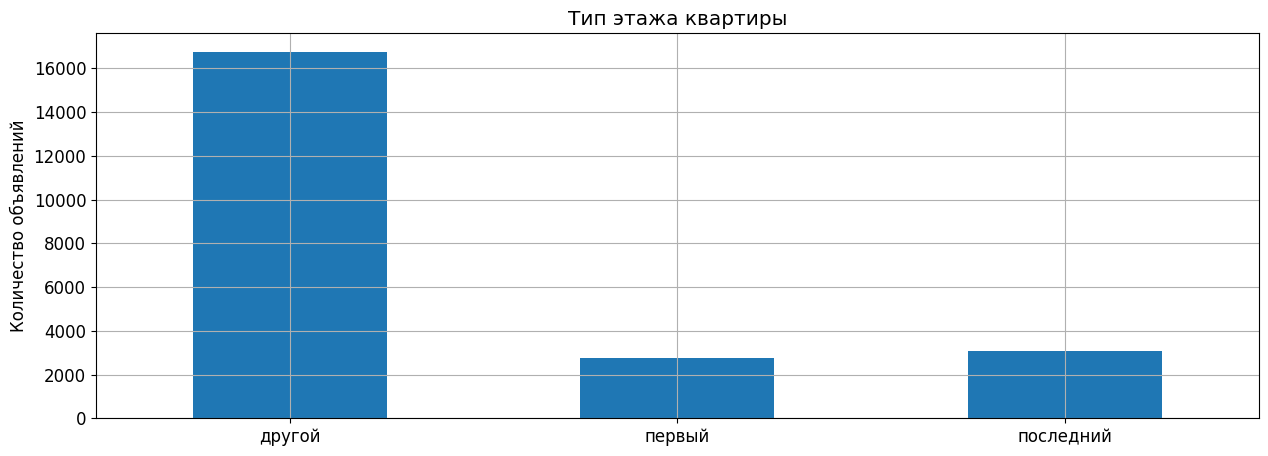

In [137]:
# строим гистограмму с помощью value_counts() и plot.bar()
my_hist(data, 'floor_type', kind='bar', title='Тип этажа квартиры');

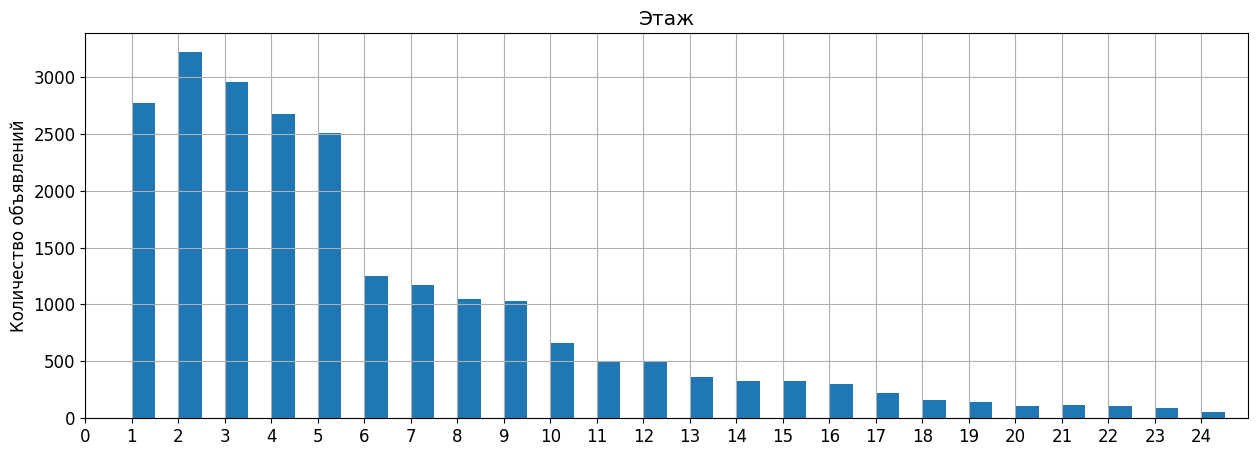

In [138]:
# строим гистограмму
ax = my_hist(data, 'floor', title='Этаж', bins=50, range=(0, 25))
ax.set_xticks(range(0, 25, 1));

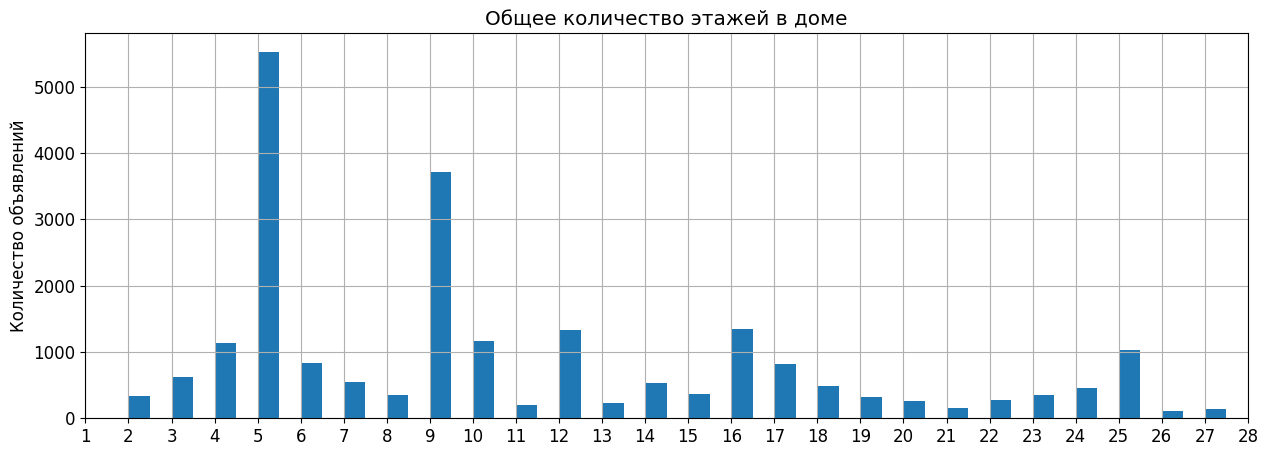

In [139]:
# строим гистограмму
ax = my_hist(data, 'floors_total', title='Общее количество этажей в доме', bins=54, range=(1, 28))
ax.set_xticks(range(1, 29, 1));

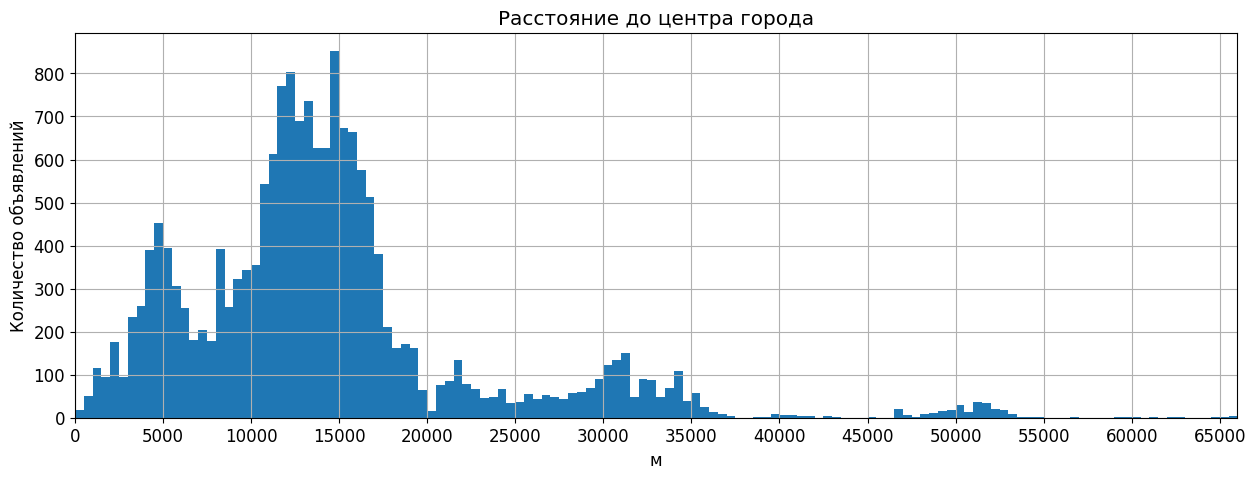

In [140]:
# строим гистограмму
ax = my_hist(data, 'city_centers_nearest', title='Расстояние до центра города', xlabel='м', 
             bins=132,  range=(0, 66000))
ax.set_xticks(range(0, 67000, 5000));

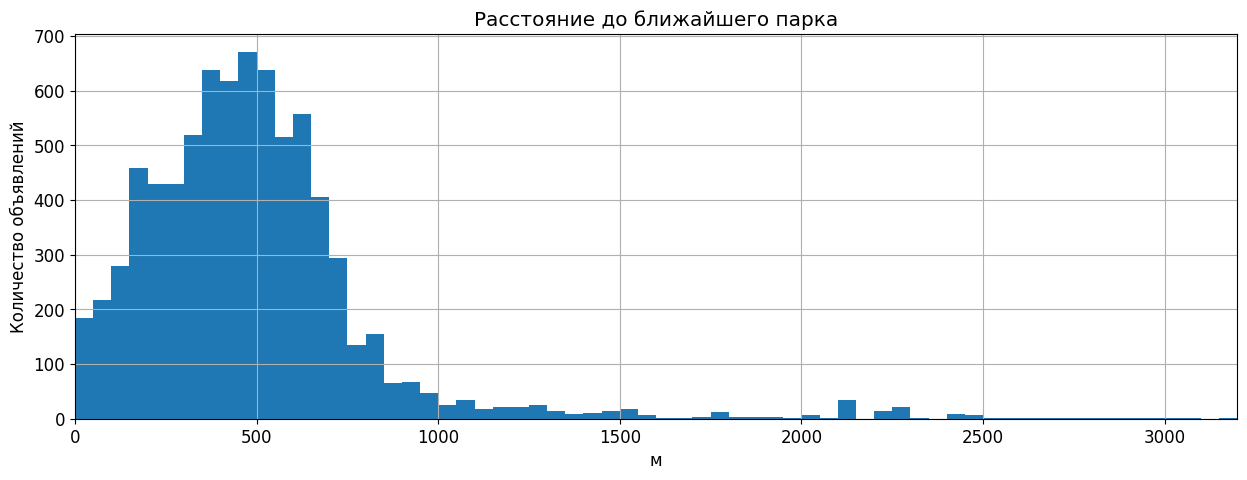

In [141]:
# строим гистограмму
my_hist(data, 'parks_nearest', title='Расстояние до ближайшего парка', xlabel='м', 
        bins=64, range=(0, 3200));

#### Выводы

В результате проведённого исследования параметров объектов недвижимости:

1. Выявлены и по возможности исправлены ошибки в данных:
    - Удалены объекты с аномально малыми значениями жилой площади менее 7 кв.м (8 объектов). Вероятно, продавец по ошибке ввёл вместо жилой площади площадь санузла. Другое возможное объяснение - перепутаны значения жилой площади и площади кухни.
    - Исправлена аномально низкая цена одного объекта, которая может быть объяснена тем, что продавец указал цену в тысячах. Поэтому цена, а заодно и цена за один кв.м., были умножены на 1000.
    - Установлено, что аномальное значение `0` количества комнат встречается только у квартир-студий или квартир со свободной планировкой. Такие квартиры фактически являются однокомнатными, поэтому значение `0` заменено на `1`.
    - Удалены объекты с аномально малыми значениями высота потолков менее 2 м (3 объекта). Также удалены объекты с аномально большими значениями высота потолков 14 м и 100 м (2 объекта). 
    - Исправлены некорректные значения высота потолков в диапазоне от 20 до 32 м (22 объекта). Скорее всего, они возникли в результате ошибки при вводе - был пропущен разделитель дробной части. То есть это на самом деле значения от 2,0 до 3,2 м.
    - Неявный пропуск в значении расстояния до ближайшего аэропорта (аномальное значение `0`) заменён на явный - значение `NaN`.


2. Данные очищены от редких и выбивающихся значений ключевых параметров объекта недвижимости (общей площади, жилой площади, площади кухни, цены, количества комнат, высоты потолков, этажа, числа этажей в доме) путём фильтрации по значениям квантилей распределения 0,005 и 0,995: для каждого параметра отброшены 0,5 % объектов с самыми малыми и 0,5 % объектов с самыми большими значениями данного параметра. Общий уровень потерь данных в результате фильтрации составил 4,15 %, что близко к оптимальному уровню.


3. В результате изучения гистограмм распределения количества объектов по значениям выбранных параметров были установлены следующие факты:
    - Большинство объектов имеют общую площадь в диапазоне от 25 до 100 кв.м. Отдельные резкие пики на распределении, вероятно, соответствуют распространённым типовым планировкам.
    - Распределение жилой площади имеет несколько узких пиков, которые, вероятно, соответствуют количеству комнат в квартире: 1, 2, 3.
    - Распределение площади кухни также имеет резкие пики на вершине, вероятно, соответствующие типовым планировкам. Большинство значений сосредоточено в диапазоне от 5 до 20 кв.м. 
    - Цена большинства объектов находится в диапазоне от 1 000 000 до 15 000 000. Распределение цен похоже на нормальное и имеет один максимум около 4 000 000, а далее длинный "хвост" из значений, превышающих основную массу.
    - Преобладают квартиры с количеством комнат от 1 до 3, причём количество квартир убывает с увеличением числа комнат.
    - Большинство квартир имеют в диапазоне от 2,5 до 2,8 м, но выделяется также пик у значения 3,0 м. Чаще всего встречается высота потолков 2,5 м, далее по мере роста значений количество объектов имеет тенденцию к уменьшению. На распределении присутствуют отдельные пики с шагом 5 и 10 см - видимо, стандартный ряд значений в архитектурных проектах.
    - Квартир на промежуточных этажах значительно больше, чем на первом и последнем. Причём число квартир на первом этаже невелико и даже меньше числа квартир на последнем этаже. Это означает, что в выборке в основном содержатся объявления о продаже квартир в многоэтажных домах.
    - В распределении заметно выделяются пики на значениях 5 и 9 этажей. Это означает, что дома с такой этажностью наиболее часто встречаются в жилой застройке Санкт-Петербурга.
    - Большинство объектов находятся на расстоянии до 20 км от центра Санкт-Петербурга. Распределение похоже на сумму нескольких составляющих - нормальных распределений с различными центрами. Максимум в распределении вблизи 5 км от центра, вероятно, соответствует домам в центре города, а широкий максимум  от 8 до 18 км - основным жилым микрорайонам города на периферии. Максимум вблизи 25-30 км соответствует пригородам, а около 50 км - городам-спутникам.
    - Для большинства объектов с известным расстоянием до ближайшего парка это расстояние составляет менее 1 км. Распределение напоминает пуассоновское, имеет максимум около 400-500 м и длинный "хвост". Однако учитывая, что данные о расстоянии до ближайшего парка есть только для 1/3 всех объектов, обобщать этот вывод на все объекты нельзя.

### Исследование длительности продажи квартир

Изучим, как быстро продавались квартиры. 

В столбце `days_exposition` указано, сколько дней было размещено каждое объявление. Получим числовые характеристики распределения значений в этом столбце.

In [142]:
# числовое описание данных
data['days_exposition'].describe().to_frame()

days_exposition
count     19610.000000
mean        179.951606
std         218.566494
min           1.000000
25%          45.000000
50%          95.000000
75%         230.000000
max        1580.000000

Диапазон значений: от 1 до 1580 дней.

**Среднее значение**: примерно 180 дней (6 месяцев).

**Медиана** (50% процентиль): 95 дней.

Построим гистограмму распределения длительности продажи квартир во всём диапазоне значений. Размер одной корзины зададим равным 10 дням.

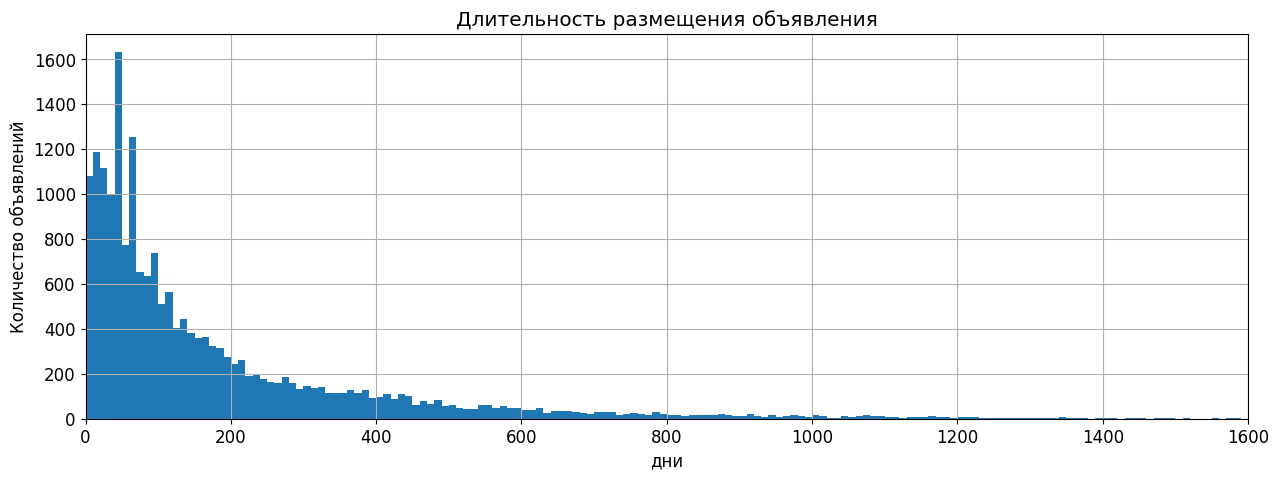

In [143]:
# строим гистограмму
my_hist(data, 'days_exposition', title= 'Длительность размещения объявления', xlabel='дни', 
             bins=160, range=(0, 1600));

Распределение в целом имеет убывающий вид и напоминает экспоненциальное: количество проданных объектов уменьшается с ростом длительности продажи. 

В целом плавное распределение имеет особенности - положительные выбросы на определённых значениях. Чтобы исследовать их, построим фрагмент гистограммы в диапазоне длительности до 100 дней.

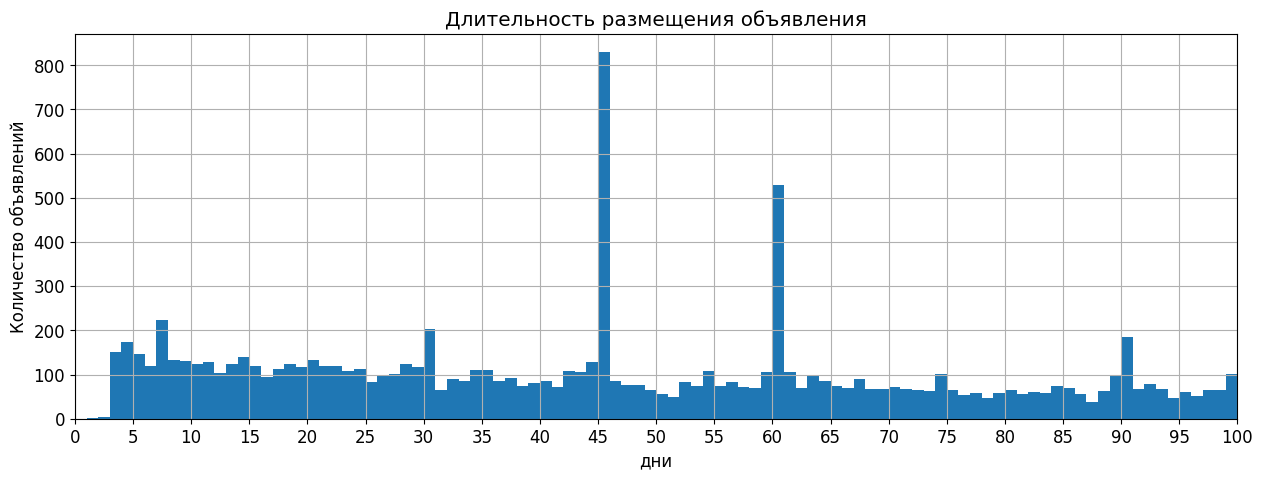

In [144]:
# строим гистограмму
ax = my_hist(data, 'days_exposition', title= 'Длительность размещения объявления', xlabel='дни', 
             bins=99, range=(1, 100))
ax.set_xticks(range(0, 105, 5));

Выделяются выбросы, соответствующие длительностям продажи 45, 60, 7, 30 и 90 дней (в порядке убывания числа продаж объектов). Вероятно, это следствие особенностей работы агентов на рынке недвижимости.

Определим положения выбросов на распределении.

In [145]:
# выбираем срез данных с длительностью продажи <= 100 дней
data_100 = data.query('days_exposition <= 100')
# ряд значений от 0 до 100
days = pd.Series(range(101))
# разбиваем данные на интервалы (n - 0.5, n + 0.5], где n = 1, 2, ..., 100
(pd.cut(data_100['days_exposition'], 
        bins = days + 0.5,
        labels = days[1:],
       )
 # считаем количество значений в каждом интервале
 .value_counts()
 # выводим первые 5
 .head()
)

45    830
60    529
7     223
30    203
90    186
Name: days_exposition, dtype: int64

Эти выбросы могут искажать характерные значения длительности продажи квартиры. Устраним их, заполнив средним значением ближайших соседей.

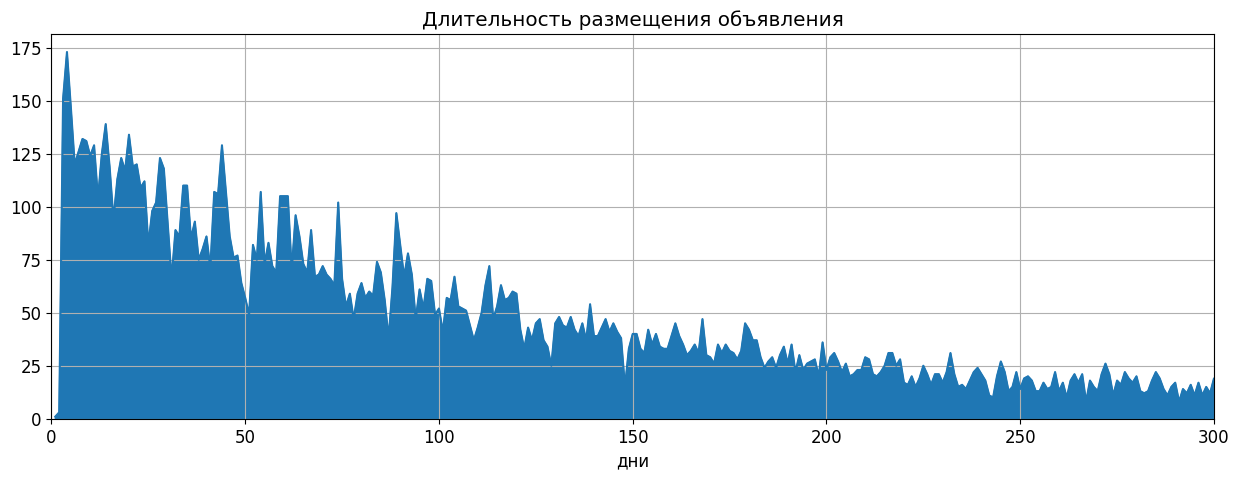

In [146]:
# ряд значений дней
days = np.arange(data['days_exposition'].max()+1)
# разбиваем данные на интервалы (n - 0.5, n + 0.5], где n = 1, 2, ..., max+1
hist_data = (
    pd.cut(data['days_exposition'], 
        bins = days + 0.5,
        labels = days[1:],
       )
 # считаем количество значений в каждом интервале
 .value_counts()
 .sort_index()
)
# изменяем тип индексов на целый
hist_data.index = hist_data.index.astype(int)

# убираем выбросы
for mode in [7, 30, 45, 60, 90]:
    # заменяем значение на среднее соседних
    hist_data.loc[mode] = (hist_data.loc[mode-1] +  hist_data.loc[mode+1]) / 2

# строим график
hist_data.plot.area(figsize=(15, 5), grid=True, xlim=(0, 300),
                   title= 'Длительность размещения объявления', xlabel='дни',
                   xticks=range(0, 301, 50)
                   );

Посчитаем среднее значение, медиану и квантили распределения по скорректированной гистограмме.

In [147]:
pd.Series(
    {
        'mean': (hist_data * hist_data.index).sum() / hist_data.sum(),
        '0.5%': (hist_data.cumsum() / hist_data.sum() - 0.005).abs().idxmin(),
        '25%': (hist_data.cumsum() / hist_data.sum() - 0.25).abs().idxmin(),
        'median': (hist_data.cumsum() / hist_data.sum() - 0.5).abs().idxmin(),
        '75%': (hist_data.cumsum() / hist_data.sum() - 0.75).abs().idxmin(),
        '99.5%': (hist_data.cumsum() / hist_data.sum() - 0.995).abs().idxmin(),
    }
)

mean       190.481751
0.5%         3.000000
25%         43.000000
median     108.000000
75%        249.000000
99.5%     1183.000000
dtype: float64

Для классификации продаж на быстрые и медленные можно использовать квантили распределения.

In [148]:
# квантили распределения
data['days_exposition'].quantile([0.005, 0.995])

0.005       3.00
0.995    1176.91
Name: days_exposition, dtype: float64

**Типичная длительность продажи** - медианное значение, составляющее 95 дней. Половина квартир продаётся быстрее этого срока, другая половина - дольше.

**Быстрыми** можно считать продажи, длительность которых меньше, чем для 99,5 % объектов, то есть меньше значения 0,005 квантиля, который составляет **3 дня**. Это означает, что 99,5 % объектов продаются дольше.

Аналогично, **необычно долгими** можно считать продажи, длительность которых больше, чем для 99,5 % объектов, то есть больше значения 0,995 квантиля, который составляет **1177 дней**. Это означает, что 99,5 % объектов продаются быстрее.

Определив объявления с аномально малой и аномально большой длительностью размещения, удалим их из данных.

In [149]:
# фильтруем выборку по квантилям
data = filter_by_quantile(data, ['days_exposition'], 0.005, 0.995)

Условие фильтрации:
 (days_exposition.isna() or 3.0 <= days_exposition <= 1176.91)
Количество потерь: 103
Доля потерь: 0.46%



В результате фильтрации по длительности размещения объявления из данных удалено ещё 103 объекта. Таким образом, с учётом отфильтрованных ранее 979 объектов из 23600, суммарный уровень потерь составляет примерно 4,6 %, что соответствует оптимальному уровню.

In [150]:
print(f'Суммарный уровень потерь: {(979 + 103) / 23600:.2%}')

Суммарный уровень потерь: 4.58%


Дополнительно посмотрим на изменение средней скорости продаж по годам.

count   mean_days
publication_year                   
2014                 89  791.539326
2015                981  596.698267
2016               2582  321.326878
2017               7594  158.168817
2018               7227   94.190120
2019               1034   30.946809

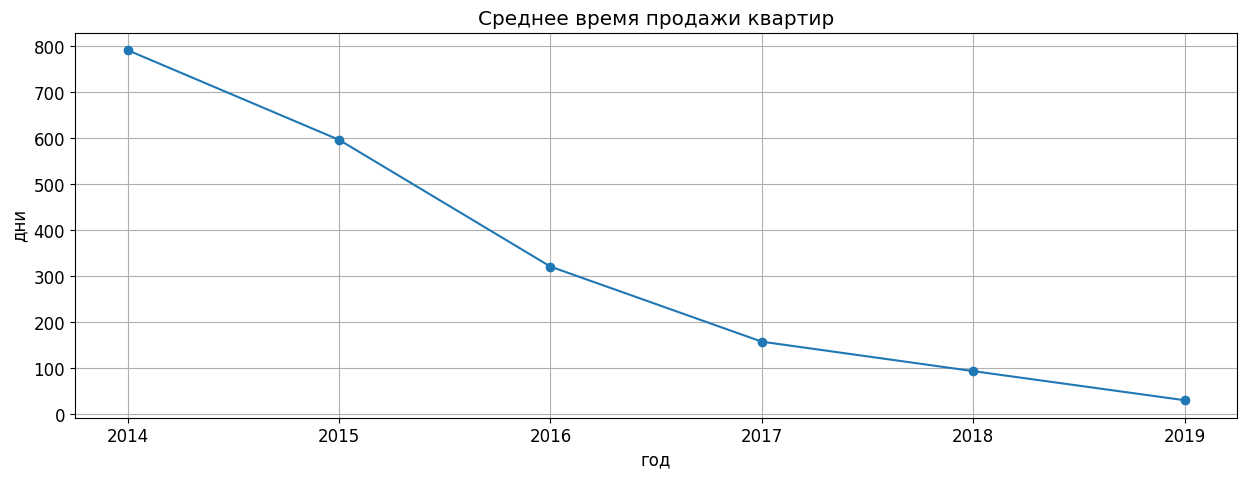

In [151]:
# сводная таблица
pivot = data.pivot_table(index='publication_year', 
                         values='days_exposition',
                         aggfunc=['count', 'mean'])
pivot.columns = ['count', 'mean_days']
display(pivot)

# строим график
pivot.plot(y='mean_days',
           style='o-', 
           grid=True, 
           legend=False, 
           figsize=(15, 5),
           xlabel='год', 
           ylabel='дни',
           title='Среднее время продажи квартир');

Среднее время продажи квартир с каждым годом становится меньше. Но это можно объяснить тем, что в данных представлена информация на конкретный момент времени, а уже проданные квартиры, размещённые давно, из базы данных удаляются. Поэтому остаются только непроданные квартиры, выставленные на продажу давно.

**Выводы:**

- В среднем число продаж уменьшается с ростом длительности продажи. Это логично - количество непроданных объектов со временем уменьшается.
- **Средняя** длительность продажи составляет **180** дней.
- Типичная длительность продажи - **медианное** значение, составляющее **95** дней. Половина квартир продаётся быстрее этого срока, другая половина - дольше. Поэтому можно считать, что обычно продажа занимает **95** дней.
- **Быстрыми** можно считать продажи, длительность которых меньше, чем для 99,5 % объектов, то есть меньше значения 0,005 квантиля, который составляет **3 дня**. Это означает, что 99,5 % объектов продаются дольше.
- **Необычно долгими** можно считать продажи, длительность которых больше, чем для 99,5 % объектов, то есть больше значения 0,995 квантиля, который составляет **1177 дней** (более 3 лет). Это означает, что 99,5 % объектов продаются быстрее.

На распределении длительности продажи обнаружены положительные **выбросы**, соответствующие длительностям продажи 45, 60, 7, 30 и 90 дней (в порядке убывания числа продаж объектов). Вероятно, это следствие особенностей работы агентов на рынке недвижимости. Если устранить эти выбросы, то характерные значения изменятся:
- **Средняя** длительность продажи составит **190** дней.
- **Медианная** длительность продажи составит **108** дней.
- Границы быстрых и необычно медленных продаж изменятся незначительно. 

###  Исследование зависимости цены квартиры от её параметров

Исследуем, зависит ли цена квартиры от следующих её параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для оценки влияния количественных параметров, значения которых непрерывно изменяются в некотором диапазоне, построим диаграммы рассеяния, по которым можно оценить характер совместного распределения двух величин - цены объекта и значения параметра.

Таких параметров среди выбранных для анализа три:
- общая площадь (столбец `total_area`);
- жилая площадь (столбец `living_area`);
- площадь кухни (столбец `kitchen_area`).

**Общая площадь**

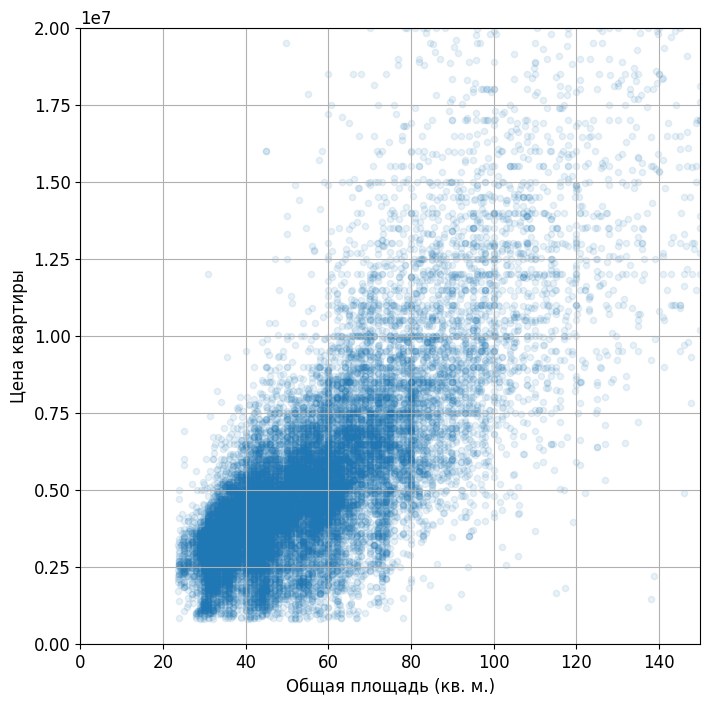

In [152]:
# строим диаграмму рассеяния
# в выбранном диапазоне значений
(data
 .plot.scatter(x='total_area', y='last_price', 
               xlim=(0, 150), ylim=(0, 20_000_000),
               xlabel='Общая площадь (кв. м.)', ylabel='Цена квартиры',
               alpha=0.1, grid=True, figsize=(8, 8)
              )
);

С увеличением общей площади цена квартиры в среднем возрастает. Зависимость более выражена для небольших и недорогих квартир, а по мере роста цены и площади разброс данных сильно возрастает.

**Жилая площадь**

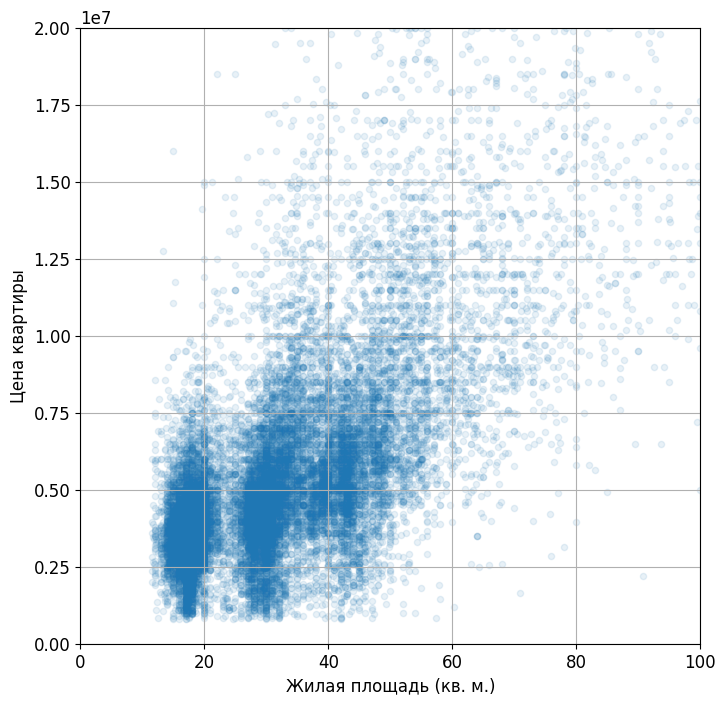

In [153]:
# строим диаграмму рассеяния
# в выбранном диапазоне значений
(data
 .plot.scatter(x='living_area', y='last_price', 
               xlim=(0, 100), ylim=(0, 20_000_000),
               xlabel='Жилая площадь (кв. м.)', ylabel='Цена квартиры',
               alpha=0.1, grid=True, figsize=(8, 8)
              )
);

С увеличением жилой площади цена квартиры в среднем также возрастает. Зависимость более выражена для небольших и недорогих квартир, а по мере роста цены и площади разброс данных сильно возрастает.

На диаграмме рассеяния заметна группировка объектов в три отдельных, хотя и близких, кластера. 

При анализе гистограмм было сделано предположение, что отдельные пики соответствуют количеству комнат в квартире. Убедимся, что кластеры на диаграмме рассеяния соответствуют квартирам с определённым количеством комнат. Для этого отметим объекты с разным количеством комнат разными цветами:
- 1-комнатные - синим,
- 2-комнатные - зелёным,
- 3-комнатные - красным,
- остальные - чёрным.

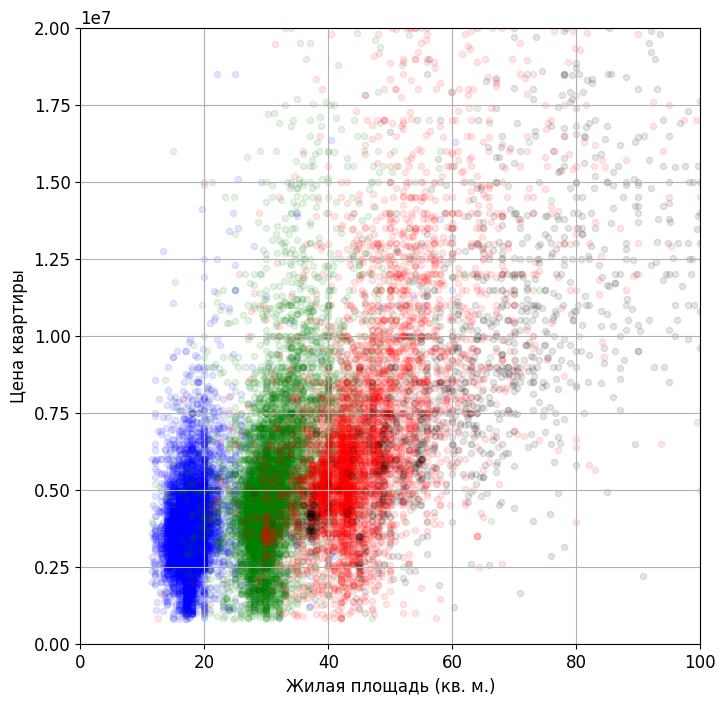

In [154]:
# строим диаграммы рассеяния

# 1-комнатные квартиры
ax = (
    data.query('rooms == 1')
    .plot.scatter(x='living_area', y='last_price', 
                  xlim=(0, 100), ylim=(0, 20_000_000),
                  xlabel='Жилая площадь (кв. м.)', ylabel='Цена квартиры',
                  alpha=0.1, grid=True, figsize=(8, 8),
                  color='blue'
                 )
);
# 2-комнатные квартиры
(data.query('rooms == 2')
    .plot.scatter(x='living_area', y='last_price', 
                  xlim=(0, 100), ylim=(0, 20_000_000),
                  xlabel='Жилая площадь (кв. м.)', ylabel='Цена квартиры',
                  alpha=0.1, grid=True, figsize=(8, 8),
                  ax=ax, color='green'
                 )
);
# 3-комнатные квартиры
(data.query('rooms == 3')
    .plot.scatter(x='living_area', y='last_price', 
                  xlim=(0, 100), ylim=(0, 20_000_000),
                  xlabel='Жилая площадь (кв. м.)', ylabel='Цена квартиры',
                  alpha=0.1, grid=True, figsize=(8, 8),
                  ax=ax, color='red'
                 )
);
# прочие квартиры
(data.query('rooms >= 4')
    .plot.scatter(x='living_area', y='last_price', 
                  xlim=(0, 100), ylim=(0, 20_000_000),
                  xlabel='Жилая площадь (кв. м.)', ylabel='Цена квартиры',
                  alpha=0.1, grid=True, figsize=(8, 8),
                  ax=ax, color='black'
                 )
);

**Площадь кухни**

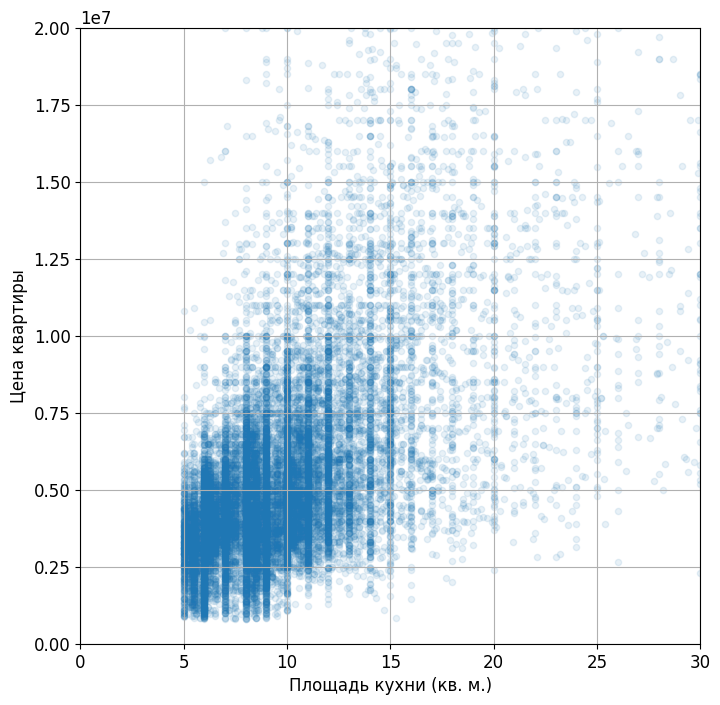

In [155]:
# строим диаграмму рассеяния
# в выбранном диапазоне значений
(data
 .plot.scatter(x='kitchen_area', y='last_price', 
               xlim=(0, 30), ylim=(0, 20_000_000),
               xlabel='Площадь кухни (кв. м.)', ylabel='Цена квартиры',
               alpha=0.1, grid=True, figsize=(8, 8)
              )
);

С увеличением площади кухни цена квартиры в среднем также возрастает. Зависимость более выражена для небольших и недорогих квартир, а по мере роста цены и площади разброс данных сильно возрастает.

Для оценки влияния параметров, которые принимают дискретные значения из небольшого множества либо категориальные значения, лучше сгруппировать данные по значению параметра и построить исследовать зависимость для сгруппированных данных.

Для построения графиков зависимости цены объектов от значения параметра создадим функцию `price_plot()`. В качестве агрегирующей функции используем медиану, чтобы снизить влияние редких значений, сильно отличающихся от большинства. 

Для оценки достоверности данных в таблице приведено количество объектов в каждой группе, а на графиках указаны доверительные интервалы для среднего значения, рассчитанные по приближённой формуле 
$$\Delta = 2 \frac{\sigma}{\sqrt{n}},$$
где $\sigma$ - стандартное отклонение, $n$ - количество объектов в группе.

In [156]:
def price_plot(data, param, kind='line', ylim=None,
              title='', xlabel=None):
    """
    Выводит сводную таблицу зависимости цены объекта от
    параметра, указанного в аргументе,
    и строит график.
    """
    # сводная таблица результатов
    pivot = data.pivot_table(index=param, values='last_price', aggfunc=['count','median'])
    
    # оценка погрешности
    try:
        error = data.pivot_table(index=param, values='last_price', aggfunc='sem') * 2
    except:
        error = 0
        
    # переименуем столбцы
    pivot.columns = ['count', 'median_price']
    error.columns = ['median_price']
    # выводим сводную таблицу
    display(pivot)
    # строим график
    ax = pivot.plot(
        y='median_price',
        yerr = error,
        capsize = 4,
        title=title,
        xlabel=xlabel,
        ylabel='Медианная цена',
        ylim=ylim,
        kind=kind,
        grid = True, 
        legend=False,
        figsize=(15, 5),
        rot=0,
    )
    return ax

**Количество комнат**

count  median_price
rooms                     
1       7791       3600000
2       7658       4785000
3       5624       6150000
4       1106       8810000
5        272      12650000
6         67      14700000

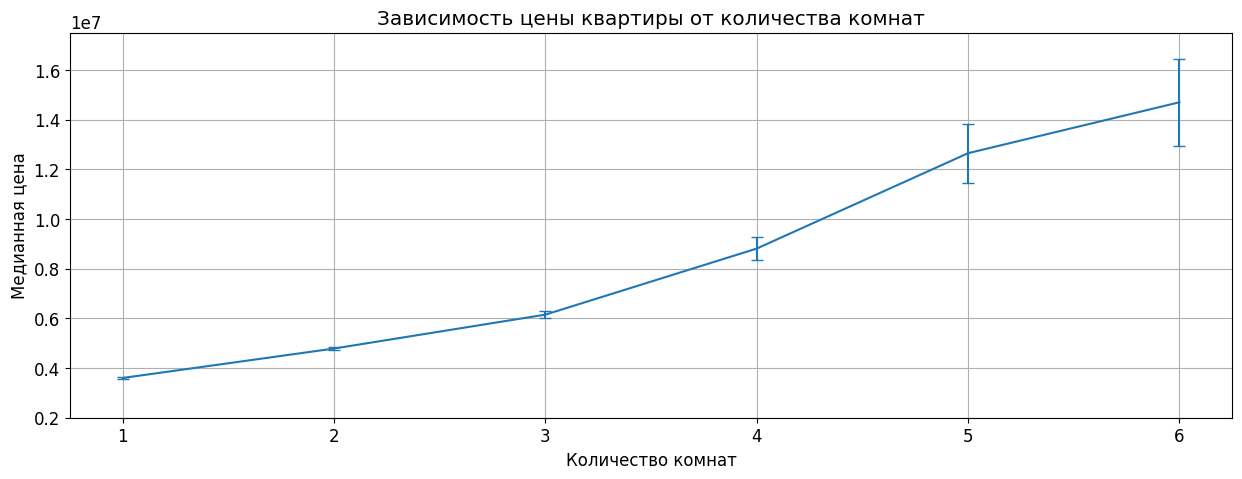

In [157]:
price_plot(data, 'rooms', ylim=(2_000_000, 17_500_000),
           title='Зависимость цены квартиры от количества комнат', xlabel='Количество комнат');

Медианная цена квартиры возрастает более чем в 5 раз с увеличением числа комнат в диапазоне от 1 до 6. Далее зависимость становится менее выраженной, а для числа комнат более 6 разброс цен слишком велик, чтобы выявить закономерность.

**Тип этажа**

count  median_price
floor_type                     
другой      16689       4800000
первый       2757       3950000
последний    3072       4300000

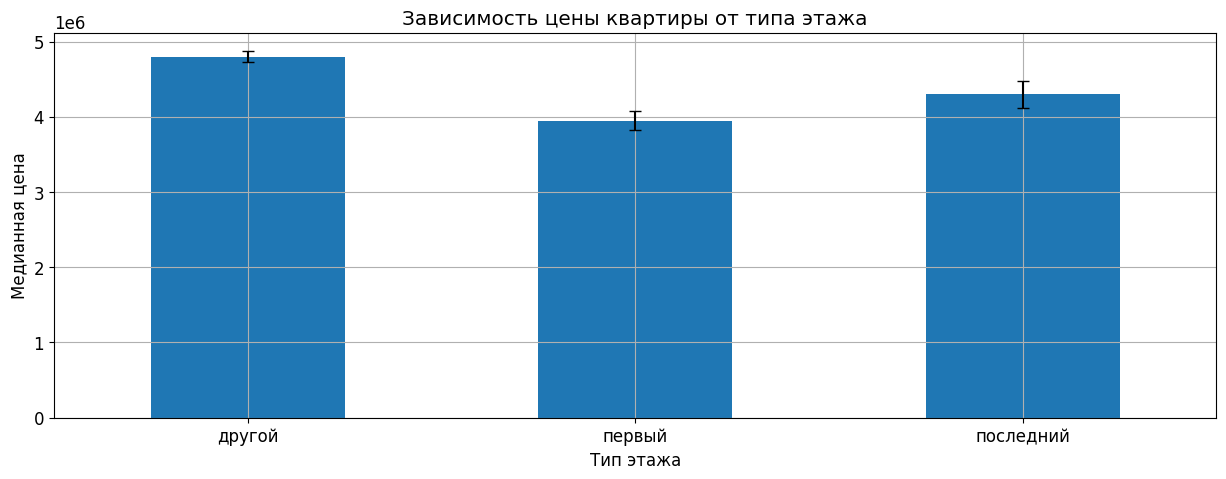

In [158]:
price_plot(data, 'floor_type', kind='bar',
           title='Зависимость цены квартиры от типа этажа', xlabel='Тип этажа');

Квартиры на промежуточных этажах имеют более высокую медианную цену, чем на первом или последнем. 

Самые дешёвые - квартиры на первом этаже, они примерно на 20 % дешевле, чем на промежуточных этажах. 

Квартиры на последнем этаже имеют больший разброс по стоимости. Вероятно, цена зависит от конкретного значения этажа.

**День недели размещения объявления**

count  median_price
publication_weekday                     
0                     3444       4650000
1                     3982       4704595
2                     3761       4700000
3                     4070       4600000
4                     3830       4580000
5                     1830       4550000
6                     1601       4550000

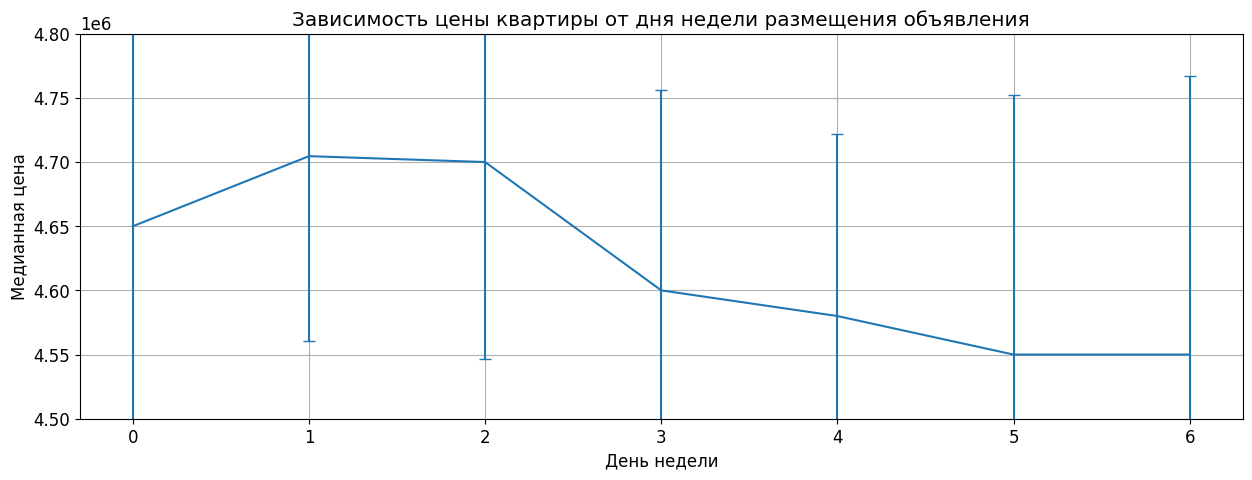

In [159]:
price_plot(data, 'publication_weekday', ylim=(4_500_000, 4_800_000),
           title='Зависимость цены квартиры от дня недели размещения объявления', 
           xlabel='День недели');

В первой половине недели на продажу выставляют в среднем немного более дорогие объекты. Однако относительная разница цен невелика - всего около 150 000 на фоне среднего около 4 600 000, что составляет примерно 3 %.

**Месяц размещения объявления**

count  median_price
publication_month                     
1                   1425       4600000
2                   2527       4650000
3                   2460       4650000
4                   2253       4800000
5                   1209       4500000
6                   1676       4400000
7                   1583       4650000
8                   1660       4600000
9                   1879       4690000
10                  2030       4577500
11                  2263       4700000
12                  1553       4680000

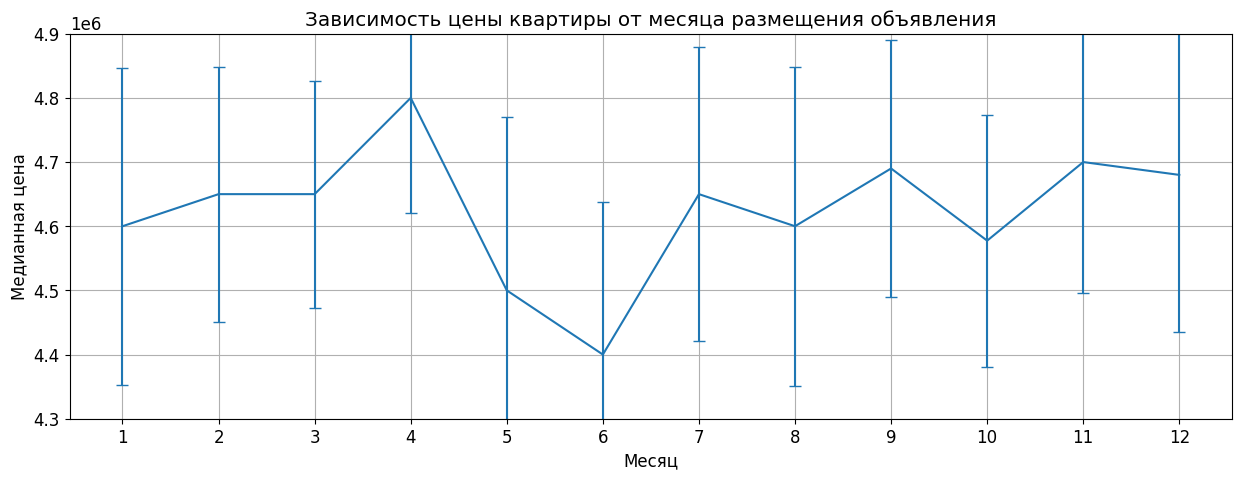

In [160]:
(price_plot(data, 'publication_month', ylim=(4_300_000, 4_900_000),
           title='Зависимость цены квартиры от месяца размещения объявления', 
           xlabel='Месяц')
 .set_xticks(range(1, 13))
);

В мае и июне выставляются на продажу в среднем чуть более дешёвые объекты, а в апреле - чуть более дорогие. Но отклонение от среднего уровня мало - около 200 000 на фоне среднего 4 600 000. К тому же разброс цен достаточно велик. Если учитывать погрешность, то можно только утверждать, что в июне уровень цен выставляемых на продажу объектов чуть меньше, чем а апреле.

**Год размещения объявления**

count  median_price
publication_year                     
2014                106       7388280
2015               1044       5160000
2016               2643       4550000
2017               7840       4500000
2018               8130       4600000
2019               2755       5099000

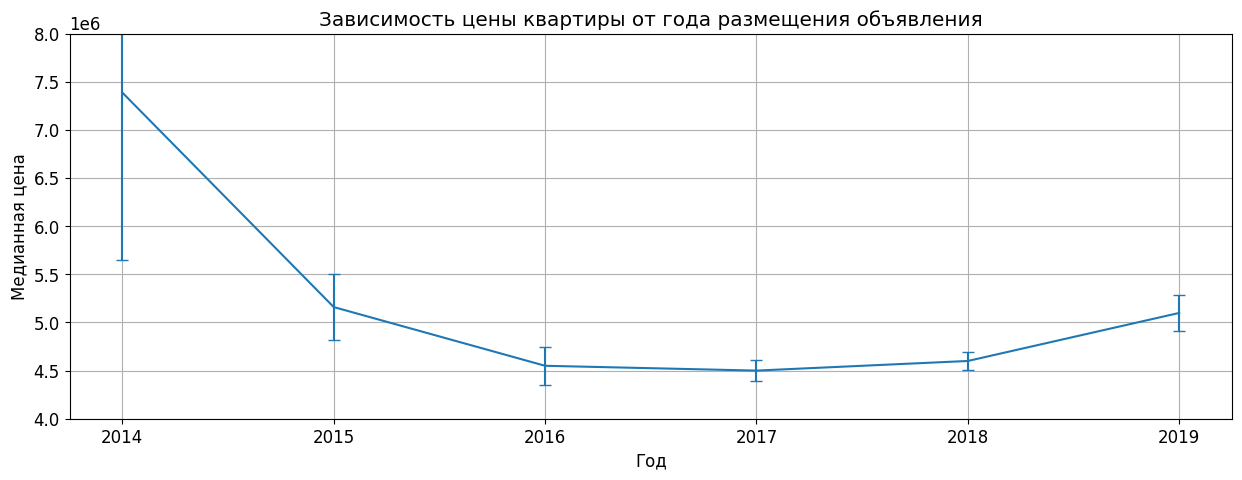

In [161]:
price_plot(data, 'publication_year', ylim=(4_000_000, 8_000_000),
           title='Зависимость цены квартиры от года размещения объявления', 
           xlabel='Год');

В 2014-2016 годах медианная цена квартиры снижалась, однако данных за 2014 год очень мало, поэтому для этого года большая погрешность результата. В 2016-2018 годах цена оставалась примерно на одном уровне, а в 2019 году выросла.  

Исследуем взаимное влияние цены, общей площади объекта и количества объявлений в зависимости от года размещения объявления.

Количество объявлений  Медианная цена  Медианная цена за кв. м  \
Год                                                                    
2014                    106         7388280                 106406.5   
2015                   1044         5160000                  91939.7   
2016                   2643         4550000                  91549.3   
2017                   7840         4500000                  92223.2   
2018                   8130         4600000                  95652.2   
2019                   2755         5099000                 103067.5   

      Медианная площадь (кв. м)  
Год                              
2014                       75.0  
2015                       59.4  
2016                       53.2  
2017                       51.7  
2018                       51.0  
2019                       52.0

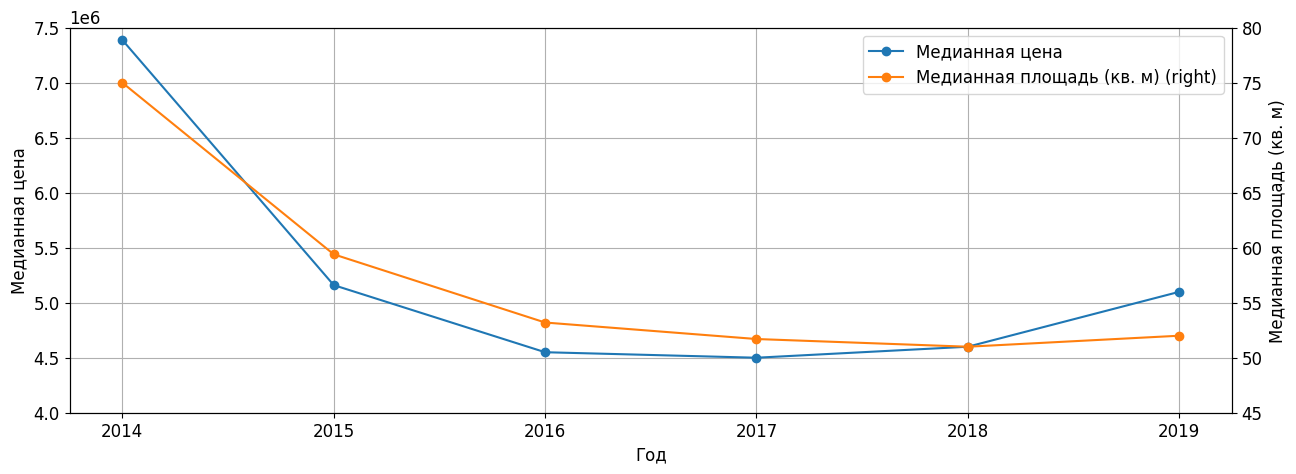

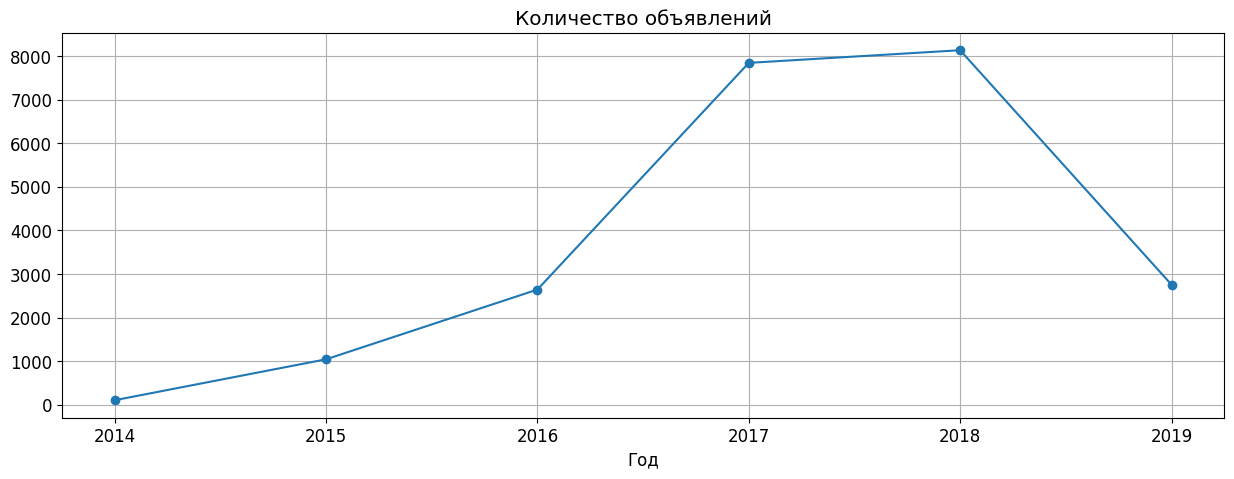

In [162]:
# сводная таблица результатов
year_stat = data.pivot_table(index='publication_year',
                         aggfunc={'last_price': ['count','median'],
                                  'price_per_sqm': 'median',
                                  'total_area': 'median',
                                 }
                        )
year_stat.columns = ['count', 'median_price', 'median_price_per_sqm', 'median_area']

# выводим таблицу
display(
    year_stat
    .round(1)
    .rename_axis('Год')
    .rename(columns={'count': 'Количество объявлений',
                     'median_price': 'Медианная цена',
                     'median_price_per_sqm': 'Медианная цена за кв. м',
                     'median_area': 'Медианная площадь (кв. м)',
                    }
           )
)
# строим графики
ax = year_stat.plot(y='median_price',
        style='o-',
        label='Медианная цена',
        ylabel='Медианная цена',
        ylim=(4_000_000, 7_500_000),
        figsize=(15, 5),
        legend=True)
year_stat.plot(
        y='median_area',
        style='o-', 
        ax=ax, 
        secondary_y=True,
        label='Медианная площадь (кв. м)',
        xlabel='Год',
        grid = True,
        legend=True)
ax.right_ax.set_ylabel('Медианная площадь (кв. м)')
ax.right_ax.set_ylim(45, 80);

ax2 = year_stat.plot(
        y='count',
        style='o-',
        xlabel='Год',
        title='Количество объявлений',
        figsize=(15, 5),
        grid=True,
        legend=False);

Характер зависимости цены объекта и его общей площади от года похож, а зависимость количества объявлений имеет противоположный вид. 

Чтобы интерпретировать эти зависимости, изучим корреляцию величин.

In [163]:
# коэффициенты корреляции
year_stat.corr()

count  median_price  median_price_per_sqm  \
count                 1.000000     -0.663942             -0.419431   
median_price         -0.663942      1.000000              0.790449   
median_price_per_sqm -0.419431      0.790449              1.000000   
median_area          -0.694987      0.966550              0.607321   

                      median_area  
count                   -0.694987  
median_price             0.966550  
median_price_per_sqm     0.607321  
median_area              1.000000

Видна сильная положительная корреляция цены и площади, а также цены и цены за кв. м (что логично), но также отрицательная корреляция всех трёх величин с количеством объявлений. 

Возможная причина корреляции - при малом количестве объявлений выше влияние редких объектов с большой площадью и высокой ценой на характерные значения для выборки.

Это означает, что для годов с малым количеством объявлений выше доля объектов с большой площадью и ценой. Поэтому большая цена объектов, размещённых в 2014 году, объясняется малым количеством объявлений. Также рост цены в 2019 году можно объяснить уменьшением количества объявлений. 

Таким образом, корректно сравнивать можно только данные по годам с примерно одинаковым количеством объявлений:
- 2016 и 2019: за 3 года стоимость объектов выросла, несмотря на снижение площади, за счёт роста цены за кв.м.
- 2017 и 2018: за год стоимость слегка увеличилась, но и площадь снизилась, а цена за кв. м выросла.

Также построим график изменения цены за кв. м в зависимости от года.

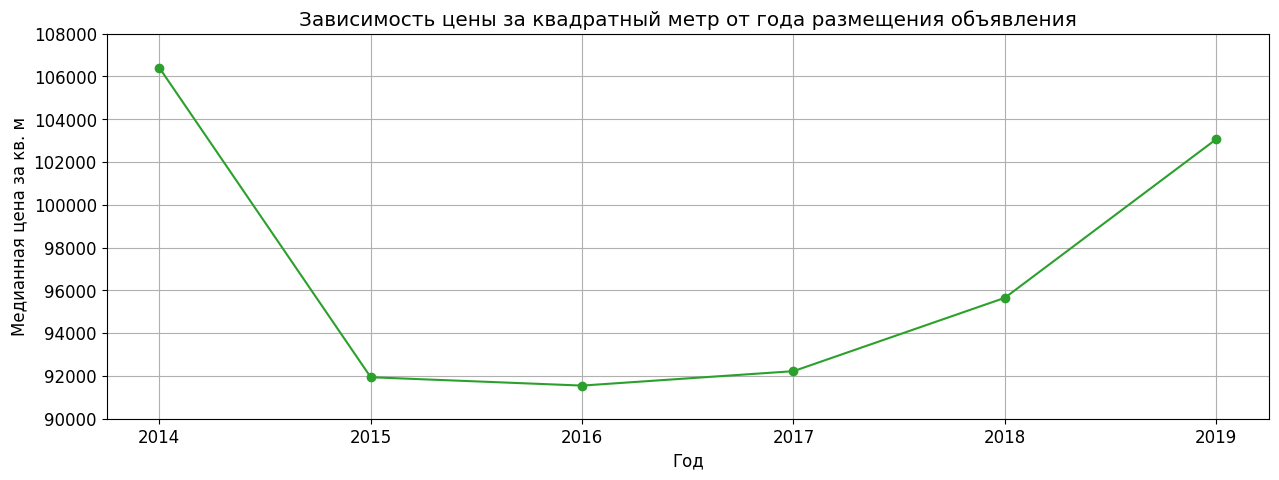

In [164]:
# строим график
(year_stat
 .plot(
     style='o-',
     xlabel='Год',
     ylabel='Медианная цена за кв. м',
     title='Зависимость цены за квадратный метр от года размещения объявления',
     ylim=(90_000, 108_000),
     figsize=(15, 5),
     legend=False,
     grid = True)
);

Для 2014 года цена за кв. м. большая, что подтверждает предположение, что в данных за этот год представлены дорогие объекты. При этом их очень мало по сравнению с другими годами.

Начиная с 2016 г. наблюдается усиливающийся **рост цены за кв. м**. Для 2017 и 2018 годов количество объявлений примерно одинаковое, а рост цены за кв. м заметный. Поэтому эта закономерность действительно существует.

Чтобы оценить степень влияния каждого параметра на цену квартиры, рассчитаем коэффициент корреляции Пирсона для цены и каждого из количественных параметров.

In [165]:
# список параметров
params = ['total_area', 
          'living_area', 
          'kitchen_area', 
          'rooms', 
          'ceiling_height',
          'floor',
          'floors_total',
          'publication_weekday', 
          'publication_month', 
          'publication_year',
          'city_centers_nearest',
          'parks_nearest',
          'ponds_nearest',
          'airports_nearest',
          'total_images',
         ]
# считаем коэффициент корреляции
(data
 .corr()
 .loc['last_price', params]
 .sort_values(key=lambda x: abs(x), ascending=False)
)

total_area              0.765530
living_area             0.664321
kitchen_area            0.578148
ceiling_height          0.495891
rooms                   0.470075
city_centers_nearest   -0.330691
total_images            0.147251
ponds_nearest          -0.110924
floor                   0.062332
floors_total            0.052284
airports_nearest       -0.033700
publication_year       -0.032711
publication_weekday    -0.018577
parks_nearest           0.016094
publication_month       0.002745
Name: last_price, dtype: float64

Коэффициенты корреляции положительны для общей площади, жилой площади и площади кухни, что подтверждает наблюдения, сделанные по диаграммам рассеяния. Из данных 3-х параметров сильнее всего на цену квартиры влияет общая площадь, затем по убыванию степени влияния жилая площадь и площадь кухни. 

Для числа комнат тоже положительный коэффициент линейной корреляции, что согласуется с выводом, сделанным по сгруппированным данным.

Примерно так же, как и число комнат, на цену влияет высота потолков: чем выше потолки, тем больше цена объекта.

Коэффициент корреляции для расстояния от центра города отрицательный. Это означает, что цена объектов уменьшается с удалением от центра.

Для остальных параметров коэффициент линейной корреляции мал по абсолютной величине, а значит либо их влияние на цену объекта слабое, либо зависимость может бытть нелинейной.

Для дня недели, месяца и года размещения объявления коэффициент линейной корреляции близок к нулю, что подтверждает отсутствие зависимости от дня недели и месяца, и её нелинейный характер для года.

**Выводы:**

- С увеличением общей площади, жилой площади, площади кухни, количества комнат и высоты потолков стоимость квартиры возрастает. Сильнее всего на цену квартиры влияет общая площадь, затем по убыванию степени влияния жилая площадь, площадь кухни, высота потолков, количество комнат.
- Тип этажа (первый, последний, или другой) также влияет на цену квартиры. Квартиры на первом этаже примерно на 20 % дешевле, чем на промежуточных этажах. Квартиры на последнем этаже имеют больший разброс по стоимости, вероятно, цена зависит от конкретного этажа.
- Зависимость стоимости квартиры от дня недели и месяца размещения объявления невелика: цена меняется в пределах ±5 %. В первой половине недели на продажу выставляют в среднем немного более дорогие объекты. В мае и июне выставляются на продажу в среднем чуть более дешёвые объекты, а в апреле - чуть более дорогие.
- Зависимость стоимости квартир от года размещения объявления объясняется сопутствующим изменением общей площади объектов. Тем не менее, цена за кв. м начиная с 2016 года возрастает с каждым годом. Видимо, это влияние инфляции.

Большинство объектов на построенных диаграммах рассеяния образуют один кластер (или несколько близколежащих), который можно считать областью нормальных для рынка значений набора параметров.

Используя полученные зависимости и совместные распределения величин, можно выявлять аномалии - объекты, которые на распределении попадают далеко от основной массы объектов на рынке и для которых соотношение между значениями параметров и стоимостью отличается от установленных в результате анализа корреляций.

### Средняя цена квадратного метра в населённых пунктах

Для проверки на наличие выбросов построим гистограмму распределения цены за кв. м.

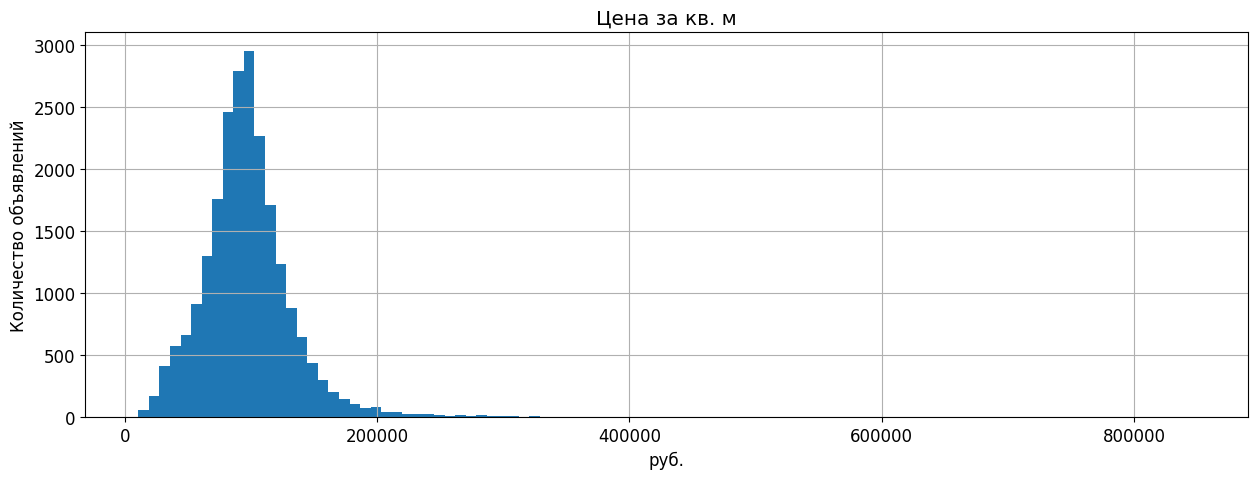

In [166]:
# строим гистограмму
my_hist(data, 'price_per_sqm', title= 'Цена за кв. м', xlabel='руб.', bins=100);

Из гистограммы видно, что в данных есть объекты с редкими очень большими ценами за кв. м. Выясним их долю.

In [167]:
# считаем количество и долю объектов с ценой за кв. м > 300 000
outliers_stat(data['price_per_sqm'] > 300_000)

Количество: 77
Доля: 0.34%


Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для каждого населённого пункта и выделим 10 н.п. с наибольшим числом объявлений. Для снижения влияния редких очень больших значений исключим объекты с ценой кв. м. более 300 000.

In [168]:
# исключаем объекты с ценой кв. м. более 300 000 и
# формируем сводную таблицу
locality_stat = (
    data
    .query('price_per_sqm <= 300_000')
    .pivot_table(index='locality_name_short', 
                 values='price_per_sqm', 
                 aggfunc=['count','mean']
                )
)
# переименовываем столбцы
locality_stat.columns = ['count', 'mean_price_per_sqm']
# сортируем строки по убыванию кол-ва объявлений
# оставляем первые 10
locality_top = (
    locality_stat
    .sort_values('count', ascending=False)
    .head(10)
    .round(1)
)
# в выводимой таблице:
# сортируем строки по убыванию цены за кв. м
# сбрасываем индекс
# называем столбцы по-русски 
(locality_top
    .sort_values('mean_price_per_sqm', ascending=False)
    .reset_index()
    .rename(columns={'locality_name_short': 'Населённый пункт',
                     'count': 'Кол-во объявлений', 
                     'mean_price_per_sqm': 'Средняя цена кв. м',
                    }
           )
)

Населённый пункт  Кол-во объявлений  Средняя цена кв. м
0  Санкт-Петербург              14894            110461.9
1           Пушкин                351            102972.0
2          Кудрово                454             95002.0
3        Парголово                293             89897.5
4           Мурино                536             85578.0
5           Шушары                423             77935.0
6          Колпино                335             75258.5
7          Гатчина                302             68846.4
8       Всеволожск                389             67234.1
9           Выборг                228             58236.1

Представим полученные данные в виде диаграммы.

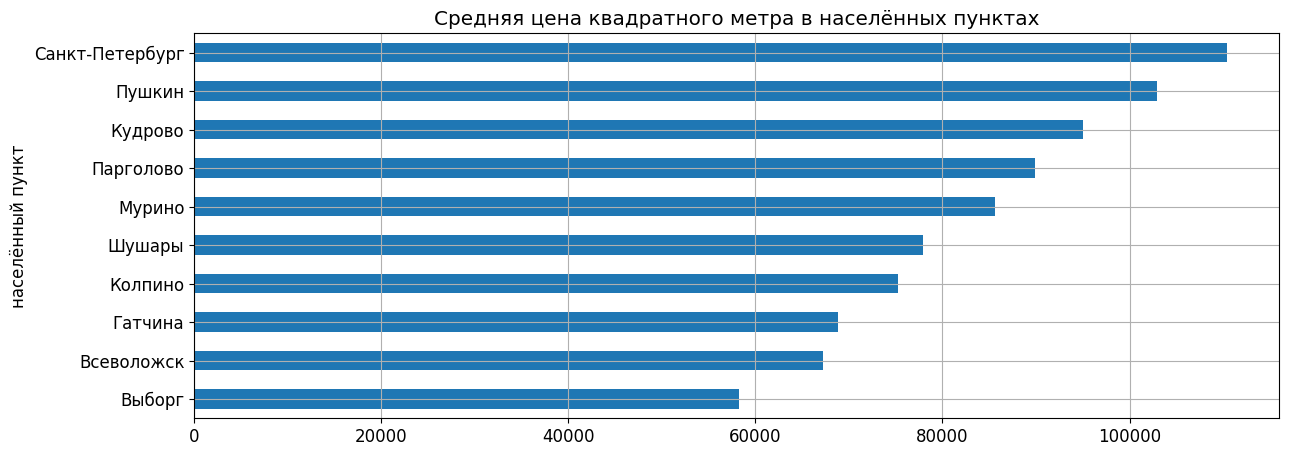

In [169]:
# строим график
(locality_top
 .sort_values('mean_price_per_sqm')
 .plot.barh(y='mean_price_per_sqm', 
            title='Средняя цена квадратного метра в населённых пунктах', 
            xlabel='населённый пункт', ylabel='руб.',
            figsize=(14, 5), grid=True, legend=False)
);

В полученной таблице и на графике населённые пункты упорядочены по убыванию цены за кв. м. Поэтому видно,что населённый пункт с максимальной ценой кв. м - это Санкт-Петербург, а с минимальной - Выборг. 

Но это можно также установить автоматически даже без сортировки таблицы по цене. Найдём населённые пункты с самой высокой и низкой ценой квадратного метра.

In [170]:
# находим индексы макс. и мин. значений в столбце 'mean_price_per_sqm' 
# по таблице locality_top, где индекс - название населённого пункта
(locality_top['mean_price_per_sqm']
 .agg(['idxmax', 'idxmin'])
 .rename(index={'idxmax': 'Населённый пункт с максимальной ценой кв. м', 
                'idxmin': 'Населённый пункт с минимальной ценой кв. м'
               }
        )
)

Населённый пункт с максимальной ценой кв. м    Санкт-Петербург
Населённый пункт с минимальной ценой кв. м              Выборг
Name: mean_price_per_sqm, dtype: object

**Выводы:**

- Рассчитана средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
- Определены населённые пункты с самой высокой и низкой средней ценой квадратного метра:
     - Самая **высокая** средняя цена квадратного метра в **Санкт-Петербурге**.
     - Самая **низкая** средняя цена квадратного метра в **Выборге**.

### Зависимость цены квартиры от расстояния до центра Санкт-Петербурга

Рассчитаем, как меняется средняя стоимость квартир в Санкт-Петербурге в зависимости от расстояния до центра города в километрах.

In [171]:
# выделяем строки со значением "Санкт-Петербург" в столбце 'locality_name'
data_spb = data.query('locality_name == "Санкт-Петербург"').copy()

In [172]:
# характеристики распределения значений в столбце 
column_stat(data_spb, 'city_centers_nearest_km')

count  nan_count  min   mean  median   max
column                                                             
city_centers_nearest_km  14915         54  0.0  11.69    12.0  29.0

Удалим объекты с пропусками в столбце `city_centers_nearest_km` и изменим тип данных на целочисленный.

In [173]:
# удаляем строки с пропусками в столбце 'city_centers_nearest_km'
data_spb.dropna(subset=['city_centers_nearest_km'], inplace=True)
# изменяем тип данных в столбце 'city_centers_nearest_km' на int
data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest_km'].astype(int)

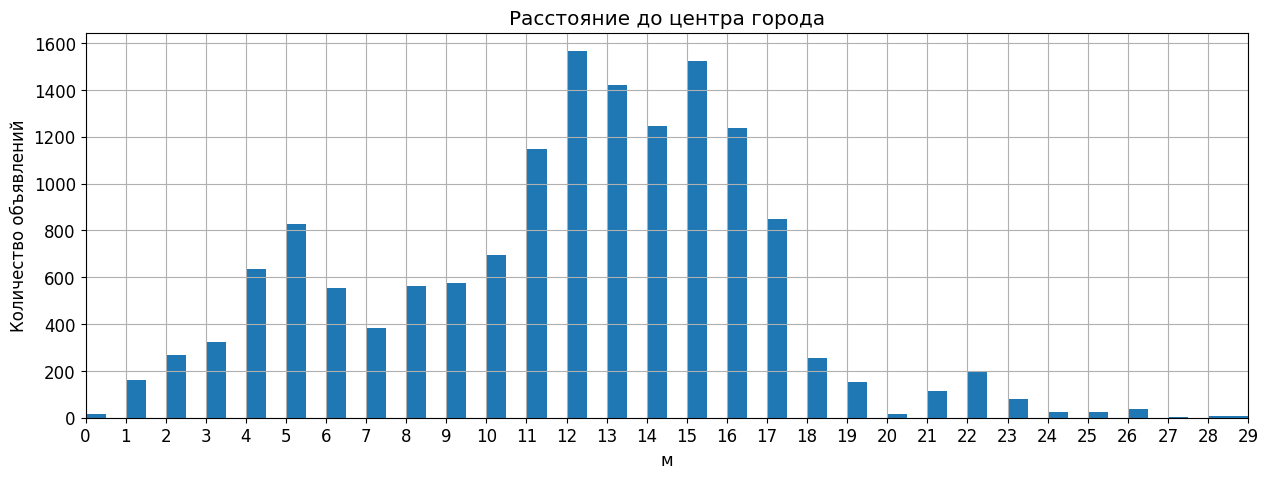

In [174]:
# строим гистограмму
ax = my_hist(data_spb, 'city_centers_nearest_km', title='Расстояние до центра города', xlabel='м', 
             bins=58,  range=(0, 29))
ax.set_xticks(range(0, 30, 1));

Найдём среднюю цену квартиры для каждого километра от центра Санкт-Петербурга и построим график её зависимости от расстояния до центра города.

Для этого создадим функцию `mean_price_per_km()`, которая выведет сводную таблицу и построит график зависимости средней цены от расстояния до центра города. Для оценки достоверности данных в таблице приведено количество объектов в каждой группе, а на графиках указаны полосы доверительных интервалов для среднего значения.

In [175]:
def mean_price_per_km(data, xlim=None, ylim=None, display_table=True):
    """
    Выводит сводную таблицу и строит график зависимости средней цены 
    от расстояния до центра города.
    """
    # строим сводную таблицу  с агрегирующими функциями:
    # 'count' - количество объектов,
    # 'mean' - среднее значение,
    # 'sem' - стандартная ошибка среднего,
    # преобразуем значения в целые числа
    pivot = (
        data
         .pivot_table(index='city_centers_nearest_km',
                      values='last_price',
                      aggfunc=['count', 'mean', 'sem'],
                     )
        .fillna(0)
        .round(1)
    )
    # преобразуем значения расстояния в км в целые числа
    pivot.index = pivot.index.astype(int)
    # переименовываем столбец со средней ценой
    pivot.columns = ['count', 'mean_price', 'std_mean_price']
    
    if display_table:
        display(pivot
            # для вывода называем индекс и столбцы по-русски
            .rename_axis('Расстояние до центра города (км)')
            .rename(columns={'count': 'Кол-во квартир',
                             'mean_price': 'Средняя цена квартиры',
                             'std_mean_price': 'Стандартная ошибка среднего'})
        )
    # строим график и
    # откладываем полосы 95%-доверительных интервалов на расстоянии, 
    # равном (стандартная ошибка среднего * 2)
    ax = (
        pivot
        .plot(
            y='mean_price',
            xlim=xlim,
            xticks=range(30),
            xlabel='Расстояние до центра города (км)',
            ylim=ylim,
            ylabel='Средняя цена квартиры',
            grid = True,
            legend=False,
            figsize=(15, 8),
        )
    )
    ax.fill_between(
            pivot.index, 
            pivot['mean_price'] - 2 * pivot['std_mean_price'], 
            pivot['mean_price'] + 2 * pivot['std_mean_price'],
            alpha=0.5
    )
    
    return ax

Кол-во квартир  Средняя цена квартиры  \
Расстояние до центра города (км)                                          
0                                             17             18076651.3   
1                                            162             12323512.3   
2                                            269             11968591.1   
3                                            322              9984265.1   
4                                            637             10816844.4   
5                                            828             11403689.4   
6                                            556             11352854.4   
7                                            383             11356129.9   
8                                            563              8886873.8   
9                                            574              6909615.6   
10                                           693              6412470.0   
11                                          1146              6059087.4   
12                                          1566              5819682.5   
13                                          1423              6060030.3   
14                                          1248              5566195.9   
15                                          1524              5746653.7   
16                                          1236              5355118.3   
17                                           850              5218867.1   
18                                           257              4916488.2   
19                                           151              5070066.0   
20                                            18              4657777.8   
21                                           115              5458853.8   
22                                           196              5340285.2   
23                                            81              4734172.8   
24                                            26              3854429.6   
25                                            23              4121956.5   
26                                            36              4192545.1   
27                                             2              8300000.0   
28                                             7              5026428.6   
29                                             6              4236666.7   

                                  Стандартная ошибка среднего  
Расстояние до центра города (км)                               
0                                                   3458376.4  
1                                                    548330.8  
2                                                    469075.3  
3                                                    325168.7  
4                                                    259047.6  
5                                                    251198.3  
6                                                    385497.0  
7                                                    490421.2  
8                                                    235004.4  
9                                                    197014.8  
10                                                   154741.3  
11                                                   103941.7  
12                                                    72867.1  
13                                                    78260.1  
14                                                    68001.7  
15                                                    74875.0  
16                                                    67394.9  
17                                                    90214.5  
18                                                   140442.8  
19                                                   180977.9  
20                                                   309128.6  
21                                                   185468.9  
22                                                   159165.3  
23                               

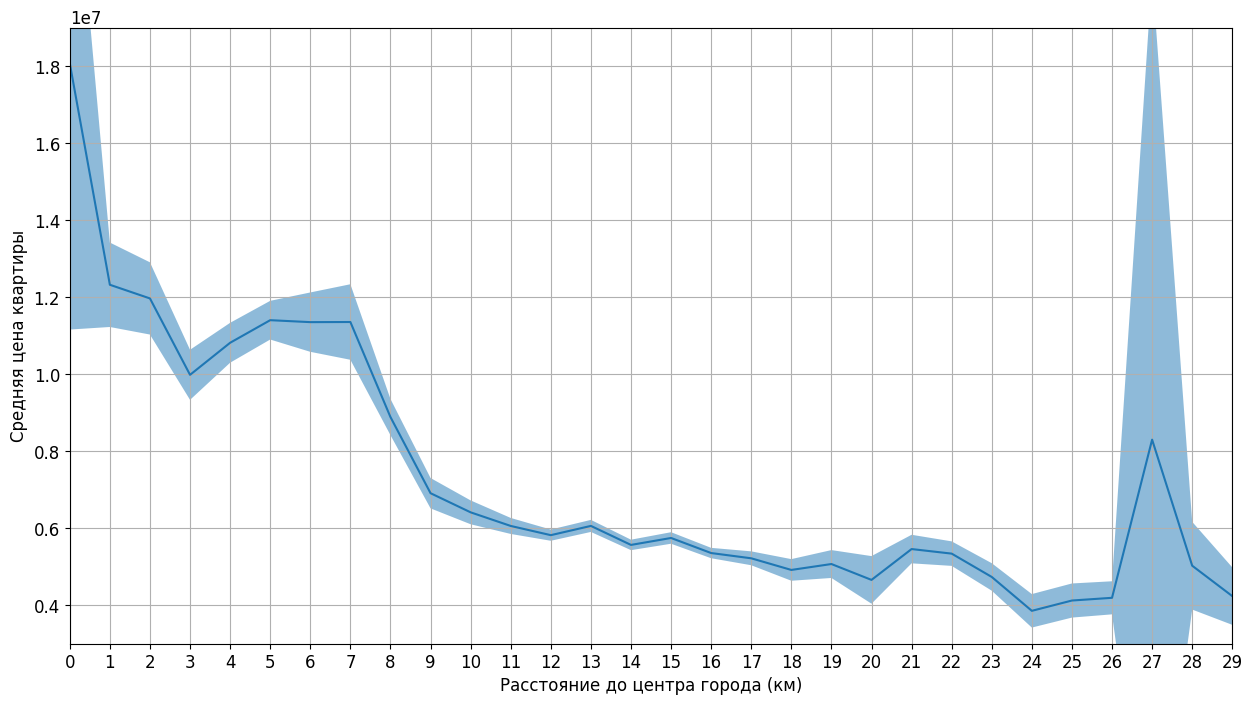

In [176]:
# выводим таблицу и строим график
mean_price_per_km(
    data_spb, 
    xlim=(0, 29), ylim=(3_000_000, 19_000_000));

Из графика видно, что средняя цена квартиры в целом имеет тенденцию к уменьшению с удалением от центра города. 

В центральной части города цены имеют больший разброс. Это связано как с меньшим количеством таких объектов, так и с более высокой долей сравнительно редких объектов с высокой ценой.

На расстоянии 3 км есть небольшой провал в ценах. Вероятно, это пояс промзон вокруг исторической части города.

Наибольшее падение цены происходит между 7 и 9 км от центра. Возможно там проходит условная граница между центральной частью города и периферией. Если вблизи центра средняя цена квартиры превосходит 10 млн, то на периферии она составляет 5-7 млн.

В диапазоне 9-18 км от центра цена с среднем практически линейно убывает с каждым километром расстояния от центра города.

На расстоянии 18-23 км от центра цена квартир перестаёт снижаться, а затем снова падает. Это расстояние примерно соответствует ближним пригородам.

Полосы доверительных интервалов на графике позволяют заметить, что выброс на 27 км обусловлен слишком малым количеством квартир на этом расстоянии от центра города. Кроме того, благодаря им ясно, что некоторые особенности на графике могут быть следствием погрешности расчётов.

Чтобы объяснить провал на графике средней цены для расстояния 3 км от центра города, исследуем распределение квартир по типу этажа для каждого километра расстояния, т.к. этот признак влияет на стоимость объекта.

In [177]:
def floor_type_per_km(data, xlim=None, ylim=None):
    """
    Выводит сводную таблицу и строит график зависимости количества и доли 
    квартир на разных этажах (первый, последний, другой) 
    от расстояния до центра города.
    """
    # строим сводную таблицу
    pivot = (
        data
        .pivot_table(
            index='city_centers_nearest_km',
            columns='floor_type',
            values='last_price',
            aggfunc='count',
            fill_value=0,
        )
        .astype(int)
    )
    # преобразуем значения расстояния в км в целые числа
    pivot.index = pivot.index.astype(int)
    
    # считаем долю каждого типа этажа
    shares = (
        pivot
        .transform(lambda x: x / x.sum() * 100, axis=1)
        .round(2)
    )
    # выводим объединённую таблицу
    display(
        pivot
        .join(shares, rsuffix=' (%)')
        # для вывода называем оси по-русски
        .rename_axis('Расстояние до центра города (км)', axis=0)
        .rename_axis('Тип этажа', axis=1)
    )
    # строим графики
    (pivot
     .rename_axis('Тип этажа', axis=1)
     .plot(
        xlim=xlim,
        xticks=range(30),
        xlabel='Расстояние до центра города (км)',
        ylim=ylim,
        ylabel='Количество квартир',
        grid = True,
        figsize=(15, 5),
     )
    )  
    
    (shares
     .rename_axis('Тип этажа', axis=1)
     .plot(
        xlim=xlim,
        xticks=range(30),
        xlabel='Расстояние до центра города (км)',
        ylim=(0, 100),
        ylabel='Доля квартир (%)',
        grid = True,
        figsize=(15, 5),
     )
    )

Тип этажа                         другой  первый  последний  другой (%)  \
Расстояние до центра города (км)                                          
0                                     10       3          4       58.82   
1                                    103      19         40       63.58   
2                                    155      44         70       57.62   
3                                    196      53         73       60.87   
4                                    459      74        104       72.06   
5                                    631      73        124       76.21   
6                                    415      62         79       74.64   
7                                    297      30         56       77.55   
8                                    451      49         63       80.11   
9                                    441      52         81       76.83   
10                                   530      73         90       76.48   
11                                   889     143        114       77.57   
12                                  1245     174        147       79.50   
13                                  1173     112        138       82.43   
14                                  1023     106        119       81.97   
15                                  1242     142        140       81.50   
16                                   998     124        114       80.74   
17                                   664     100         86       78.12   
18                                   204      23         30       79.38   
19                                   116      18         17       76.82   
20                                    16       1          1       88.89   
21                                    86      11         18       74.78   
22                                   162      14         20       82.65   
23                                    61       9         11       75.31   
24                                    24       1          1       92.31   
25                                    18       4          1       78.26   
26                                    20       9          7       55.56   
27                                     1       0          1       50.00   
28                                     4       2          1       57.14   
29                                     1       4          1       16.67   

Тип этажа                         первый (%)  последний (%)  
Расстояние до центра города (км)                             
0                                      17.65          23.53  
1                                      11.73          24.69  
2                                      16.36          26.02  
3                                      16.46          22.67  
4                                      11.62          16.33  
5                                       8.82          14.98  
6                                      11.15          14.21  
7                                       7.83          14.62  
8                                       8.70          11.19  
9                                       9.06          14.11  
10                                     10.53          12.99  
11                                     12.48           9.95  
12                                     11.11           9.39  
13                                      7.87           9.70  
14                                      8.49           9.54  
15                                      9.32           9.19  
16                                     10.03           9.22  
17                                     11.76          10.12  
18                                      8.95          11.67  
19                                     11.92          11.26  
20                                      5.56           5.56  
21                                      9.57          15.65  
22                                      7.14          10.20  
23                                     11.11     

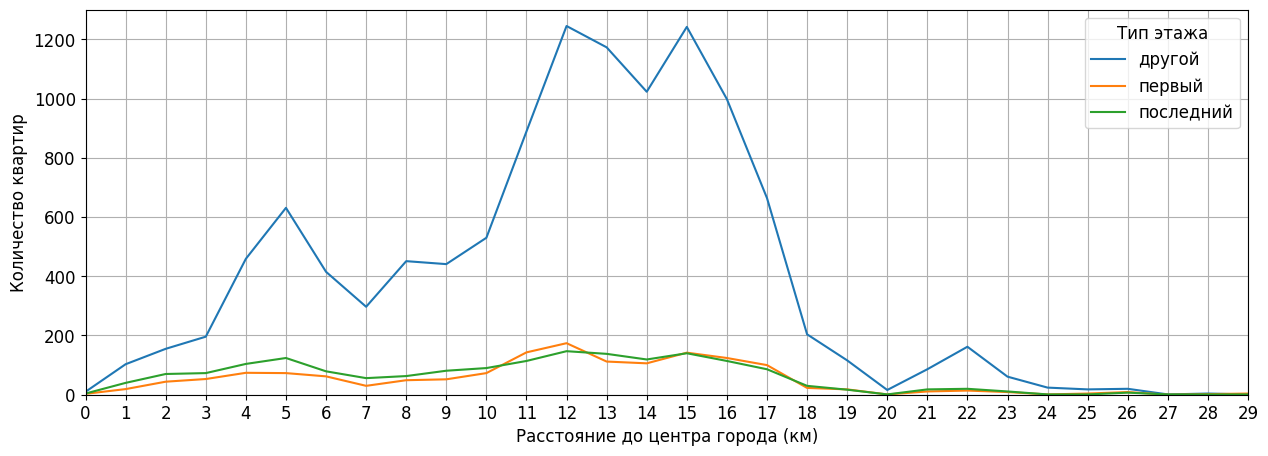

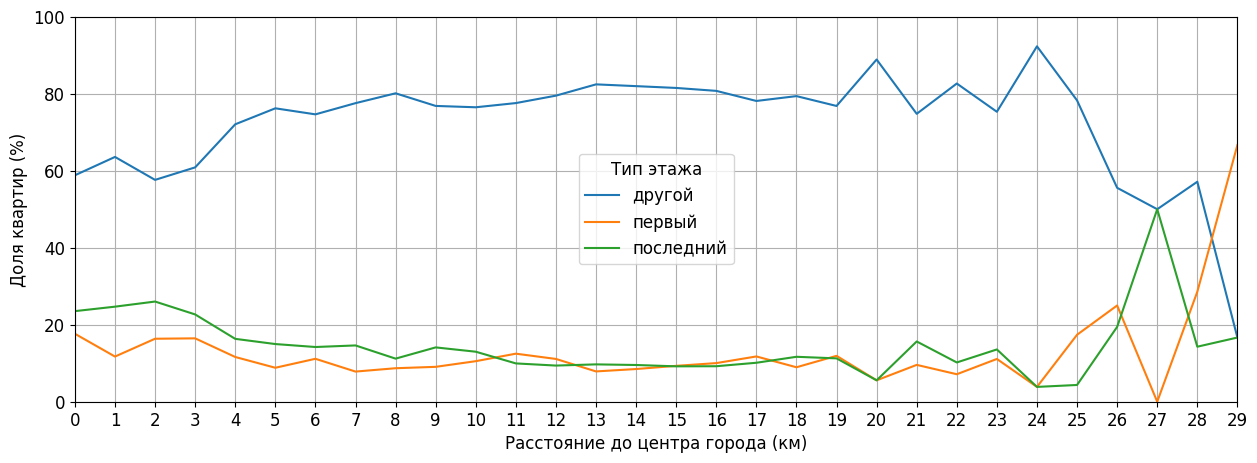

In [178]:
floor_type_per_km(data_spb, xlim=(0, 29), ylim=(0, 1300))

Для расстояния 2-3 км от центра на графике доли квартир на других этажах есть провал, который совпадает с пиком на графике доли квартир на первом этаже. А на 3-5 км происходит рост доли квартир на других этажах.

Учитывая полученный ранее результат, что квартиры на первом этаже (и в меньшей степени, на последнем) в среднем дешевле, провал на графике средней цены в зависимости от расстояния до центра можно объяснить более высокой долей квартир на первом и последнем этажах, стоимость которых ниже.

**Выводы:**

Определена зависимость средней цены квартиры от числа километров расстояния до центра Санкт-Петербурга. 

- Средняя цена квартиры в целом имеет тенденцию к уменьшению с удалением от центра города. 

- В центральной части города цены имеют больший разброс. Это связано как с меньшим количеством таких объектов, так и с более высокой долей сравнительно редких объектов с высокой ценой.

- На расстоянии 3 км есть небольшой провал в ценах. Его можно объяснить более высокой долей квартир на первом и последнем этажах, стоимость которых ниже.

- Резкое падение средней цены происходит между 7 и 9 км от центра. Возможно там проходит условная граница между центральной частью города и периферией. Если вблизи центра средняя цена квартиры превосходит 10 млн, то на периферии она составляет 5-7 млн.

- В диапазоне 9-18 км от центра цена с среднем практически линейно убывает с каждым километром расстояния от центра города.

- На расстоянии 18-23 км от центра цена квартир перестаёт снижаться, а затем снова падает. Это расстояние примерно соответствует ближним пригородам.

## Общий вывод

1. **Предварительное изучение данных** показало, что в данных имеются проблемы: пропуски, аномалии, несоответствие типов данных их характеру, нестандартное именование одного из столбцов таблицы. 


2. **На этапе предобработки** данные подготовлены для анализа:
    - **Проведена обработка пропущенных значений**, в результате заполнены пропуски значений числа балконов и признака "апартаменты".
    - **Изменён тип данных** значений числа балконов и цены  на целочисленный. В других столбцах, содержащих пропуски, изменение типа числовых данных с вещественного на целый невозможно. Информация о дате публикации объявления преобразована в соответствующий тип данных.
    - **Проведена обработка дубликатов**, в результате устранены неявные дубликаты названий населённых пунктов. Явные дубликаты записей не были обнаружены.
    - **Добавлены новые параметры** для категоризации объектов: 
        - цена одного квадратного метра,
        - номер дня недели публикации объявления,
        - месяц публикации объявления,
        - год публикации объявления,
        - тип этажа квартиры,
        - расстояние до центра города в километрах.


3. На этапе **исследовательского анализа данных**:
    - **Выявлены и по возможности исправлены ошибки** в значениях параметров объектов недвижимости: указанная с ошибкой цена объекта, нулевое количество комнат для квартир-студий или квартир со свободной планировкой, указанная с ошибкой высота потолков. Аномальные значения, не поддающиеся исправлению, удалены. Обнаруженные аномальные значения жилой площади удалены, т.к. с высокой вероятностью являются ошибочными. Аномально малые значения площади кухни по результатам анализ сохранены, т.к. могут быть объяснены тем, что указана площадь кухонной зоны для кухни, совмещенной с комнатой.
    
    - Данные **очищены от редких и выбивающихся значений** ключевых параметров объекта недвижимости (общей площади, жилой площади, площади кухни, цены, количества комнат, высоты потолков, этажа, числа этажей в доме) путём фильтрации по значениям квантилей распределения 0,005 и 0,995: для каждого параметра отброшены 0,5 % объектов с самыми малыми и 0,5 % объектов с самыми большими значениями данного параметра. Общий уровень потерь данных в результате фильтрации составил около 4 %, что близко к оптимальному уровню.

    - В результате **исследования гистограмм распределения параметров** объектов недвижимости установлены следующие факты:
        - Распределения общей площади, жилой площади, площади кухни и цены объекта имеют длинный "хвост" из значений, превышающих основную массу. Доля таких редких объектов мала, однако они могут влиять на среднее значение соответствующих параметров. Поэтому в качестве характерных значений этих параметров лучше использовать **медиану**.
        - Большинство объектов имеют общую площадь в диапазоне от 25 до 100 кв.м. Отдельные резкие пики на распределении, вероятно, соответствуют распространённым типовым планировкам.
        - На распределении жилой площади выделяются 3 узких пика, соответствующих наиболее распространённым значениям числа комнат в квартире: 1, 2, 3. 
        - Большинство объектов имеют площадь кухни в диапазоне от 5 до 20 кв.м. Распределение также имеет резкие пики на вершине, вероятно, соответствующие типовым планировкам. 
        - Цена большинства объектов находится в диапазоне от 1 000 000 до 15 000 000. Распределение цен похоже на нормальное и имеет один максимум около 4 000 000.
        - Преобладают квартиры с количеством комнат от 1 до 3, причём количество квартир убывает с увеличением числа комнат.
        - Большинство квартир имеют в диапазоне от 2,5 до 2,8 м, но выделяется также пик у значения 3,0 м. Чаще всего встречается высота потолков 2,5 м, далее по мере роста значений количество объектов имеет тенденцию к уменьшению. На распределении присутствуют отдельные пики с шагом 5 и 10 см - видимо, стандартный ряд значений в архитектурных проектах.
        - Квартир на промежуточных этажах значительно больше, чем на первом и последнем. Причём число квартир на первом этаже невелико и даже меньше числа квартир на последнем этаже. Это означает, что в выборке в основном содержатся объявления о продаже квартир в многоэтажных домах.
        - В распределении количества этажей в доме заметно выделяются пики на значениях 5 и 9 этажей. Это означает, что дома с такой этажностью наиболее часто встречаются в жилой застройке Санкт-Петербурга.
        - Большинство объектов находятся на расстоянии до 20 км от центра Санкт-Петербурга. Распределение похоже на сумму нескольких составляющих - нормальных распределений с различными центрами. Максимум в распределении вблизи 5 км от центра, вероятно, соответствует домам в центре города, а широкий максимум  от 8 до 18 км - основным жилым микрорайонам города на периферии. Максимум вблизи 25-30 км соответствует пригородам, а около 50 км - городам-спутникам.
        - Для большинства объектов с известным расстоянием до ближайшего парка это расстояние составляет менее 1 км. Однако учитывая, что данные о расстоянии до ближайшего парка есть только для 1/3 всех объектов, обобщать этот вывод на все объекты нельзя.

    - В результате **исследования длительности продажи квартир** установлено:
        - В среднем число продаж уменьшается с ростом длительности продажи. Это логично - количество непроданных объектов со временем уменьшается.
        - **Средняя** длительность продажи составляет **180** дней.
        - Типичная длительность продажи - **медианное** значение, составляющее 95 дней. Половина квартир продаётся быстрее этого срока, другая половина - дольше. Поэтому можно считать, что обычно продажа занимает **95** дней.
        - **Быстрыми** можно считать продажи, длительность которых меньше, чем для 99,5 % объектов, то есть меньше значения 0,005 квантиля, который составляет **3 дня**. Это означает, что 99,5 % объектов продаются дольше.
        - **Необычно долгими** можно считать продажи, длительность которых больше, чем для 99,5 % объектов, то есть больше значения 0,995 квантиля, который составляет **1177 дней** (более 3 лет). Это означает, что 99,5 % объектов продаются быстрее.
        - На распределении длительности продажи обнаружены положительные **выбросы**, соответствующие длительностям продажи 45, 60, 7, 30 и 90 дней (в порядке убывания числа продаж объектов). Вероятно, это следствие особенностей работы агентов на рынке недвижимости.
 
    - В результате **исследования зависимости цены квартиры от её параметров** установлено: 
        - С увеличением общей площади, жилой площади, площади кухни, количества комнат и высоты потолков стоимость квартиры возрастает. **Сильнее всего на цену квартиры влияет общая площадь**, затем по убыванию степени влияния жилая площадь, площадь кухни, высота потолков, количество комнат.
        - Тип этажа (первый, последний, или другой) также влияет на цену квартиры. Квартиры на первом этаже примерно на 20 % дешевле, чем на промежуточных этажах. Квартиры на последнем этаже имеют больший разброс по стоимости, вероятно, цена зависит от конкретного этажа.
        - Зависимость стоимости квартиры от дня недели и месяца размещения объявления невелика: цена меняется в пределах ±5 %. В первой половине недели на продажу выставляют в среднем немного более дорогие объекты. В мае и июне выставляются на продажу в среднем чуть более дешёвые объекты, а в апреле - чуть более дорогие.
        - Зависимость стоимости квартир от года размещения объявления объясняется сопутствующим изменением общей площади объектов. Тем не менее, цена за кв. м начиная с 2016 года возрастает с каждым годом. Видимо, это влияние инфляции.

    - **Рассчитана средняя цена квадратного метра** в 10 населённых пунктах с наибольшим числом объявлений. Определены населённые пункты с самой высокой и низкой средней ценой квадратного метра:
         - Самая **высокая** средняя цена квадратного метра в **Санкт-Петербурге**.
         - Самая **низкая** средняя цена квадратного метра в **Выборге**.

    - Установлена **зависимость средней цены квартиры от расстояния до центра** Санкт-Петербурга. 
        - Средняя цена квартиры в целом имеет тенденцию к **уменьшению с удалением от центра города**. 
        - В центральной части города более высокая доля редких объектов с очень высокой ценой, которые оказывают сильное влияние на рост средней цены и увеличение разброса цен. 
        - На расстоянии 3 км есть небольшой провал в ценах. Его можно объяснить более высокой долей квартир на первом и последнем этажах, стоимость которых ниже.
        - Резкое падение средней цены происходит между 7 и 9 км от центра. Возможно там проходит условная граница между центральной частью города и периферией. Если вблизи центра средняя цена квартиры превосходит 10 млн, то на периферии она составляет 5-7 млн.
        - В диапазоне 9-18 км от центра цена с среднем практически линейно убывает с каждым километром расстояния от центра города.
        - На расстоянии 18-23 км от центра цена квартир перестаёт снижаться, а затем снова падает. Это расстояние примерно соответствует ближним пригородам.
    
    
4. На основании установленных зависимостей стоимости объекта недвижимости от его параметров можно сформулировать **принципы определения рыночной стоимости** объектов недвижимости в зависимости от их параметров:

   - Полученные совместные распределения стоимости объекта и непрерывных количественных параметров (общей площади, а также жилой площади и площади кухни) содержат один кластер, в который попадает абсолютное большинство объектов. Этот кластер можно считать **областью нормальных для рынка сочетаний** значений рассматриваемого параметра и стоимости объекта.
   
   - Установленные зависимости стоимости объекта от значений дискретных и категориальных параметров (количества комнат, расстояния до центра города, типа этажа, населённого пункта) задают **нормальную для рынка стоимость объектов с данным конкретным значением параметра**, которую можно определить по этим зависимостям.
   
   
5. Таким образом, используя совместные распределения параметров объекта и его стоимости, а также установленные в ходе исследования зависимости, можно сформулировать **критерий, позволяющий выявлять объекты с аномальной стоимостью по отношению к рыночной**: 

   - Аномальными можно считать объекты, которые **на совместном распределении** находятся далеко от основной массы объектов на рынке, и для которых **соотношение между значениями параметров и стоимостью** существенно отличается от установленных в результате анализа зависимостей.
   
   - Рассчитанные средние значения стоимости объектов для населённых пунктов могут служить **ориентировочными значениями при оценке соответствия** стоимости конкретного объекта среднерыночной для данного населённого пункта.